In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
train = pd.read_csv("../data/raw/train.csv") 

**Punto 11**

In [ ]:
t = train.copy()

def grupo_edad(a):
    if pd.isna(a):
        return np.nan
    if a < 10:
        return "Niños (<10)"
    if 18 <= a <= 49:
        return "Adultos (18-49)"
    if a >= 50:
        return "Mayores (50+)"
    return np.nan  

t["grupo_etario"] = t["Age"].apply(grupo_edad)
t["Cabina_Registrada"] = np.where(t["Cabin"].notna(), "Con cabina", "Sin cabina")

res = (
    t.groupby(["grupo_etario", "Sex", "Cabina_Registrada", "Survived"])
     .size()
     .reset_index(name="conteo")
)

res["proporcion_%"] = (
    res.groupby(["grupo_etario", "Sex", "Cabina_Registrada"])["conteo"]
       .transform(lambda x: 100 * x / x.sum())
       .round(2)
)

display(res.sort_values(["grupo_etario", "Sex", "Cabina_Registrada", "Survived"]))

tabla = (
    res.pivot_table(index=["grupo_etario", "Sex", "Cabina_Registrada"],
                    columns="Survived", values="proporcion_%", fill_value=0)
       .rename(columns={0: "No sobrevivió (%)", 1: "Sobrevivió (%)"})
       .reset_index()
)

display(tabla.sort_values(["grupo_etario", "Sex", "Cabina_Registrada"]))

grupo_etario     Sex Cabina_Registrada  Survived  conteo  proporcion_%
0   Adultos (18-49)  female        Con cabina         0       2          3.12
1   Adultos (18-49)  female        Con cabina         1      62         96.88
2   Adultos (18-49)  female        Sin cabina         0      43         35.83
3   Adultos (18-49)  female        Sin cabina         1      77         64.17
4   Adultos (18-49)    male        Con cabina         0      37         56.92
5   Adultos (18-49)    male        Con cabina         1      28         43.08
6   Adultos (18-49)    male        Sin cabina         0     243         87.41
7   Adultos (18-49)    male        Sin cabina         1      35         12.59
8     Mayores (50+)  female        Con cabina         0       2         13.33
9     Mayores (50+)  female        Con cabina         1      13         86.67
10    Mayores (50+)  female        Sin cabina         1       7        100.00
11    Mayores (50+)    male        Con cabina         0      17         77.27
12    Mayores (50+)    male        Con cabina         1       5         22.73
13    Mayores (50+)    male        Sin cabina         0      28         93.33
14    Mayores (50+)    male        Sin cabina         1       2          6.67
15      Niños (<10)  female        Con cabina         0       2         50.00
16      Niños (<10)  female        Con cabina         1       2         50.00
17      Niños (<10)  female        Sin cabina         0       9         34.62
18      Niños (<10)  female        Sin cabina         1      17         65.38
19      Niños (<10)    male        Con cabina         1       6        100.00
20      Niños (<10)    male        Sin cabina         0      13         50.00
21      Niños (<10)    male        Sin cabina         1      13         50.00

Survived     grupo_etario     Sex Cabina_Registrada  No sobrevivió (%)  \
0         Adultos (18-49)  female        Con cabina               3.12   
1         Adultos (18-49)  female        Sin cabina              35.83   
2         Adultos (18-49)    male        Con cabina              56.92   
3         Adultos (18-49)    male        Sin cabina              87.41   
4           Mayores (50+)  female        Con cabina              13.33   
5           Mayores (50+)  female        Sin cabina               0.00   
6           Mayores (50+)    male        Con cabina              77.27   
7           Mayores (50+)    male        Sin cabina              93.33   
8             Niños (<10)  female        Con cabina              50.00   
9             Niños (<10)  female        Sin cabina              34.62   
10            Niños (<10)    male        Con cabina               0.00   
11            Niños (<10)    male        Sin cabina              50.00   

Survived  Sobrevivió (%)  
0                  96.88  
1                  64.17  
2                  43.08  
3                  12.59  
4                  86.67  
5                 100.00  
6                  22.73  
7                   6.67  
8                  50.00  
9                  65.38  
10                100.00  
11                 50.00

Con base en las dos tablas, se puede observar un patrón claro en cómo la edad, el sexo y la disponibilidad de cabina influyeron en las probabilidades de supervivencia en el Titanic.

En el grupo de adultos (18 a 49 años), las mujeres tuvieron una clara ventaja: aquellas con cabina sobrevivieron en un 96.88%, y aun sin cabina la supervivencia fue del 64.17%. En contraste, los hombres adultos presentaron tasas de supervivencia mucho más bajas: solo el 43.08% de quienes tenían cabina sobrevivió, y apenas el 12.59% entre quienes no contaban con una. Esto muestra que, en este grupo etario, el sexo fue un factor decisivo, reforzando la política de evacuación prioritaria de “mujeres y niños primero”.

En el grupo de mayores de 50 años, la diferencia entre sexos fue también significativa. Las mujeres de esta edad sobrevivieron en un 86.67% si tenían cabina y en un 100% cuando no la tenían, mientras que los hombres mayores apenas alcanzaron un 22.73% de supervivencia con cabina y 6.67% sin ella. Esto refleja que la edad avanzada, combinada con el género masculino, reducía notablemente las probabilidades de sobrevivir, incluso en condiciones más favorables.

Por último, entre los niños menores de 10 años, los porcentajes se acercan más al equilibrio. Las niñas mostraron una supervivencia del 65.38% sin cabina y del 50% con cabina; los niños, en cambio, sobrevivieron en un 100% cuando tenían cabina y en un 50% cuando no la tenían. Este grupo evidencia que la prioridad de rescate se extendía a los menores sin distinción de sexo, especialmente cuando viajaban en clases con cabinas asignadas.

En conclusión, los resultados indican que la supervivencia estuvo determinada principalmente por el sexo y el acceso a cabina, factores que reflejan tanto el nivel socioeconómico como las prioridades de evacuación. Las mujeres y los niños mostraron consistentemente mayores tasas de supervivencia, mientras que los hombres adultos y mayores, especialmente los que no tenían cabina, fueron los más afectados por la tragedia.

**Punto 12**

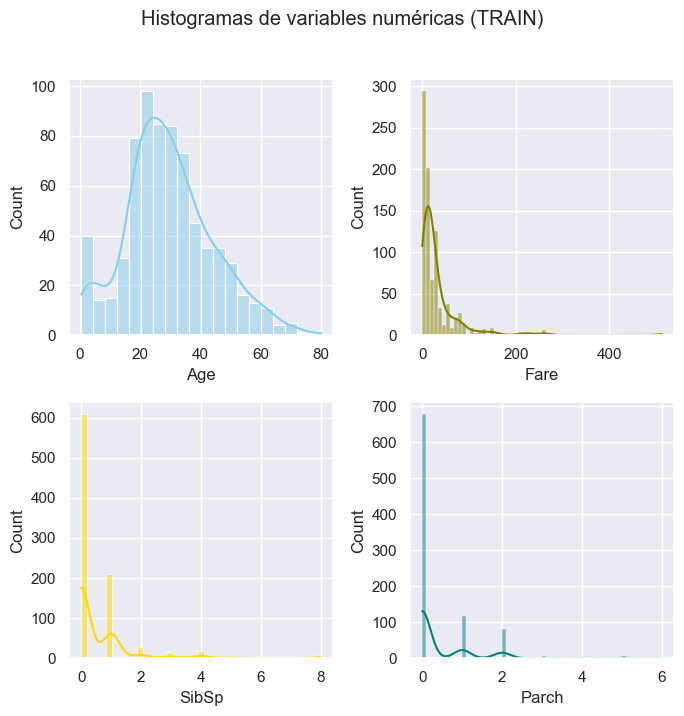

En el conjunto TRAIN se observa que la mayoría de los pasajeros tenía entre 20 y 40 años.
Las tarifas se concentran en valores bajos, lo que refleja la prevalencia de pasajeros de tercera clase.
La mayoría viajaba con pocos o ningún familiar, lo que se ve en los valores cercanos a cero en SibSp y Parch.


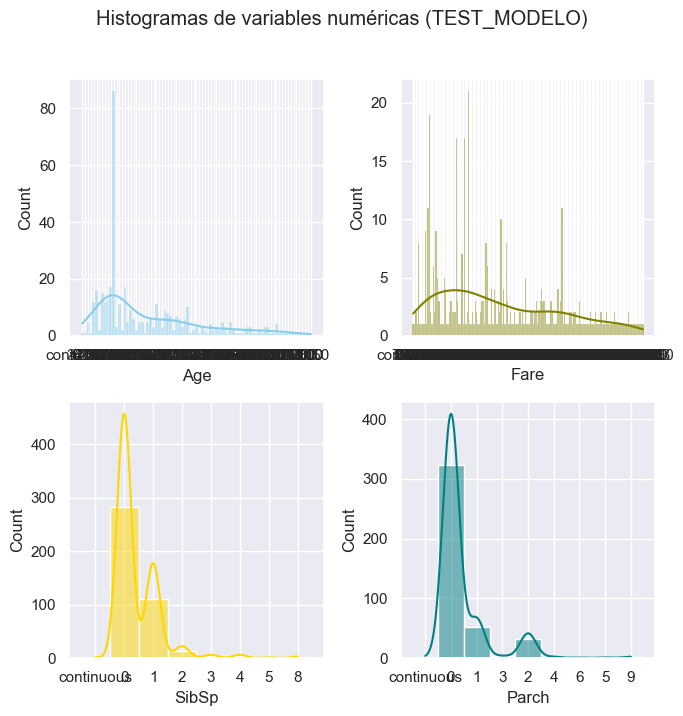

En el conjunto TEST_MODELO las distribuciones siguen un patrón similar al de TRAIN,
aunque se observan ligeras diferencias en la variable Fare, con algunos valores más altos,
posiblemente asociados a pasajeros de clases más altas o con cabinas individuales.


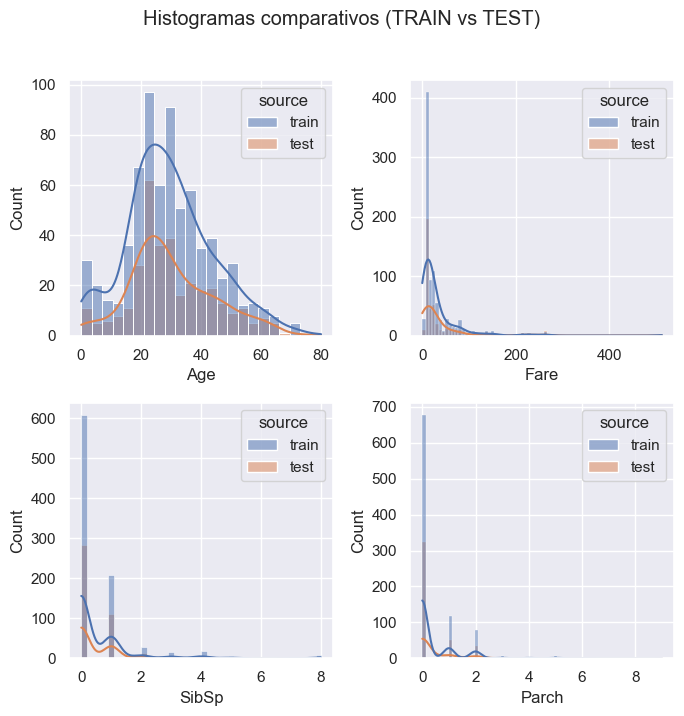

La comparación entre TRAIN y TEST muestra que ambos conjuntos presentan una estructura similar,
lo cual indica coherencia entre los datos de entrenamiento y de prueba.
Las diferencias más marcadas se aprecian en la variable Fare, mientras que SibSp y Parch
confirman que la mayoría de los pasajeros viajaba sola o con pocos familiares.


In [4]:
test = pd.read_csv("../data/raw/test.csv")
test_modelo = pd.read_csv("../data/raw/test_modelo.csv")
train["source"] = "train"
test["source"] = "test"
if "Survived" not in test.columns:
    test["Survived"] = None

ambos = pd.concat([train, test], ignore_index=True)

sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=train, x="Age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=train, x="Fare", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=train, x="SibSp", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=train, x="Parch", kde=True, color="teal", ax=axs[1, 1])
fig.suptitle("Histogramas de variables numéricas (TRAIN)", y=1.02)
plt.tight_layout()
plt.show()

print("En el conjunto TRAIN se observa que la mayoría de los pasajeros tenía entre 20 y 40 años.")
print("Las tarifas se concentran en valores bajos, lo que refleja la prevalencia de pasajeros de tercera clase.")
print("La mayoría viajaba con pocos o ningún familiar, lo que se ve en los valores cercanos a cero en SibSp y Parch.")

if "PassengerId" in test_modelo.columns and "PassengerId" in test.columns:
    test_modelo["PassengerId"] = test_modelo["PassengerId"].astype(str)
    test["PassengerId"] = test["PassengerId"].astype(str)
    test_modelo = test_modelo.merge(test, on="PassengerId", how="left", suffixes=("", "_test"))

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=test_modelo, x="Age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=test_modelo, x="Fare", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=test_modelo, x="SibSp", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=test_modelo, x="Parch", kde=True, color="teal", ax=axs[1, 1])
fig.suptitle("Histogramas de variables numéricas (TEST_MODELO)", y=1.02)
plt.tight_layout()
plt.show()

print("En el conjunto TEST_MODELO las distribuciones siguen un patrón similar al de TRAIN,")
print("aunque se observan ligeras diferencias en la variable Fare, con algunos valores más altos,")
print("posiblemente asociados a pasajeros de clases más altas o con cabinas individuales.")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=ambos, x="Age", kde=True, hue="source", ax=axs[0, 0])
sns.histplot(data=ambos, x="Fare", kde=True, hue="source", ax=axs[0, 1])
sns.histplot(data=ambos, x="SibSp", kde=True, hue="source", ax=axs[1, 0])
sns.histplot(data=ambos, x="Parch", kde=True, hue="source", ax=axs[1, 1])
fig.suptitle("Histogramas comparativos (TRAIN vs TEST)", y=1.02)
plt.tight_layout()
plt.show()

print("La comparación entre TRAIN y TEST muestra que ambos conjuntos presentan una estructura similar,")
print("lo cual indica coherencia entre los datos de entrenamiento y de prueba.")
print("Las diferencias más marcadas se aprecian en la variable Fare, mientras que SibSp y Parch")
print("confirman que la mayoría de los pasajeros viajaba sola o con pocos familiares.")

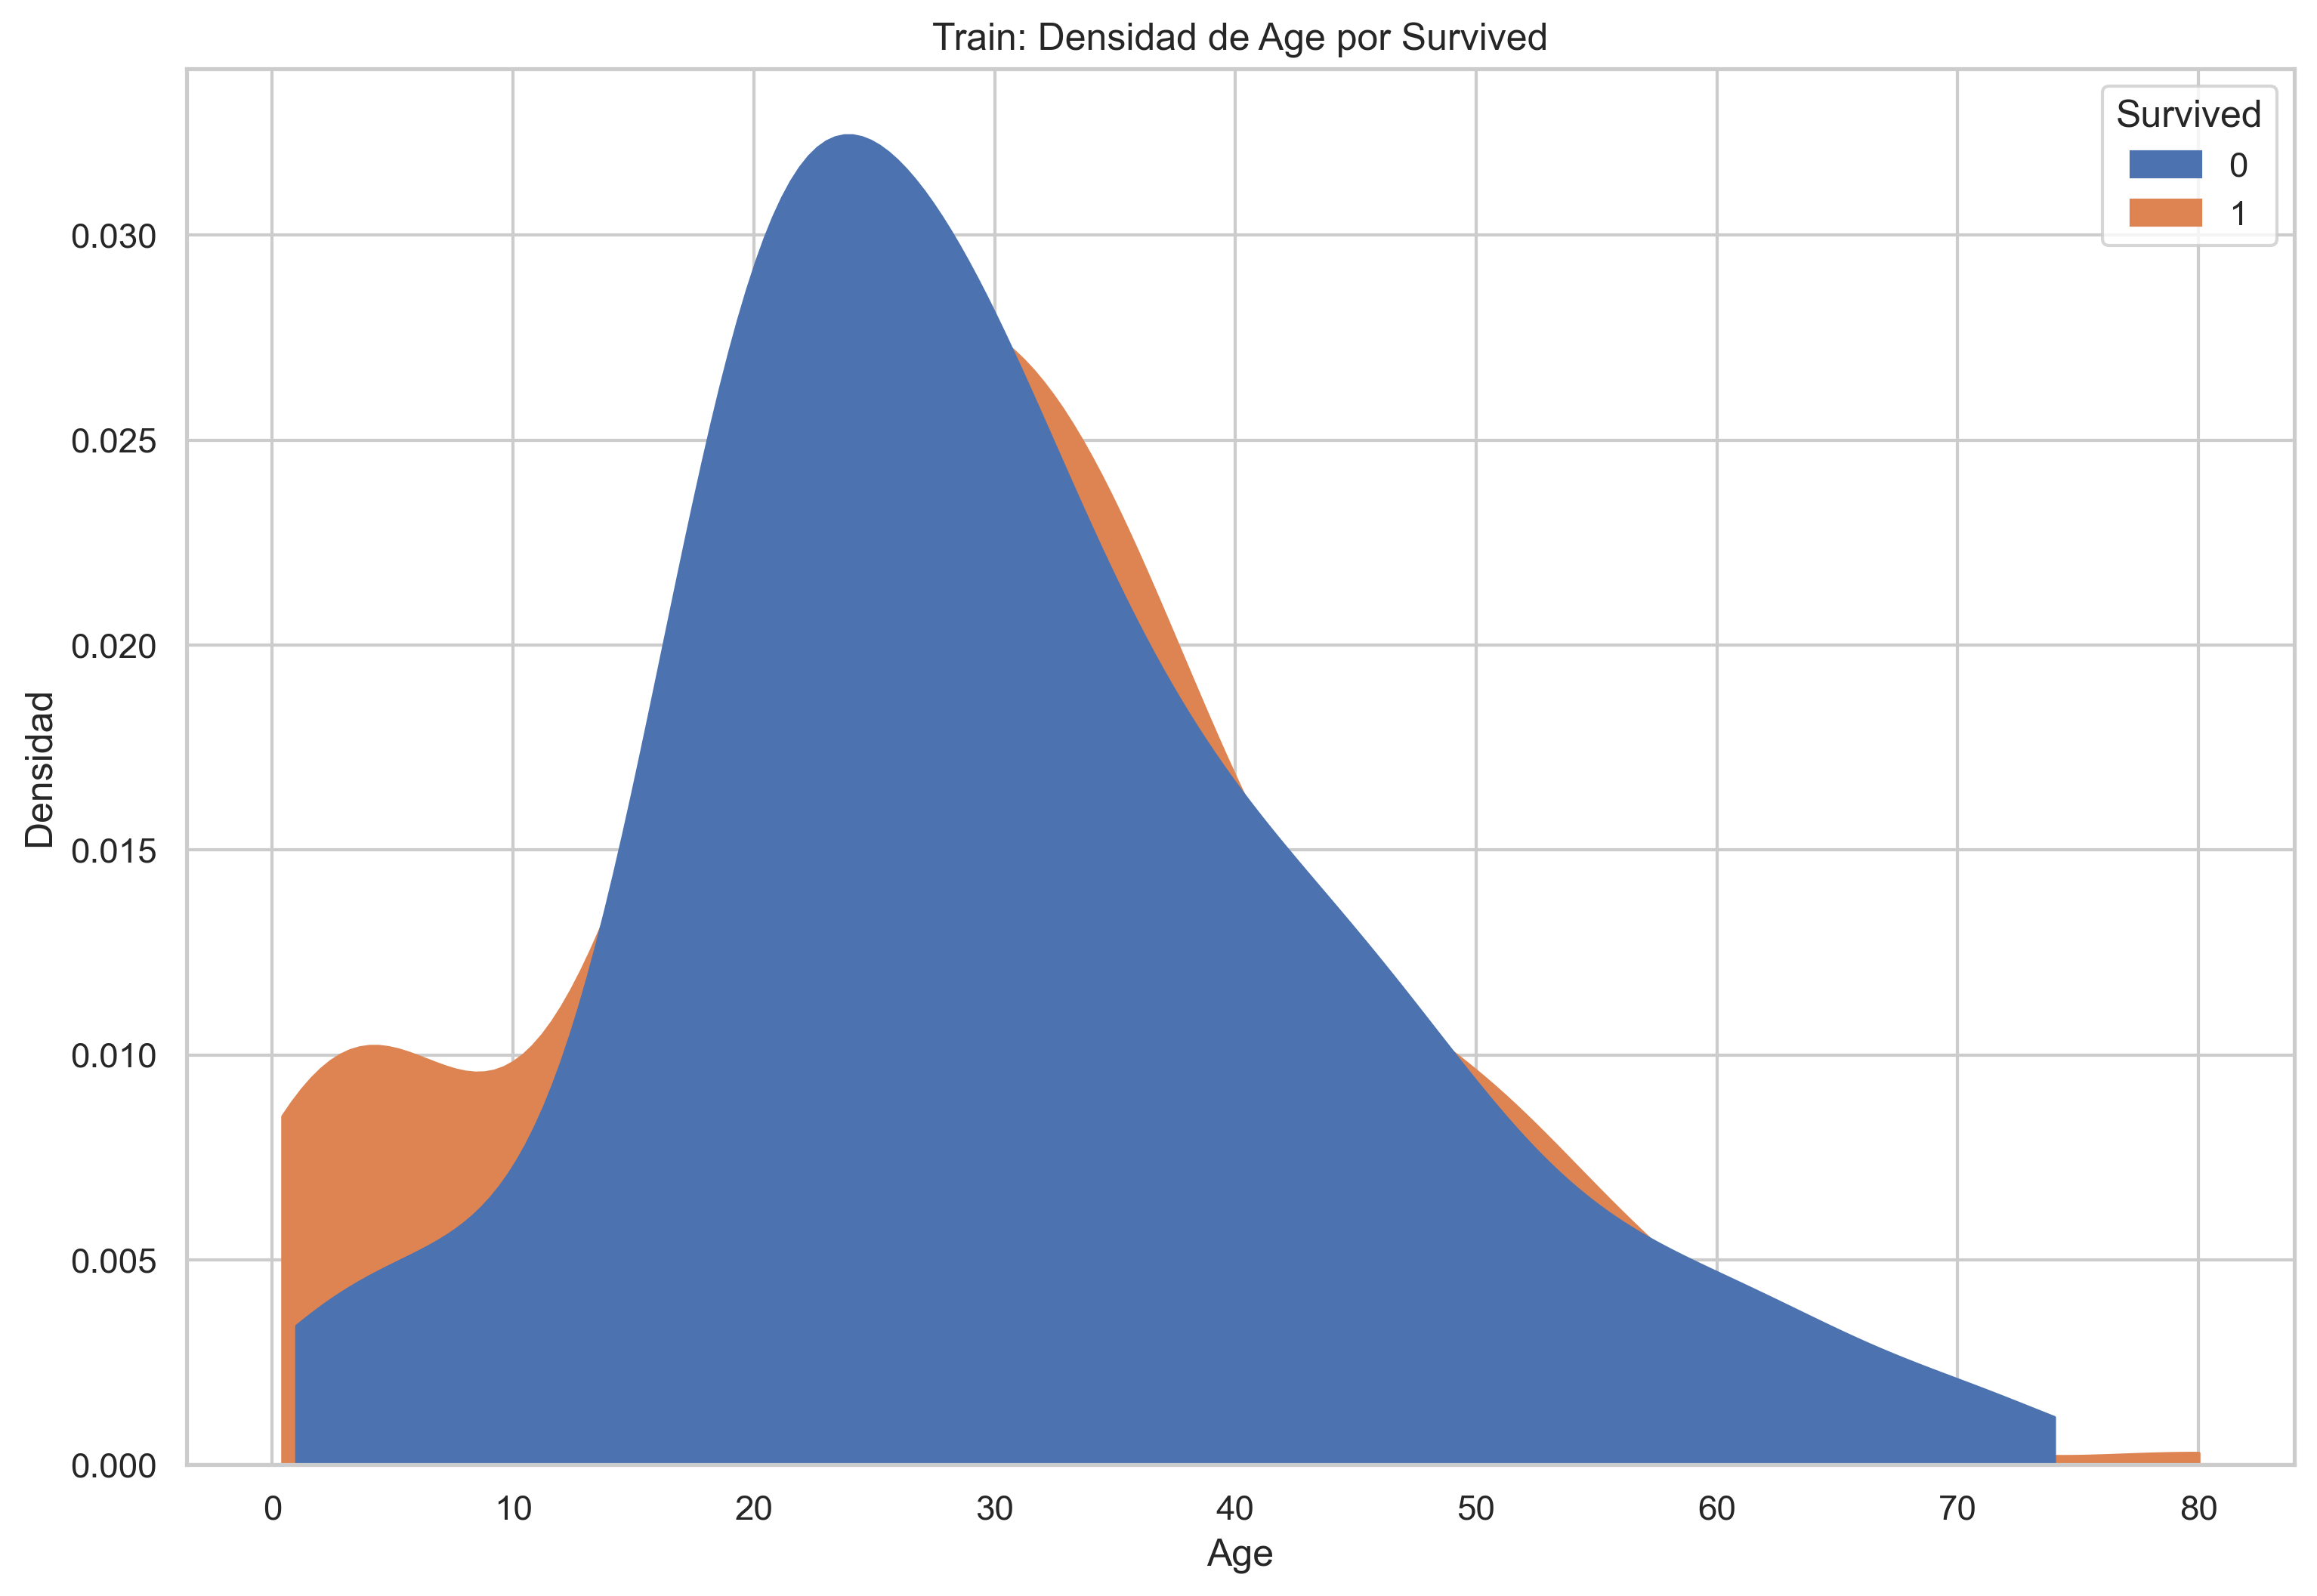

En TRAIN (Age), la densidad suele concentrarse en edades adultas, con diferencias claras entre quienes sobrevivieron y quienes no.


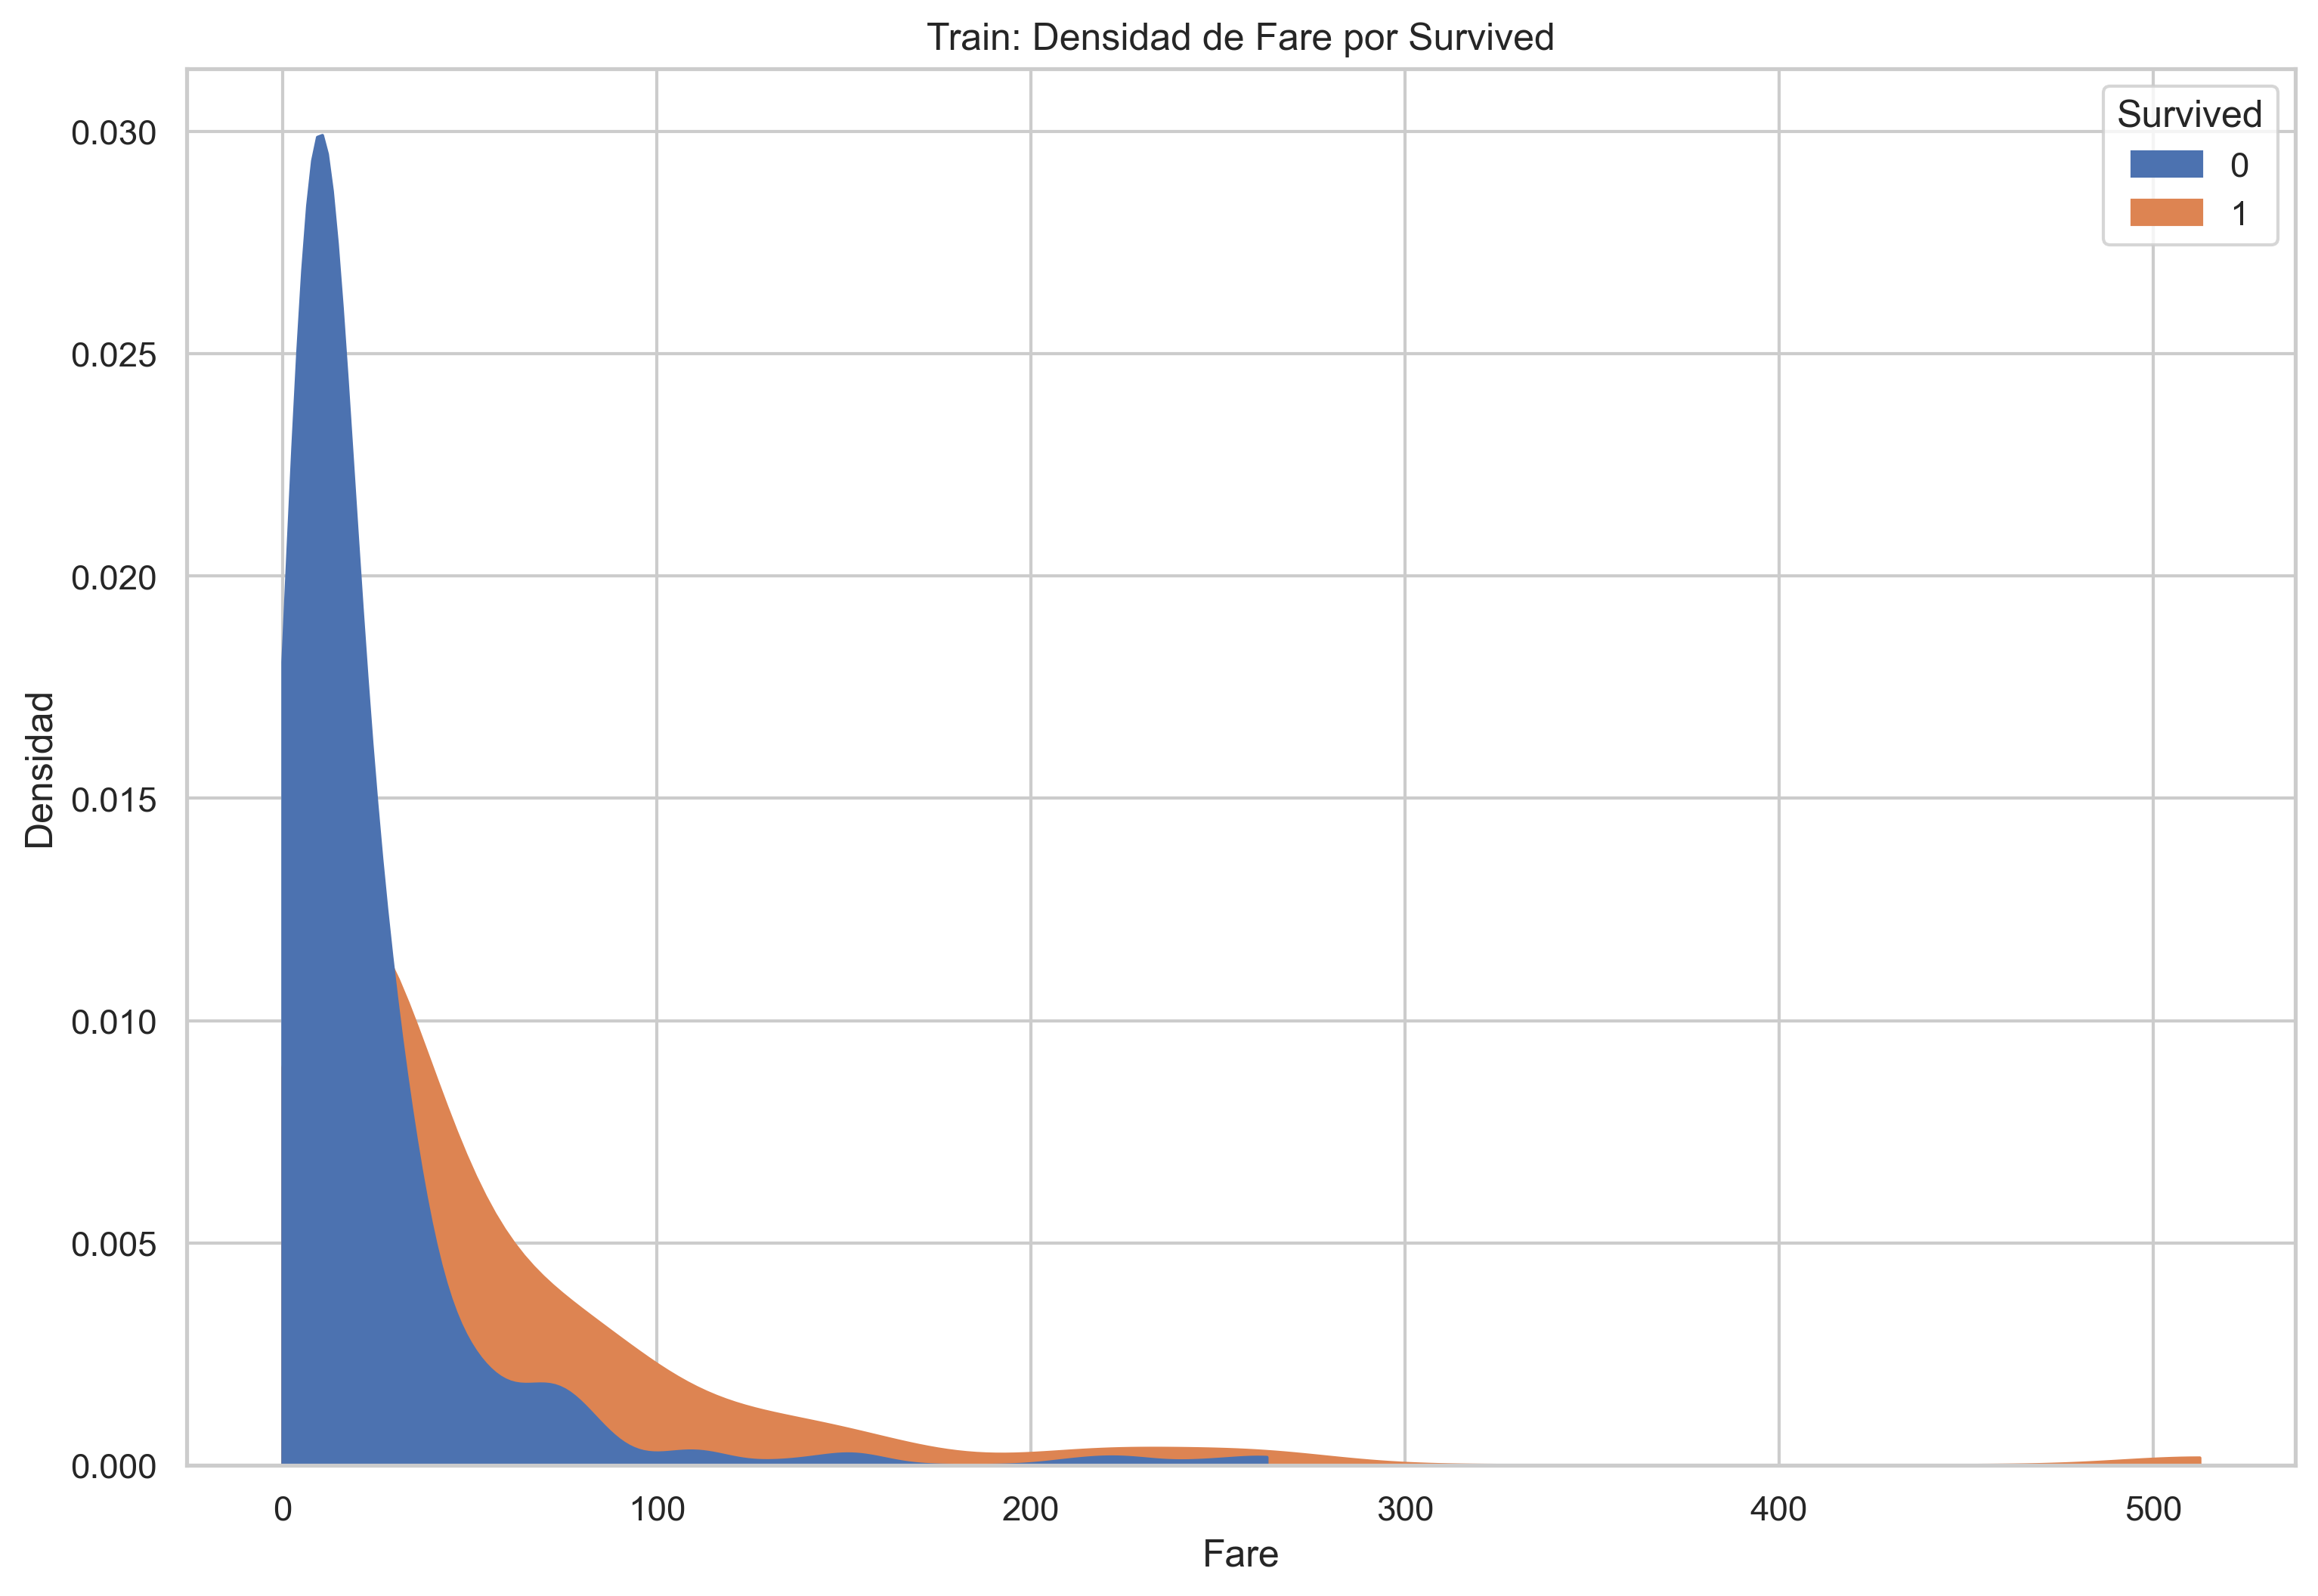

En TRAIN (Fare), la mayor parte de tarifas se ubica en valores bajos, y las tarifas altas se asocian con mayor probabilidad de supervivencia.
En TEST_MODELO (Age), la distribución de edades mantiene un patrón similar al de TRAIN, con predominio de edades adultas.
En TEST_MODELO (Fare), se observan muchas tarifas bajas y una cola hacia valores altos, coherente con la mezcla de clases.


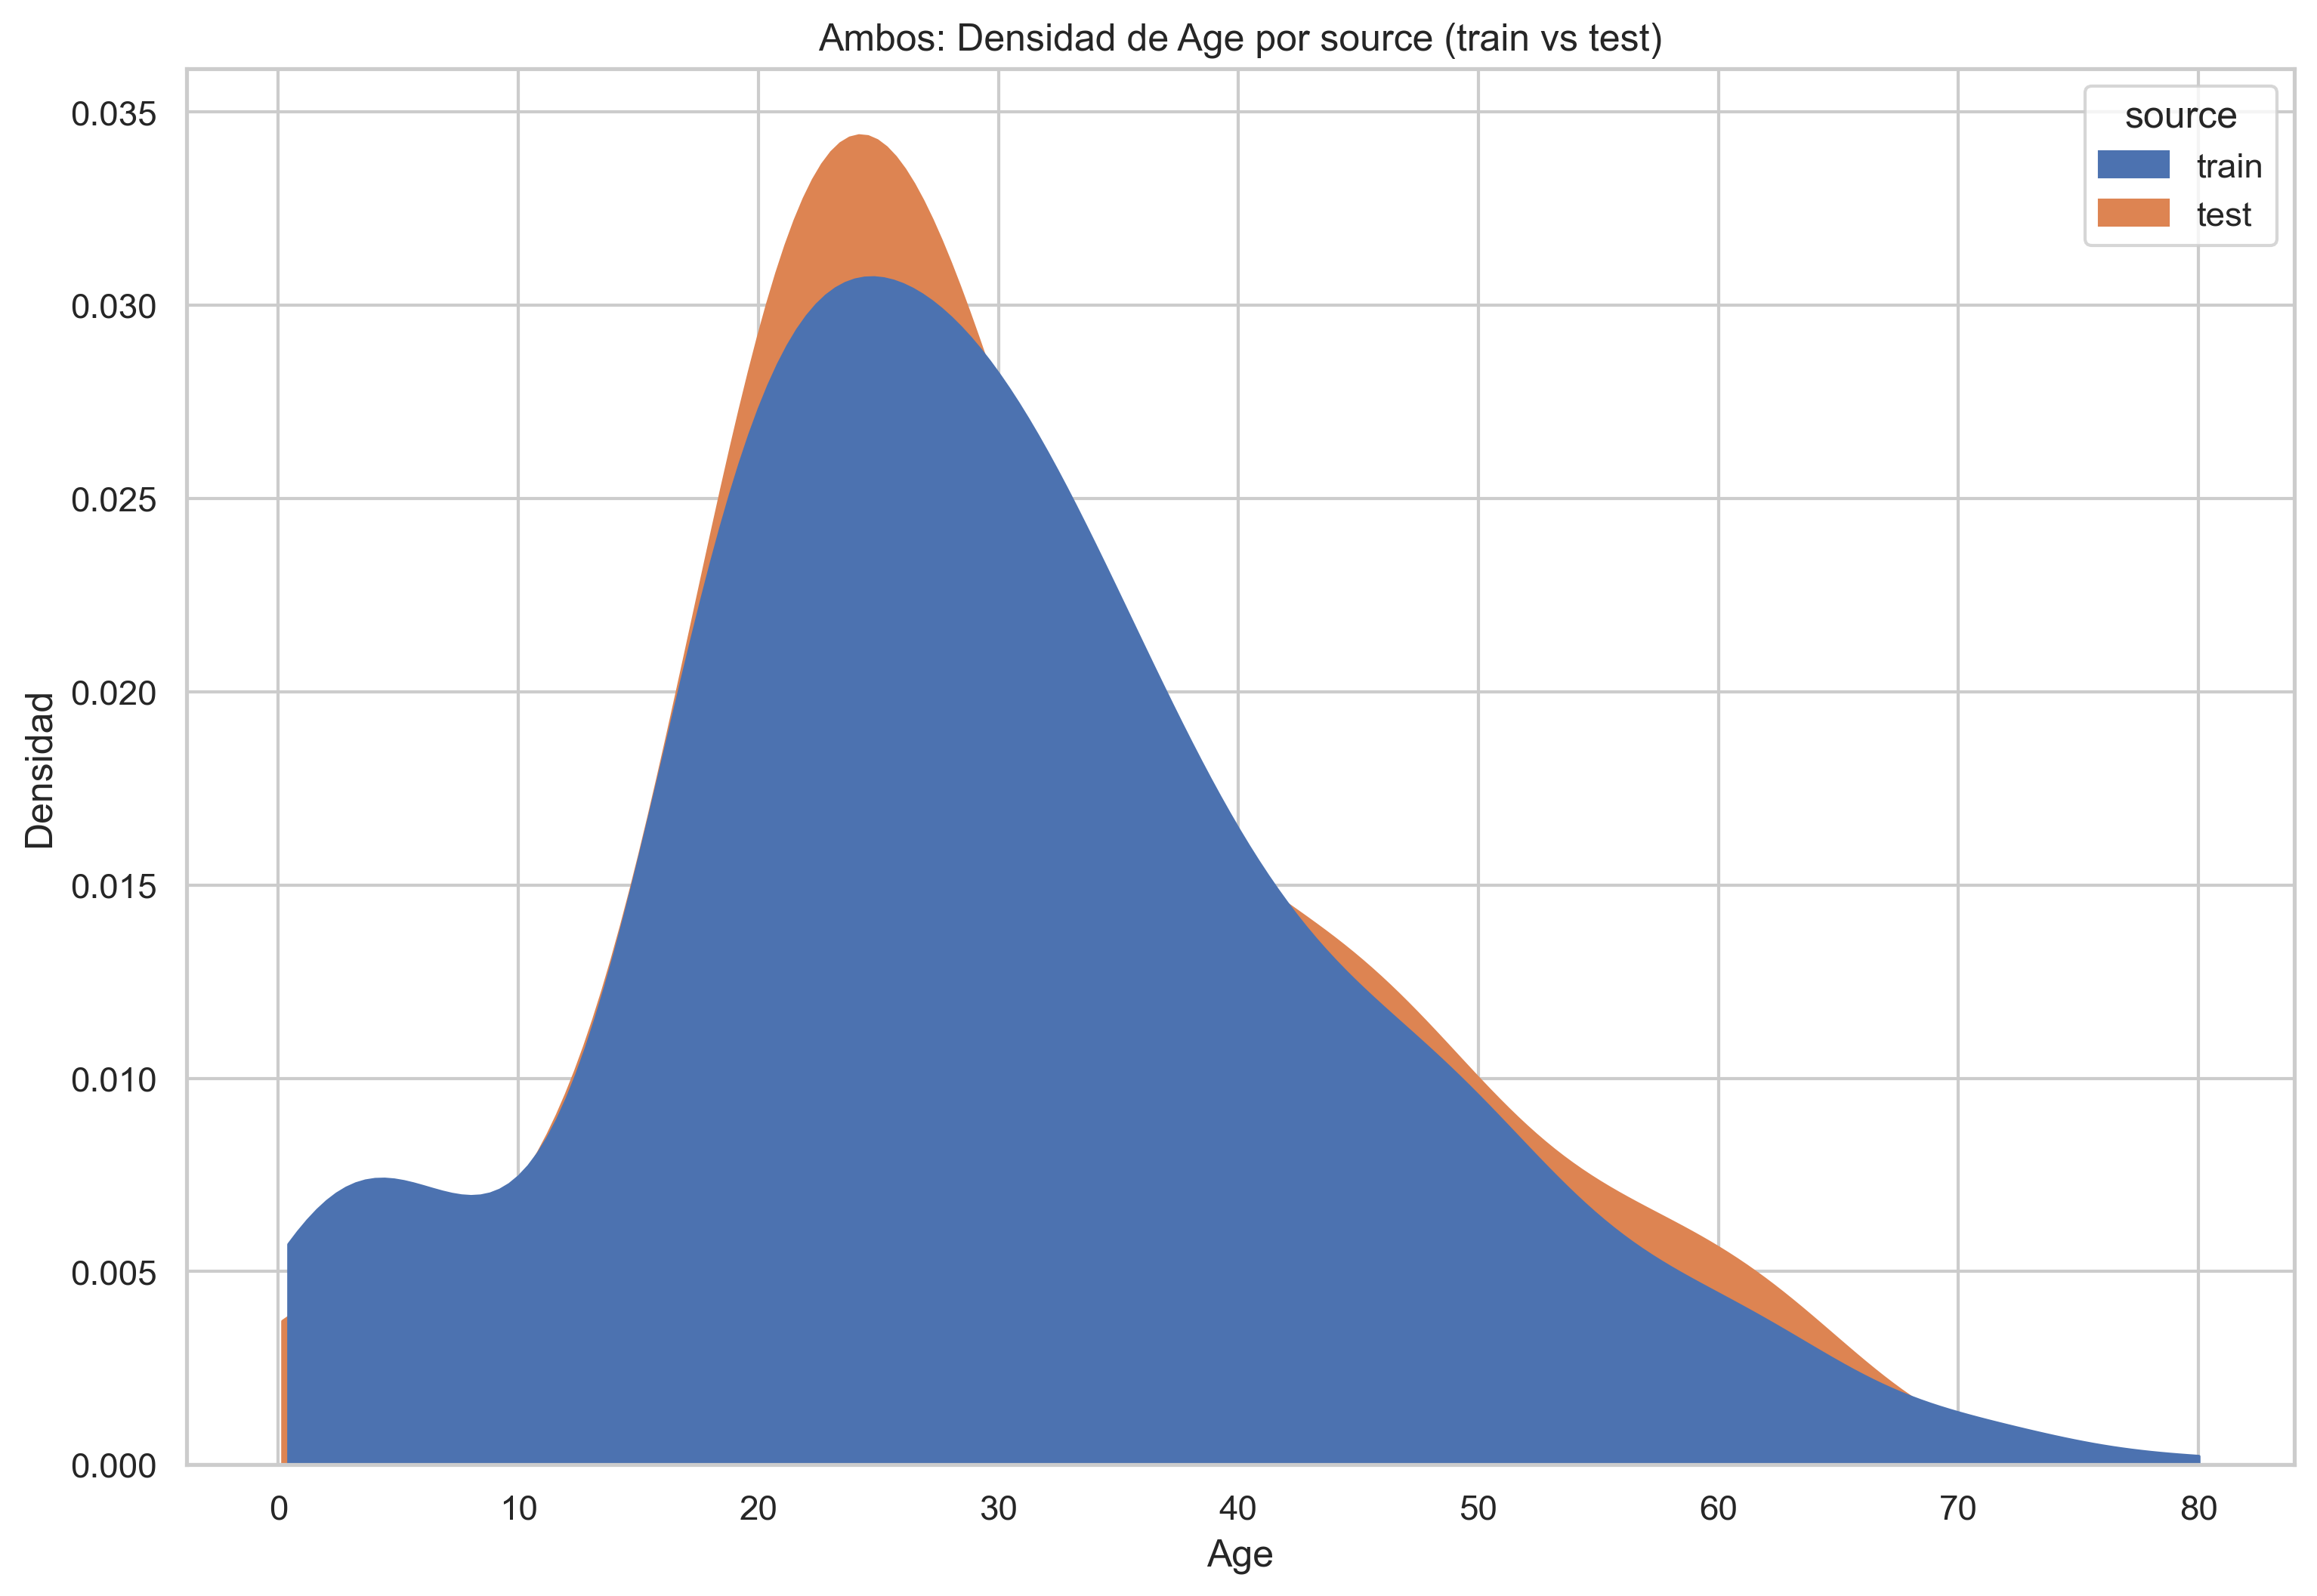

Comparando TRAIN vs TEST (Age), ambas fuentes muestran perfiles muy próximos, lo que sugiere buena consistencia entre conjuntos.


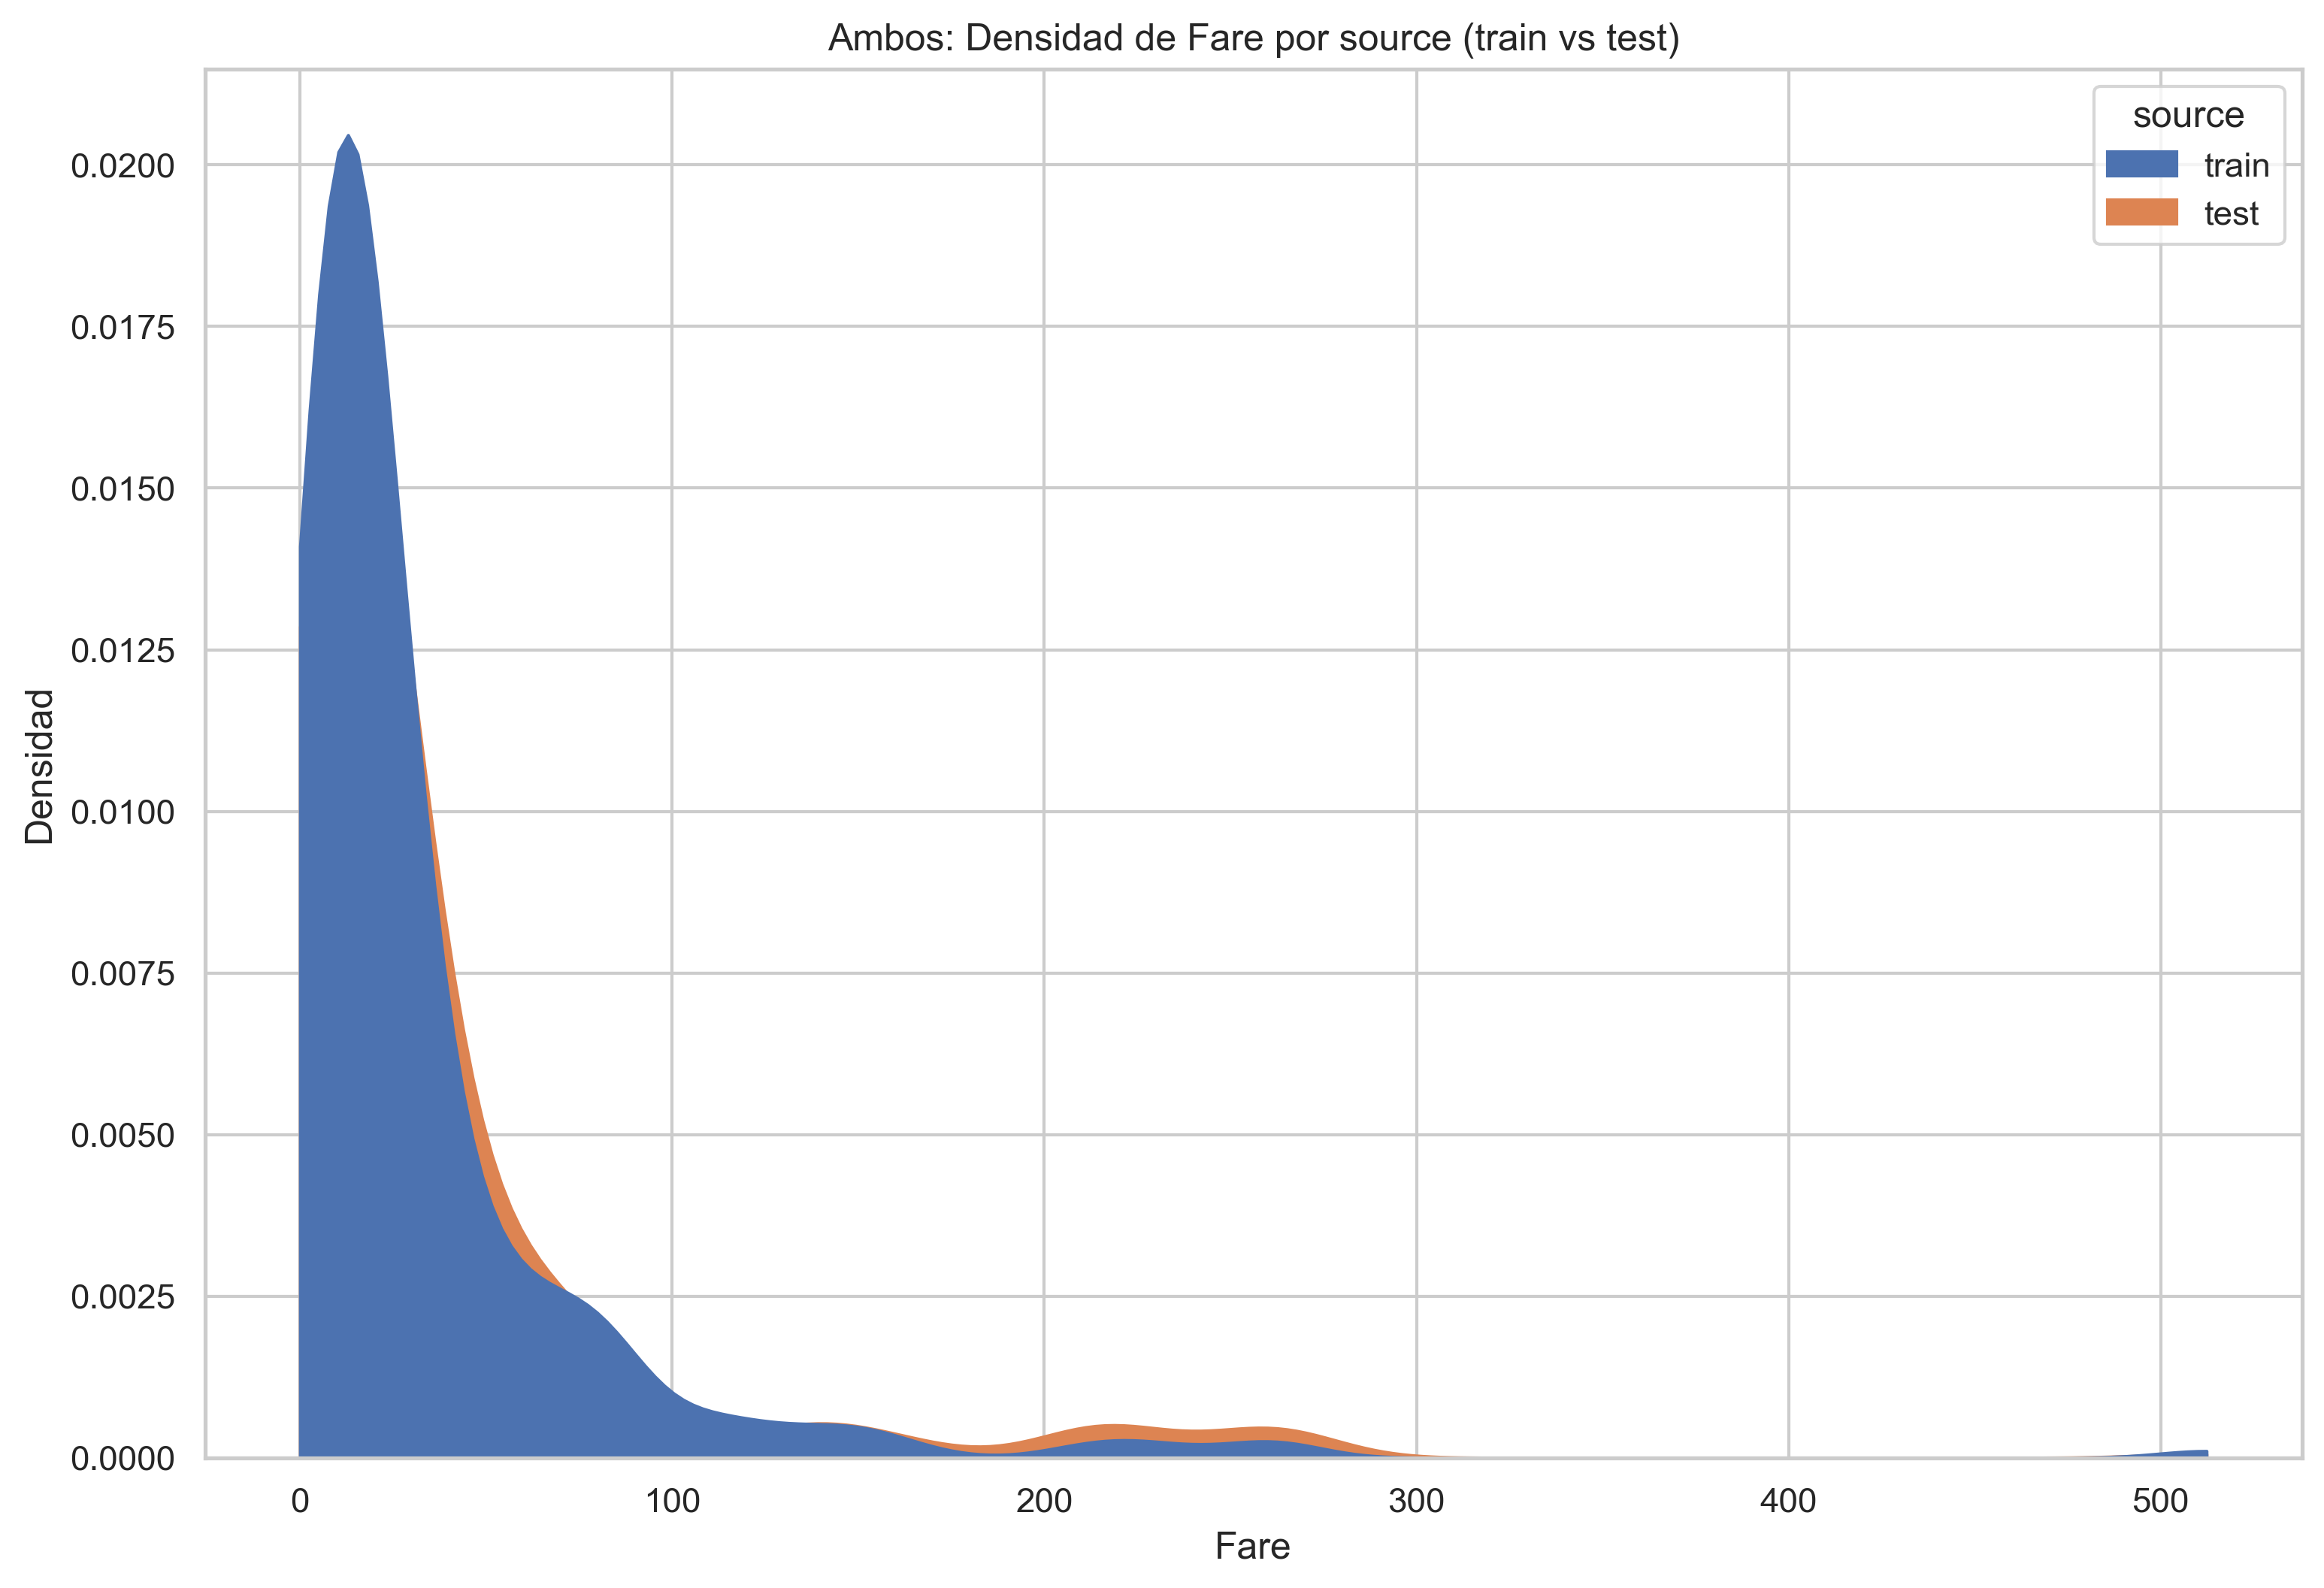

Comparando TRAIN vs TEST (Fare), las distribuciones son similares; ligeras diferencias en la cola alta pueden reflejar composición de clases distinta.


In [12]:


def ensure_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def kde1d(df, x, hue=None, title=""):
    if x not in df.columns:
        return
    dfx = df[[x] + ([hue] if hue and hue in df.columns else [])].dropna(subset=[x])
    if dfx.empty:
        return
    sns.kdeplot(data=dfx, x=x, hue=(hue if hue in dfx.columns else None),
                cut=0, fill=True, common_norm=False, alpha=1)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("Densidad")
    plt.show()

train["source"] = "train"
test["source"] = "test"
if "Survived" not in test.columns:
    test["Survived"] = None
ambos = pd.concat([train, test], ignore_index=True)

num_cols = ["Age", "Fare", "SibSp", "Parch"]
train = ensure_numeric(train, num_cols)
test = ensure_numeric(test, num_cols)
ambos = ensure_numeric(ambos, num_cols)

if "PassengerId" in test_modelo.columns and "PassengerId" in test.columns:
    test_modelo = test_modelo.copy()
    test_modelo["PassengerId"] = test_modelo["PassengerId"].astype(str)
    test_ = test.copy()
    test_["PassengerId"] = test_["PassengerId"].astype(str)
    test_modelo = test_modelo.merge(test_[["PassengerId"] + num_cols], on="PassengerId", how="left")

test_modelo = ensure_numeric(test_modelo, num_cols)

plt.rcParams["figure.figsize"] = (12, 8)
sns.set_theme(style="whitegrid")

kde1d(train, "Age", hue="Survived", title="Train: Densidad de Age por Survived")
print("En TRAIN (Age), la densidad suele concentrarse en edades adultas, con diferencias claras entre quienes sobrevivieron y quienes no.")

kde1d(train, "Fare", hue="Survived", title="Train: Densidad de Fare por Survived")
print("En TRAIN (Fare), la mayor parte de tarifas se ubica en valores bajos, y las tarifas altas se asocian con mayor probabilidad de supervivencia.")

kde1d(test_modelo, "Age", title="Test_modelo: Densidad de Age")
print("En TEST_MODELO (Age), la distribución de edades mantiene un patrón similar al de TRAIN, con predominio de edades adultas.")

kde1d(test_modelo, "Fare", title="Test_modelo: Densidad de Fare")
print("En TEST_MODELO (Fare), se observan muchas tarifas bajas y una cola hacia valores altos, coherente con la mezcla de clases.")

kde1d(ambos, "Age", hue="source", title="Ambos: Densidad de Age por source (train vs test)")
print("Comparando TRAIN vs TEST (Age), ambas fuentes muestran perfiles muy próximos, lo que sugiere buena consistencia entre conjuntos.")

kde1d(ambos, "Fare", hue="source", title="Ambos: Densidad de Fare por source (train vs test)")
print("Comparando TRAIN vs TEST (Fare), las distribuciones son similares; ligeras diferencias en la cola alta pueden reflejar composición de clases distinta.")



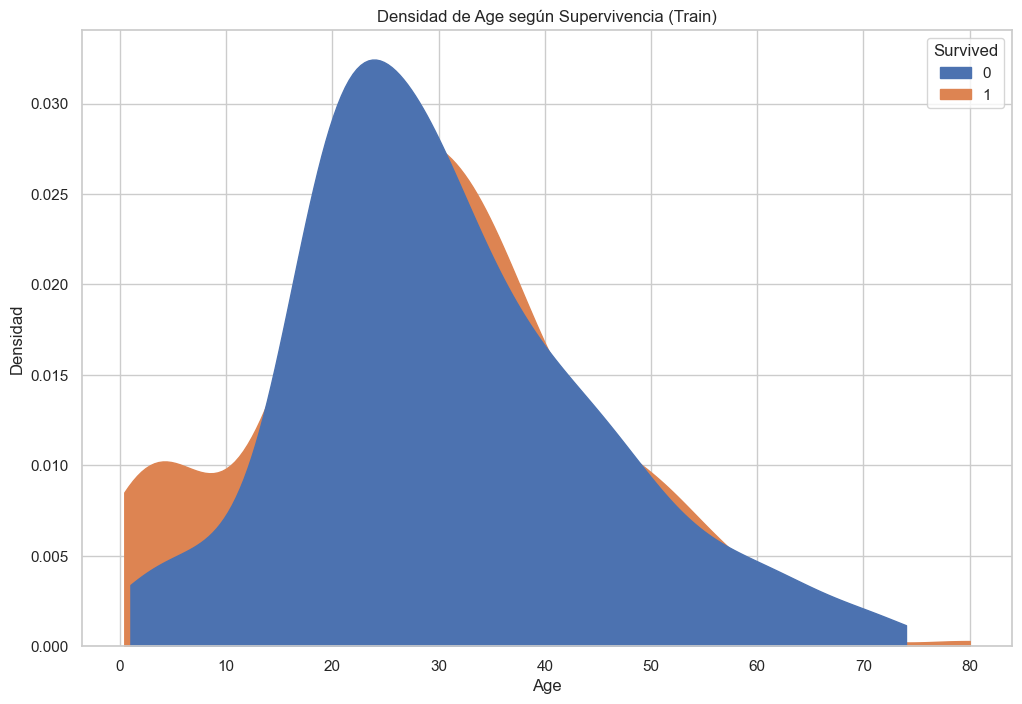

En el conjunto TRAIN, la variable Age muestra diferencias claras entre quienes sobrevivieron y quienes no. Las curvas indican que la supervivencia estuvo influida por la distribución de Age en los pasajeros.


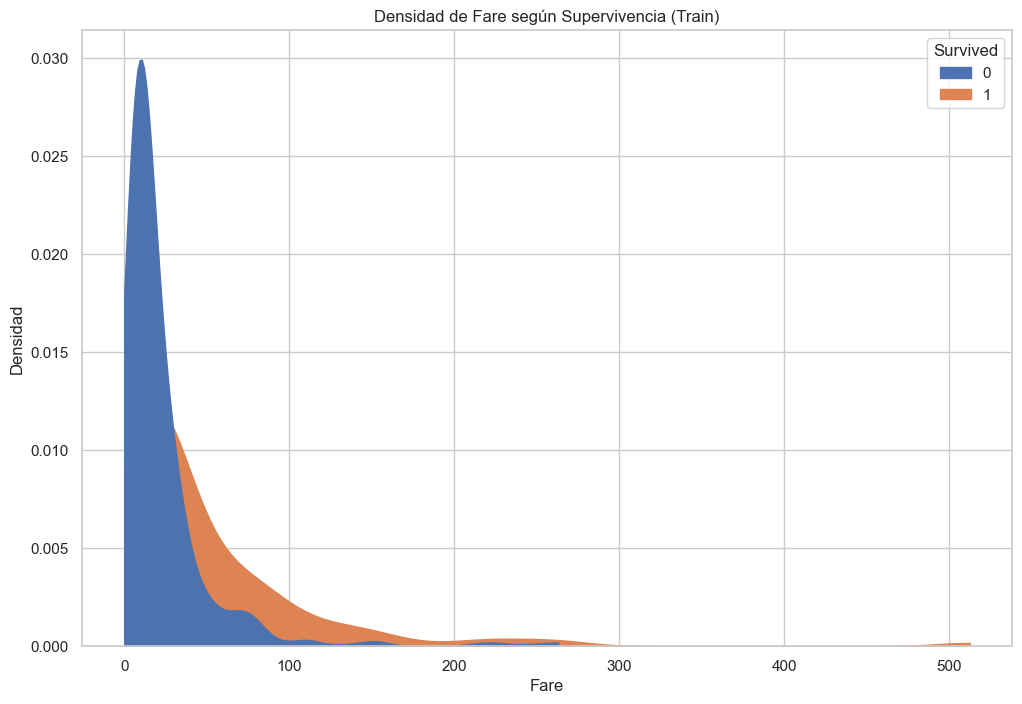

En el conjunto TRAIN, la variable Fare muestra diferencias claras entre quienes sobrevivieron y quienes no. Las curvas indican que la supervivencia estuvo influida por la distribución de Fare en los pasajeros.


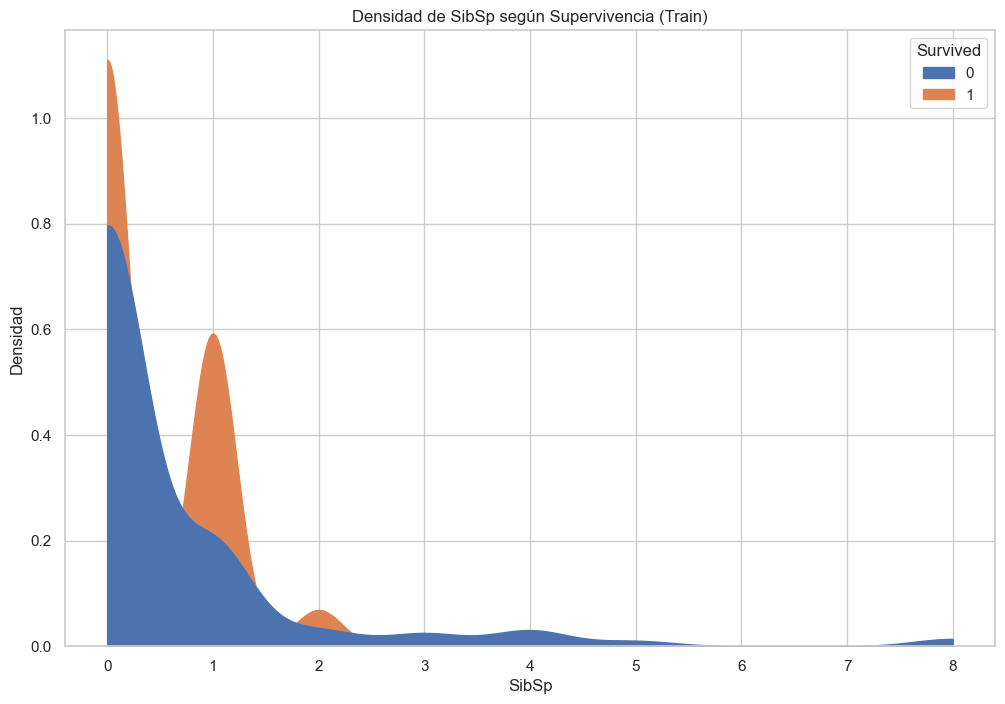

En el conjunto TRAIN, la variable SibSp muestra diferencias claras entre quienes sobrevivieron y quienes no. Las curvas indican que la supervivencia estuvo influida por la distribución de SibSp en los pasajeros.


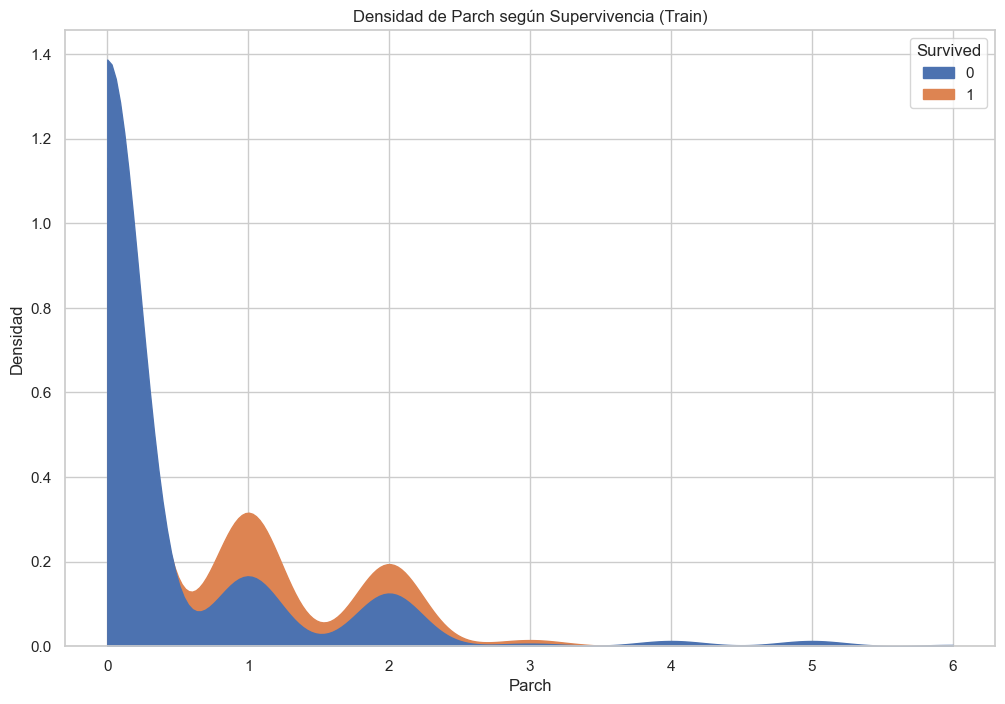

En el conjunto TRAIN, la variable Parch muestra diferencias claras entre quienes sobrevivieron y quienes no. Las curvas indican que la supervivencia estuvo influida por la distribución de Parch en los pasajeros.


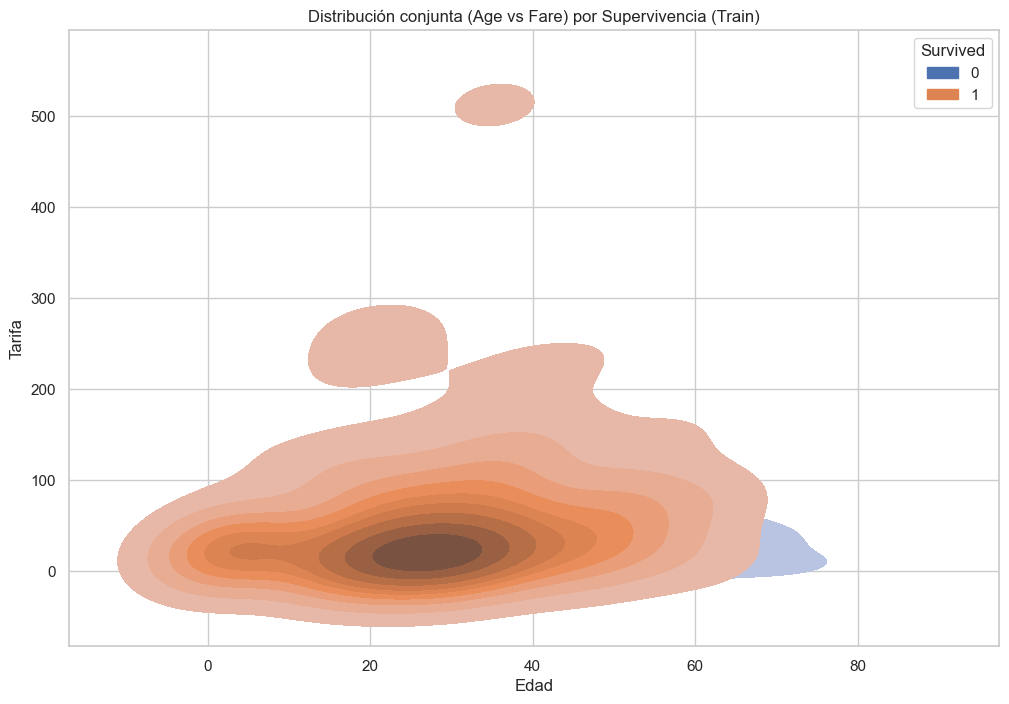

La distribución conjunta de Age y Fare muestra que los pasajeros más jóvenes con tarifas altas presentaron una mayor probabilidad de supervivencia, mientras que las tarifas bajas se concentraron en pasajeros de clase económica.


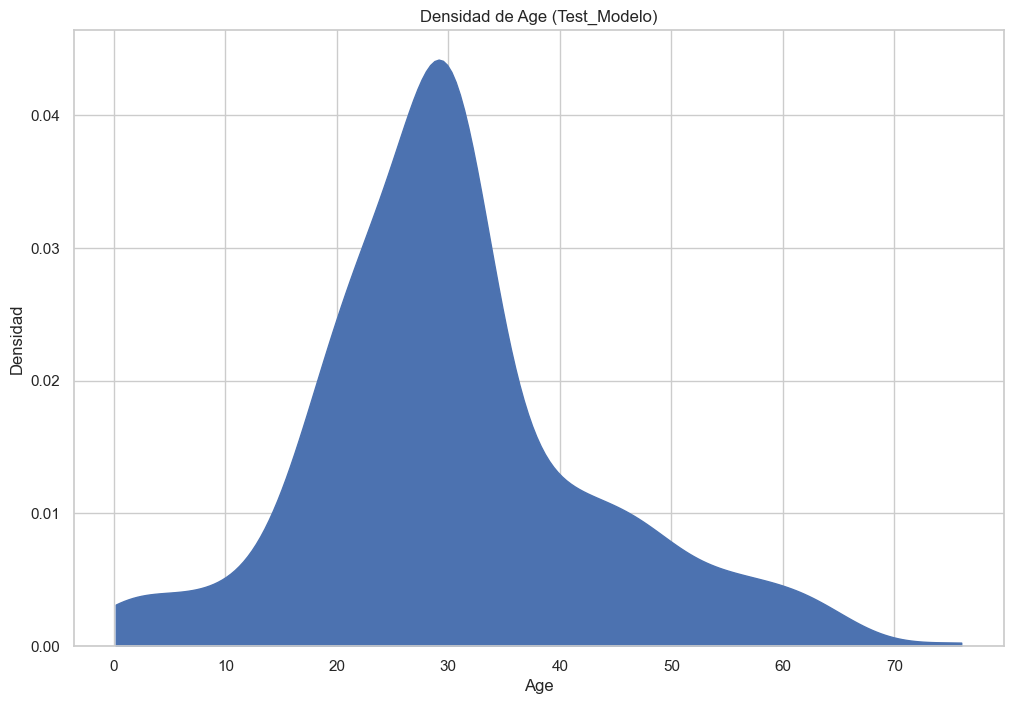

En el conjunto TEST_MODELO, la variable Age mantiene una distribución similar a la del conjunto de entrenamiento, lo que indica consistencia entre los datos de prueba y los de entrenamiento.


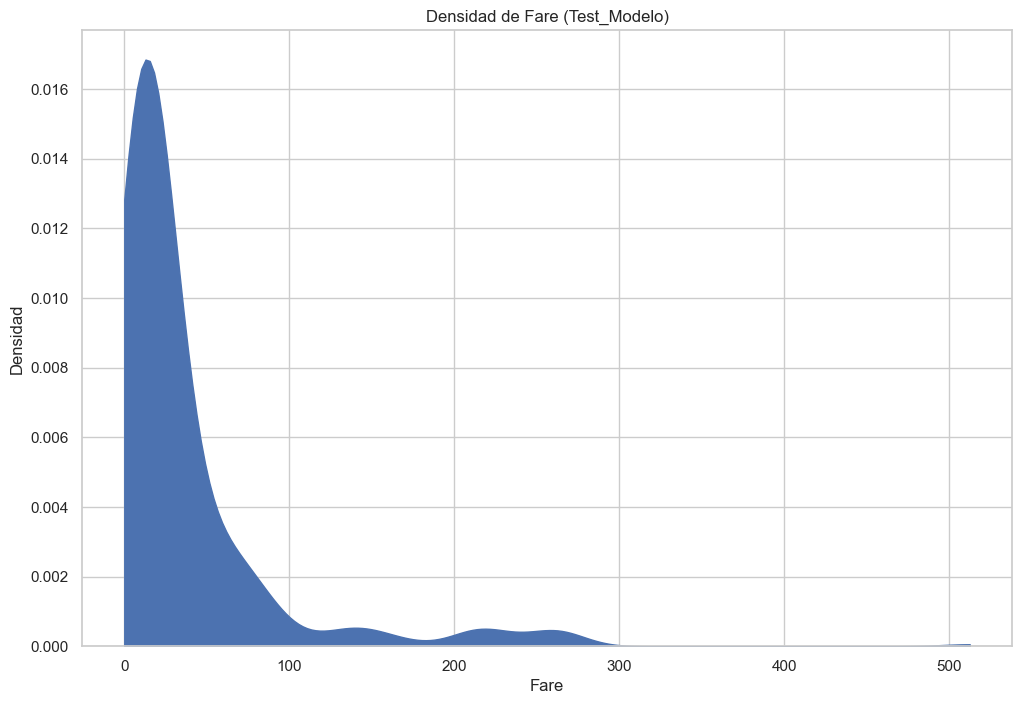

En el conjunto TEST_MODELO, la variable Fare mantiene una distribución similar a la del conjunto de entrenamiento, lo que indica consistencia entre los datos de prueba y los de entrenamiento.


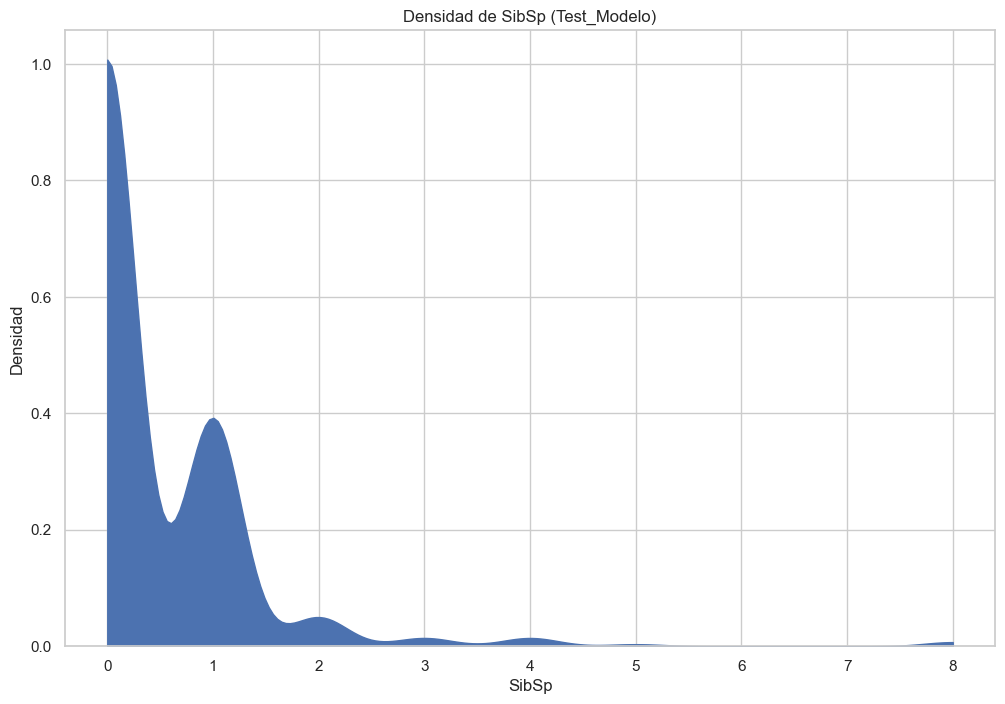

En el conjunto TEST_MODELO, la variable SibSp mantiene una distribución similar a la del conjunto de entrenamiento, lo que indica consistencia entre los datos de prueba y los de entrenamiento.


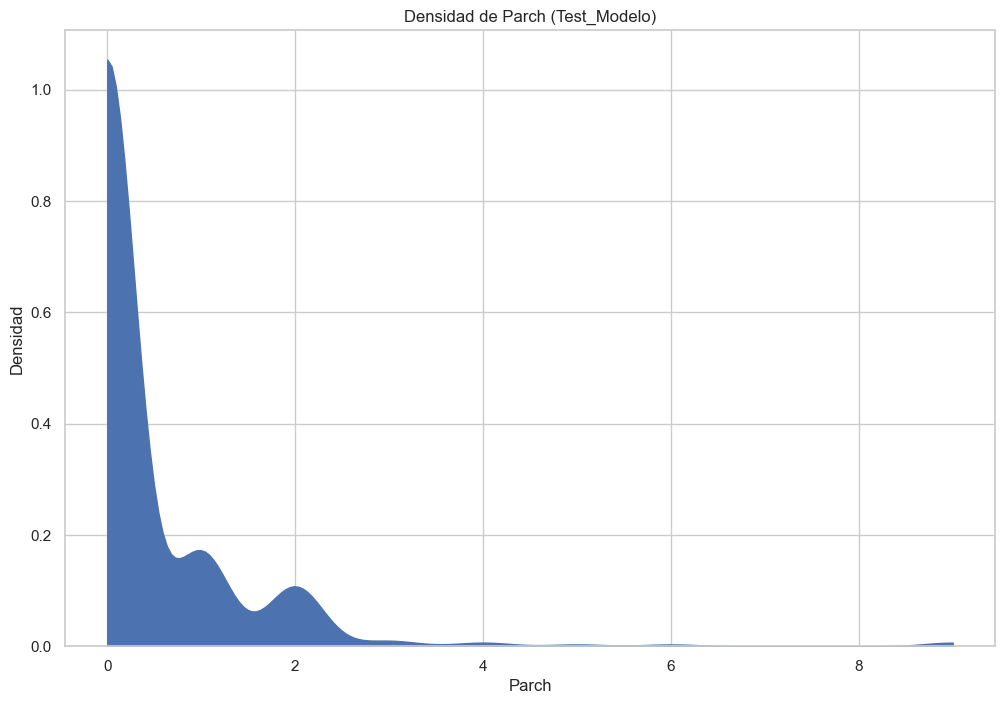

En el conjunto TEST_MODELO, la variable Parch mantiene una distribución similar a la del conjunto de entrenamiento, lo que indica consistencia entre los datos de prueba y los de entrenamiento.


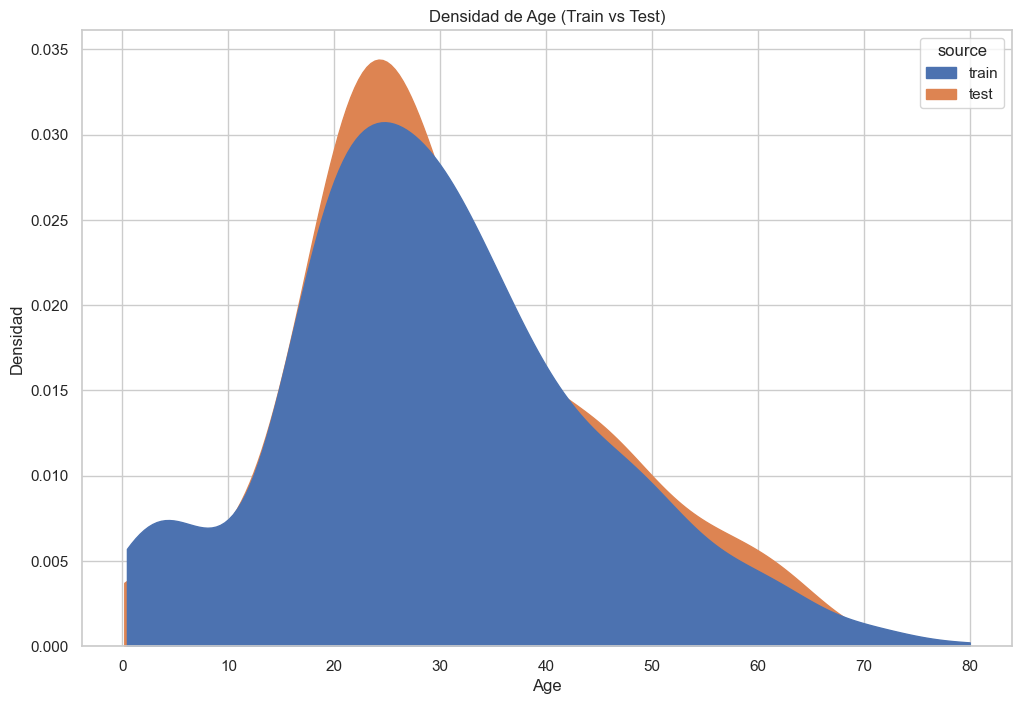

La comparación entre TRAIN y TEST para la variable Age muestra patrones de densidad muy similares. Esto sugiere que ambos conjuntos están bien equilibrados y representan poblaciones comparables.


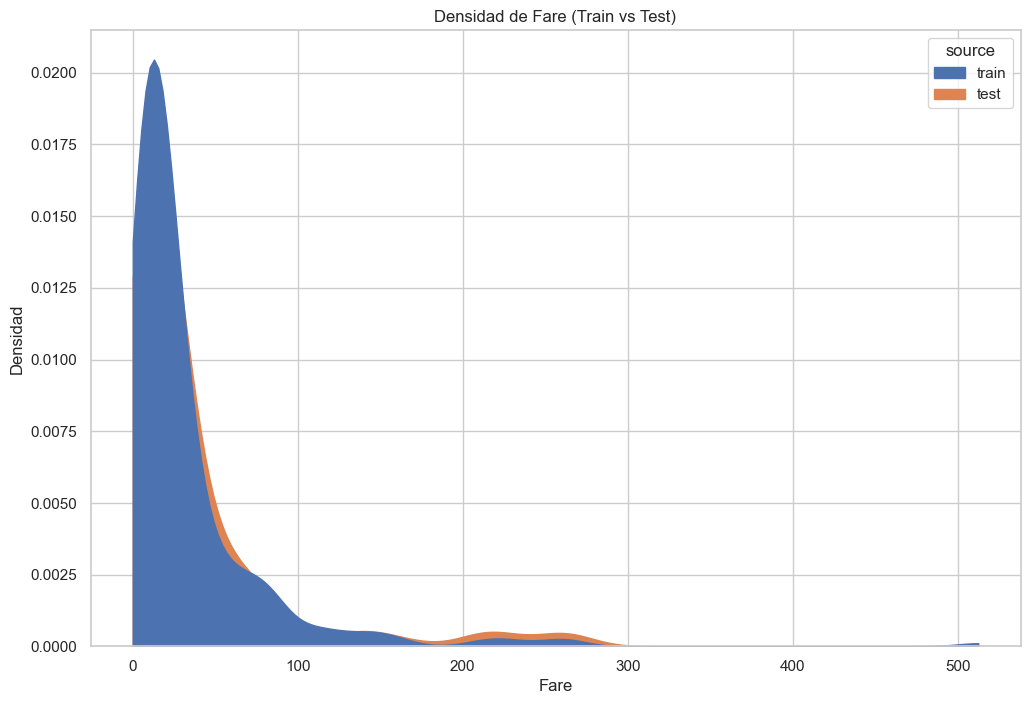

La comparación entre TRAIN y TEST para la variable Fare muestra patrones de densidad muy similares. Esto sugiere que ambos conjuntos están bien equilibrados y representan poblaciones comparables.


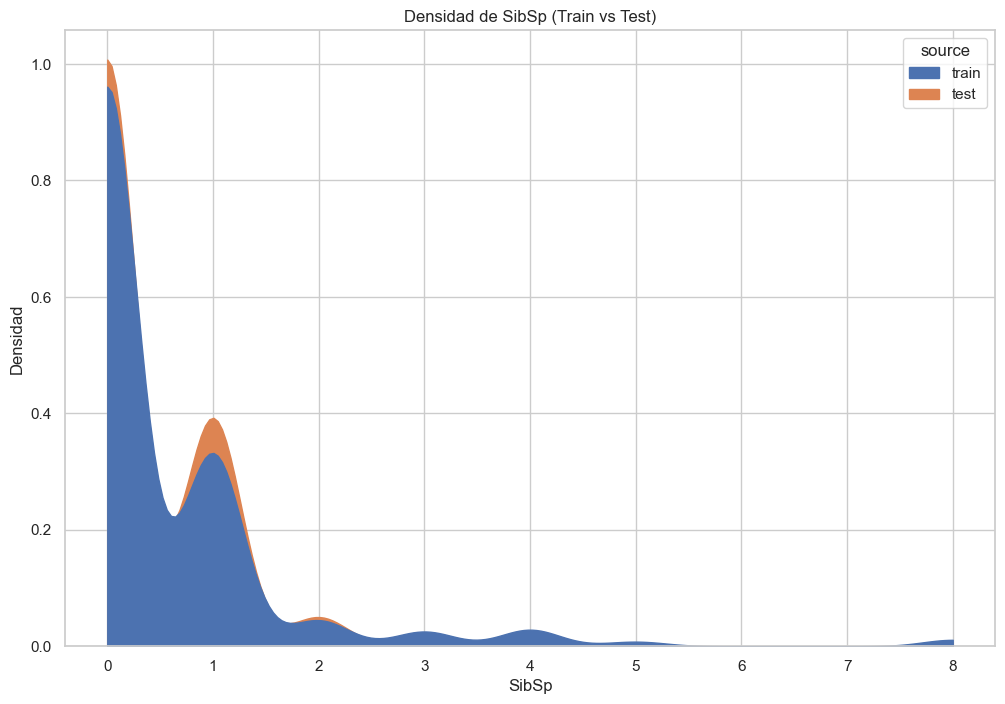

La comparación entre TRAIN y TEST para la variable SibSp muestra patrones de densidad muy similares. Esto sugiere que ambos conjuntos están bien equilibrados y representan poblaciones comparables.


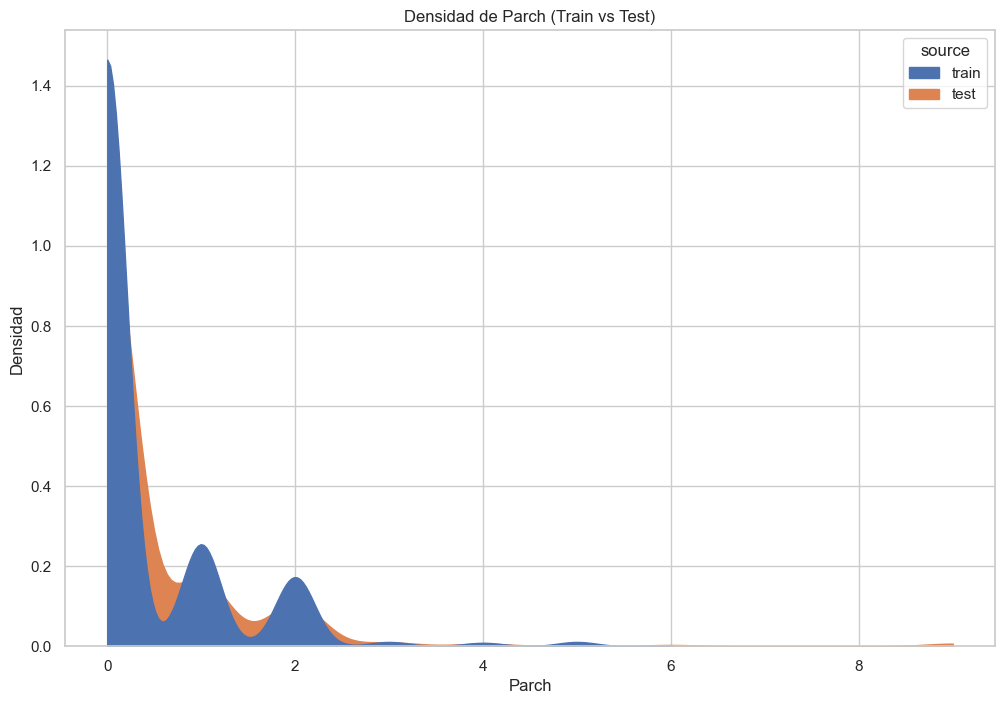

La comparación entre TRAIN y TEST para la variable Parch muestra patrones de densidad muy similares. Esto sugiere que ambos conjuntos están bien equilibrados y representan poblaciones comparables.


In [5]:
def ensure_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

train["source"] = "train"
test["source"] = "test"
if "Survived" not in test.columns:
    test["Survived"] = None

ambos = pd.concat([train, test], ignore_index=True)

num_cols = ["Age", "Fare", "SibSp", "Parch"]
train = ensure_numeric(train, num_cols)
test_modelo = ensure_numeric(test_modelo, num_cols)
ambos = ensure_numeric(ambos, num_cols)

plt.rcParams["figure.figsize"] = (12, 8)
sns.set_theme(style="whitegrid")

for col in num_cols:
    sns.kdeplot(data=train, x=col, hue="Survived", cut=0, fill=True, common_norm=False, alpha=1)
    plt.title(f"Densidad de {col} según Supervivencia (Train)")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()
    print(f"En el conjunto TRAIN, la variable {col} muestra diferencias claras entre quienes sobrevivieron y quienes no. "
          f"Las curvas indican que la supervivencia estuvo influida por la distribución de {col} en los pasajeros.")

sns.kdeplot(data=train, x="Age", y="Fare", hue="Survived", fill=True, thresh=0.05, levels=10, common_norm=False)
plt.title("Distribución conjunta (Age vs Fare) por Supervivencia (Train)")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.show()
print("La distribución conjunta de Age y Fare muestra que los pasajeros más jóvenes con tarifas altas presentaron "
      "una mayor probabilidad de supervivencia, mientras que las tarifas bajas se concentraron en pasajeros de clase económica.")

if "PassengerId" in test_modelo.columns and "PassengerId" in test.columns:
    test_modelo["PassengerId"] = test_modelo["PassengerId"].astype(str)
    test["PassengerId"] = test["PassengerId"].astype(str)
    test_modelo = test_modelo.merge(test, on="PassengerId", how="left", suffixes=("", "_test"))

for col in num_cols:
    sns.kdeplot(data=test_modelo, x=col, cut=0, fill=True, common_norm=False, alpha=1)
    plt.title(f"Densidad de {col} (Test_Modelo)")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()
    print(f"En el conjunto TEST_MODELO, la variable {col} mantiene una distribución similar a la del conjunto de entrenamiento, "
          f"lo que indica consistencia entre los datos de prueba y los de entrenamiento.")

for col in num_cols:
    sns.kdeplot(data=ambos, x=col, hue="source", cut=0, fill=True, common_norm=False, alpha=1)
    plt.title(f"Densidad de {col} (Train vs Test)")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()
    print(f"La comparación entre TRAIN y TEST para la variable {col} muestra patrones de densidad muy similares. "
          f"Esto sugiere que ambos conjuntos están bien equilibrados y representan poblaciones comparables.")

C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")


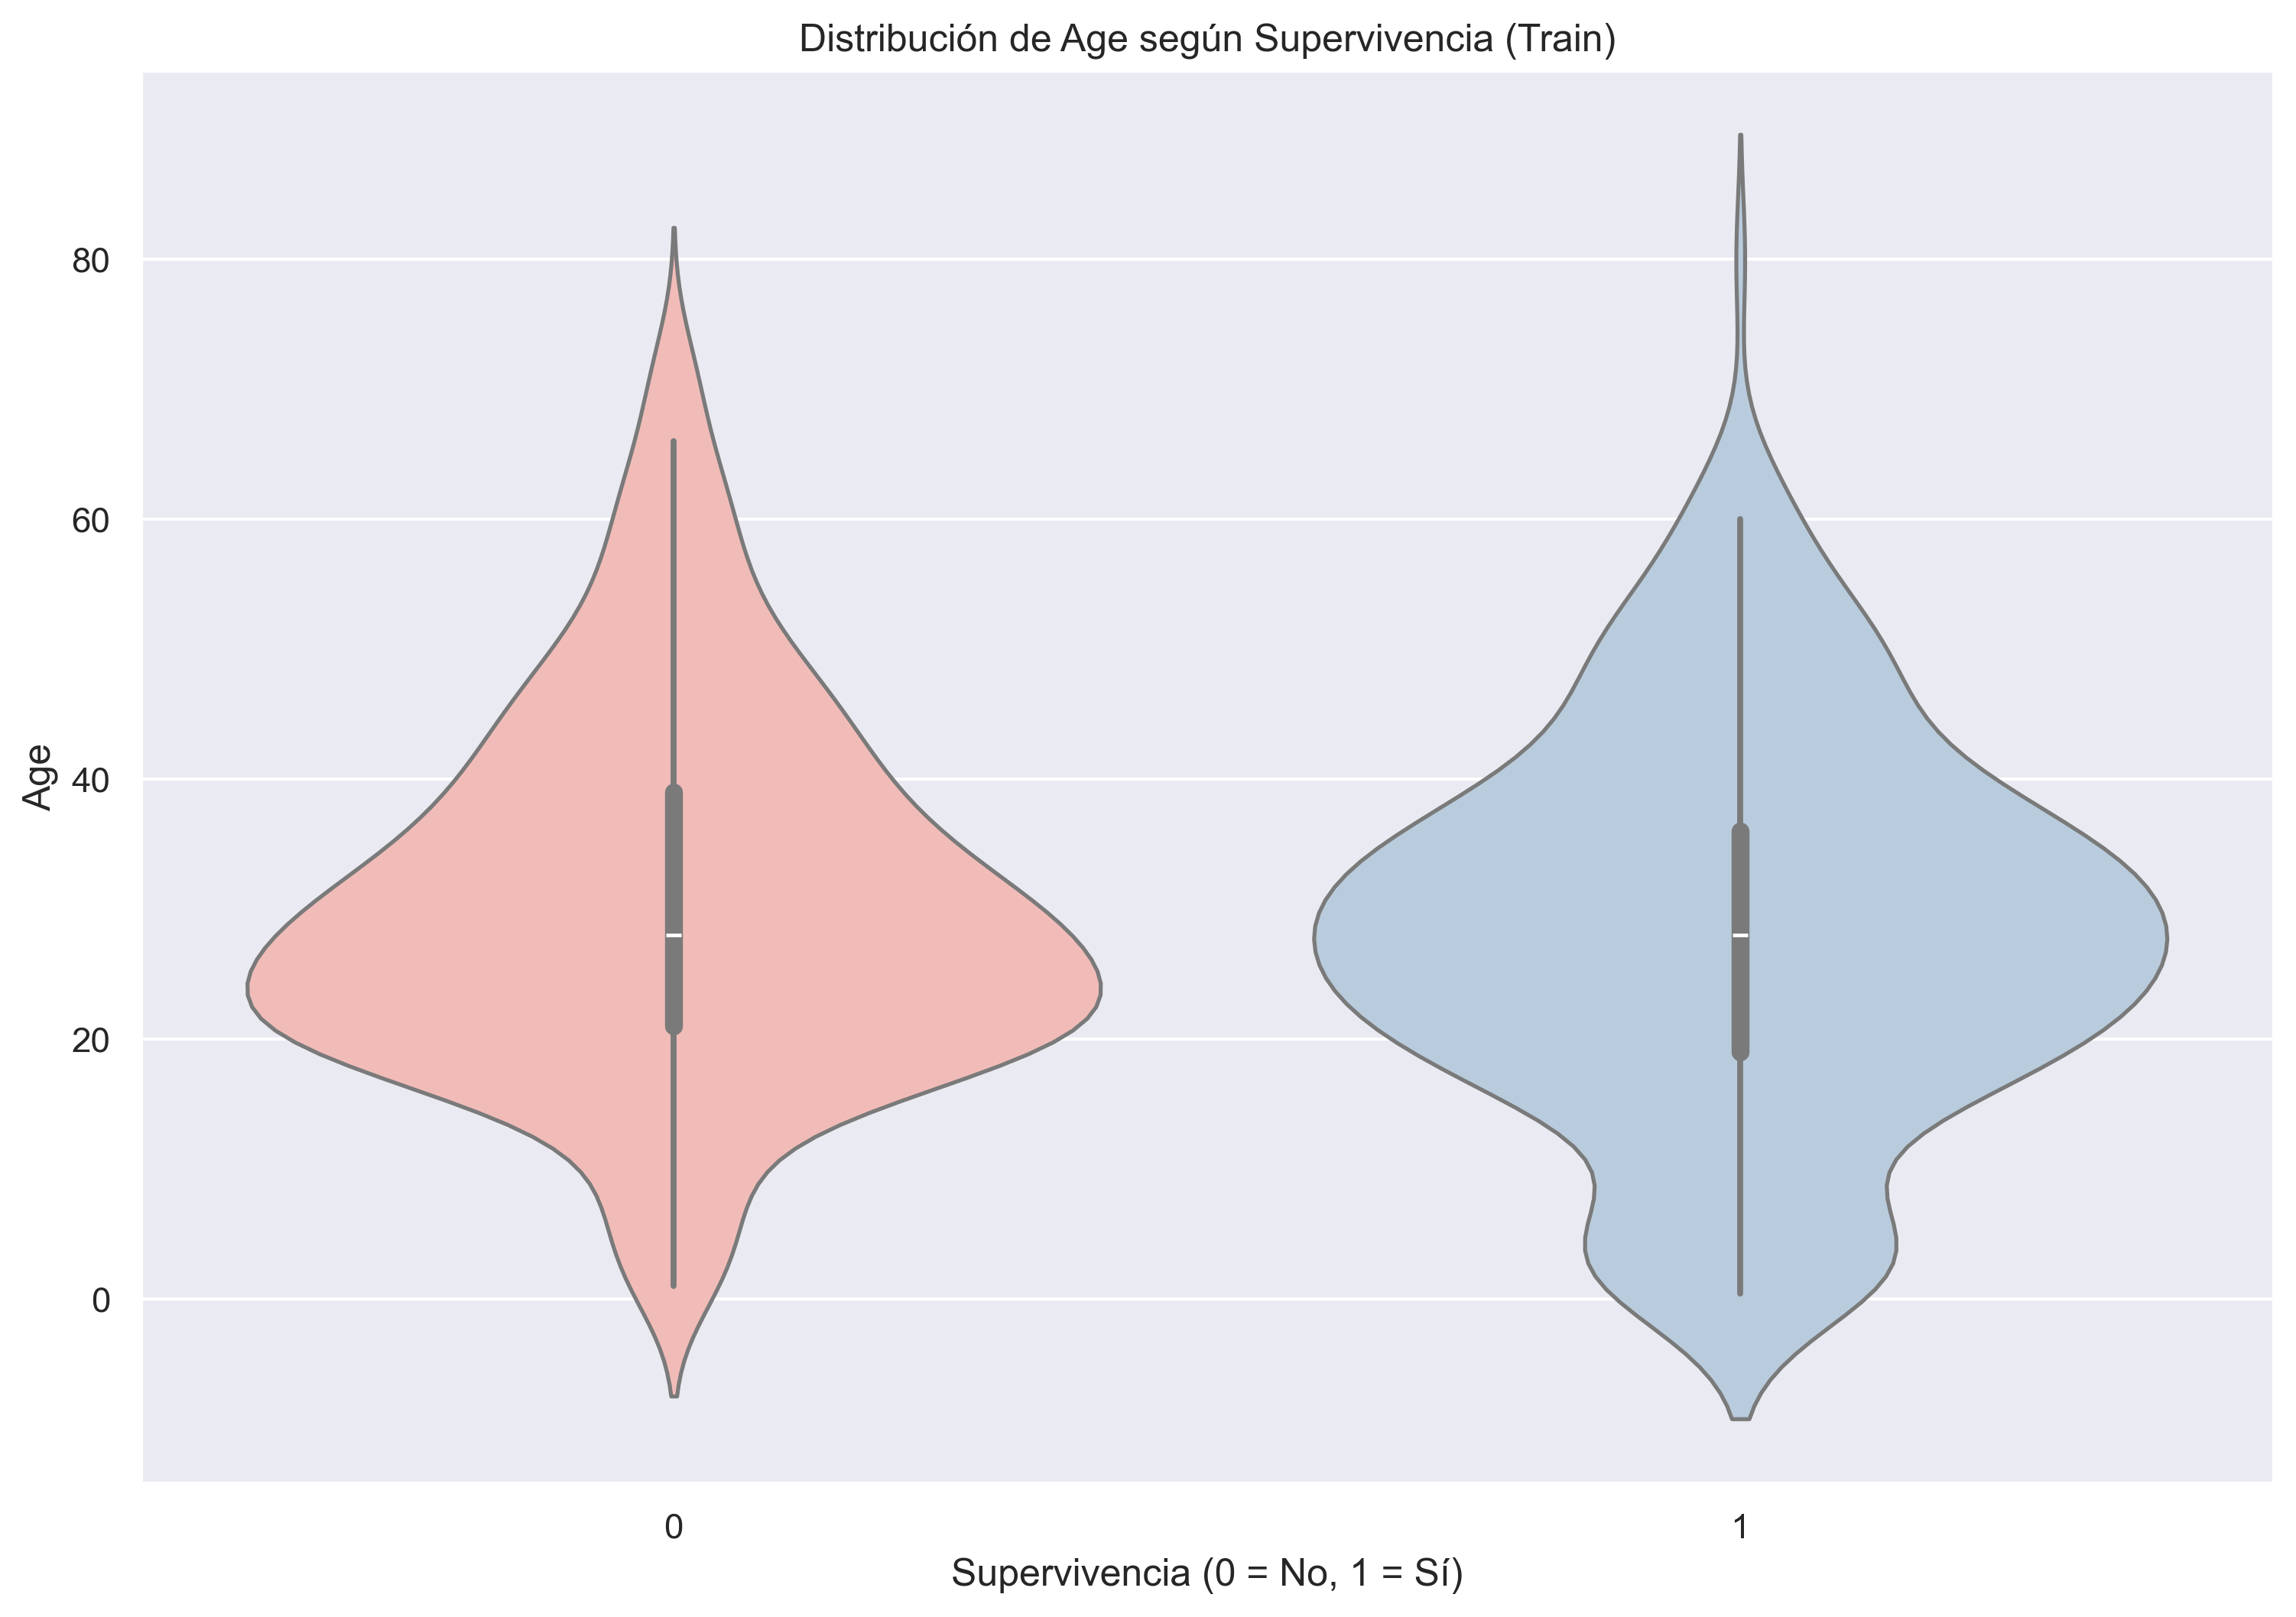

En el conjunto TRAIN, la variable Age muestra cómo varían los valores entre sobrevivientes y no sobrevivientes. Se aprecia que los patrones de Age difieren entre ambos grupos, indicando que esta variable influye en la probabilidad de supervivencia.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")


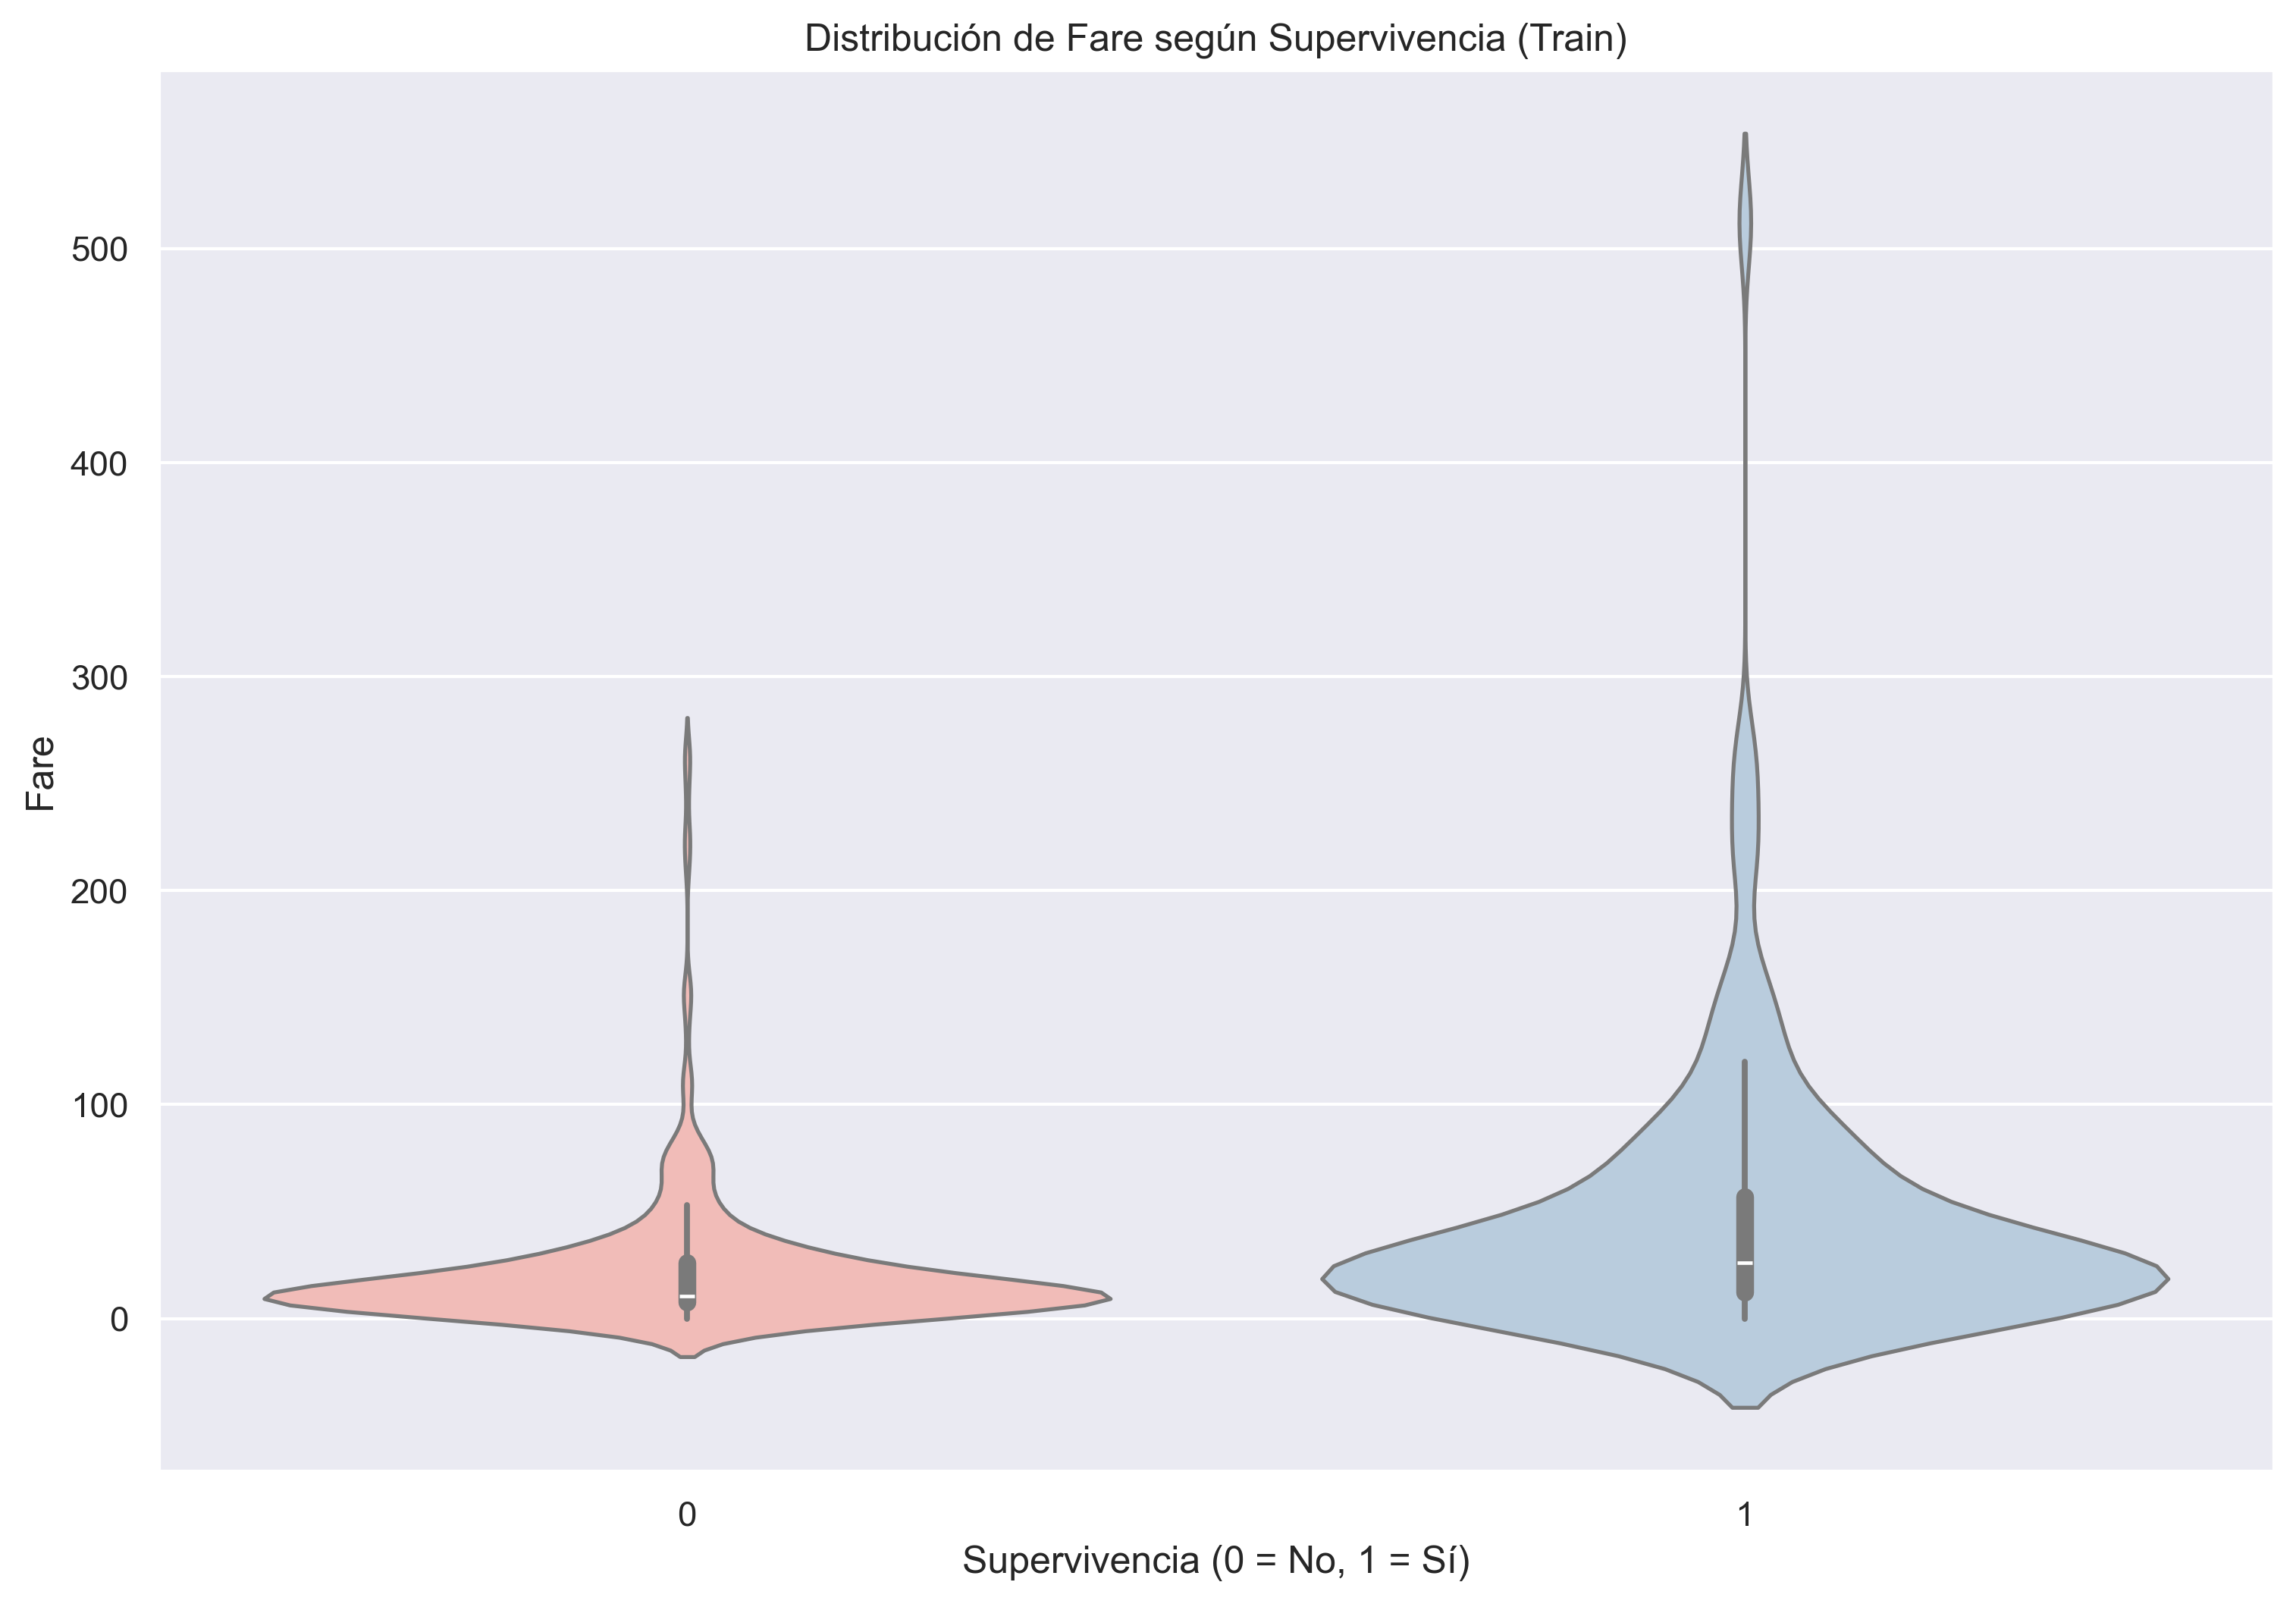

En el conjunto TRAIN, la variable Fare muestra cómo varían los valores entre sobrevivientes y no sobrevivientes. Se aprecia que los patrones de Fare difieren entre ambos grupos, indicando que esta variable influye en la probabilidad de supervivencia.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")


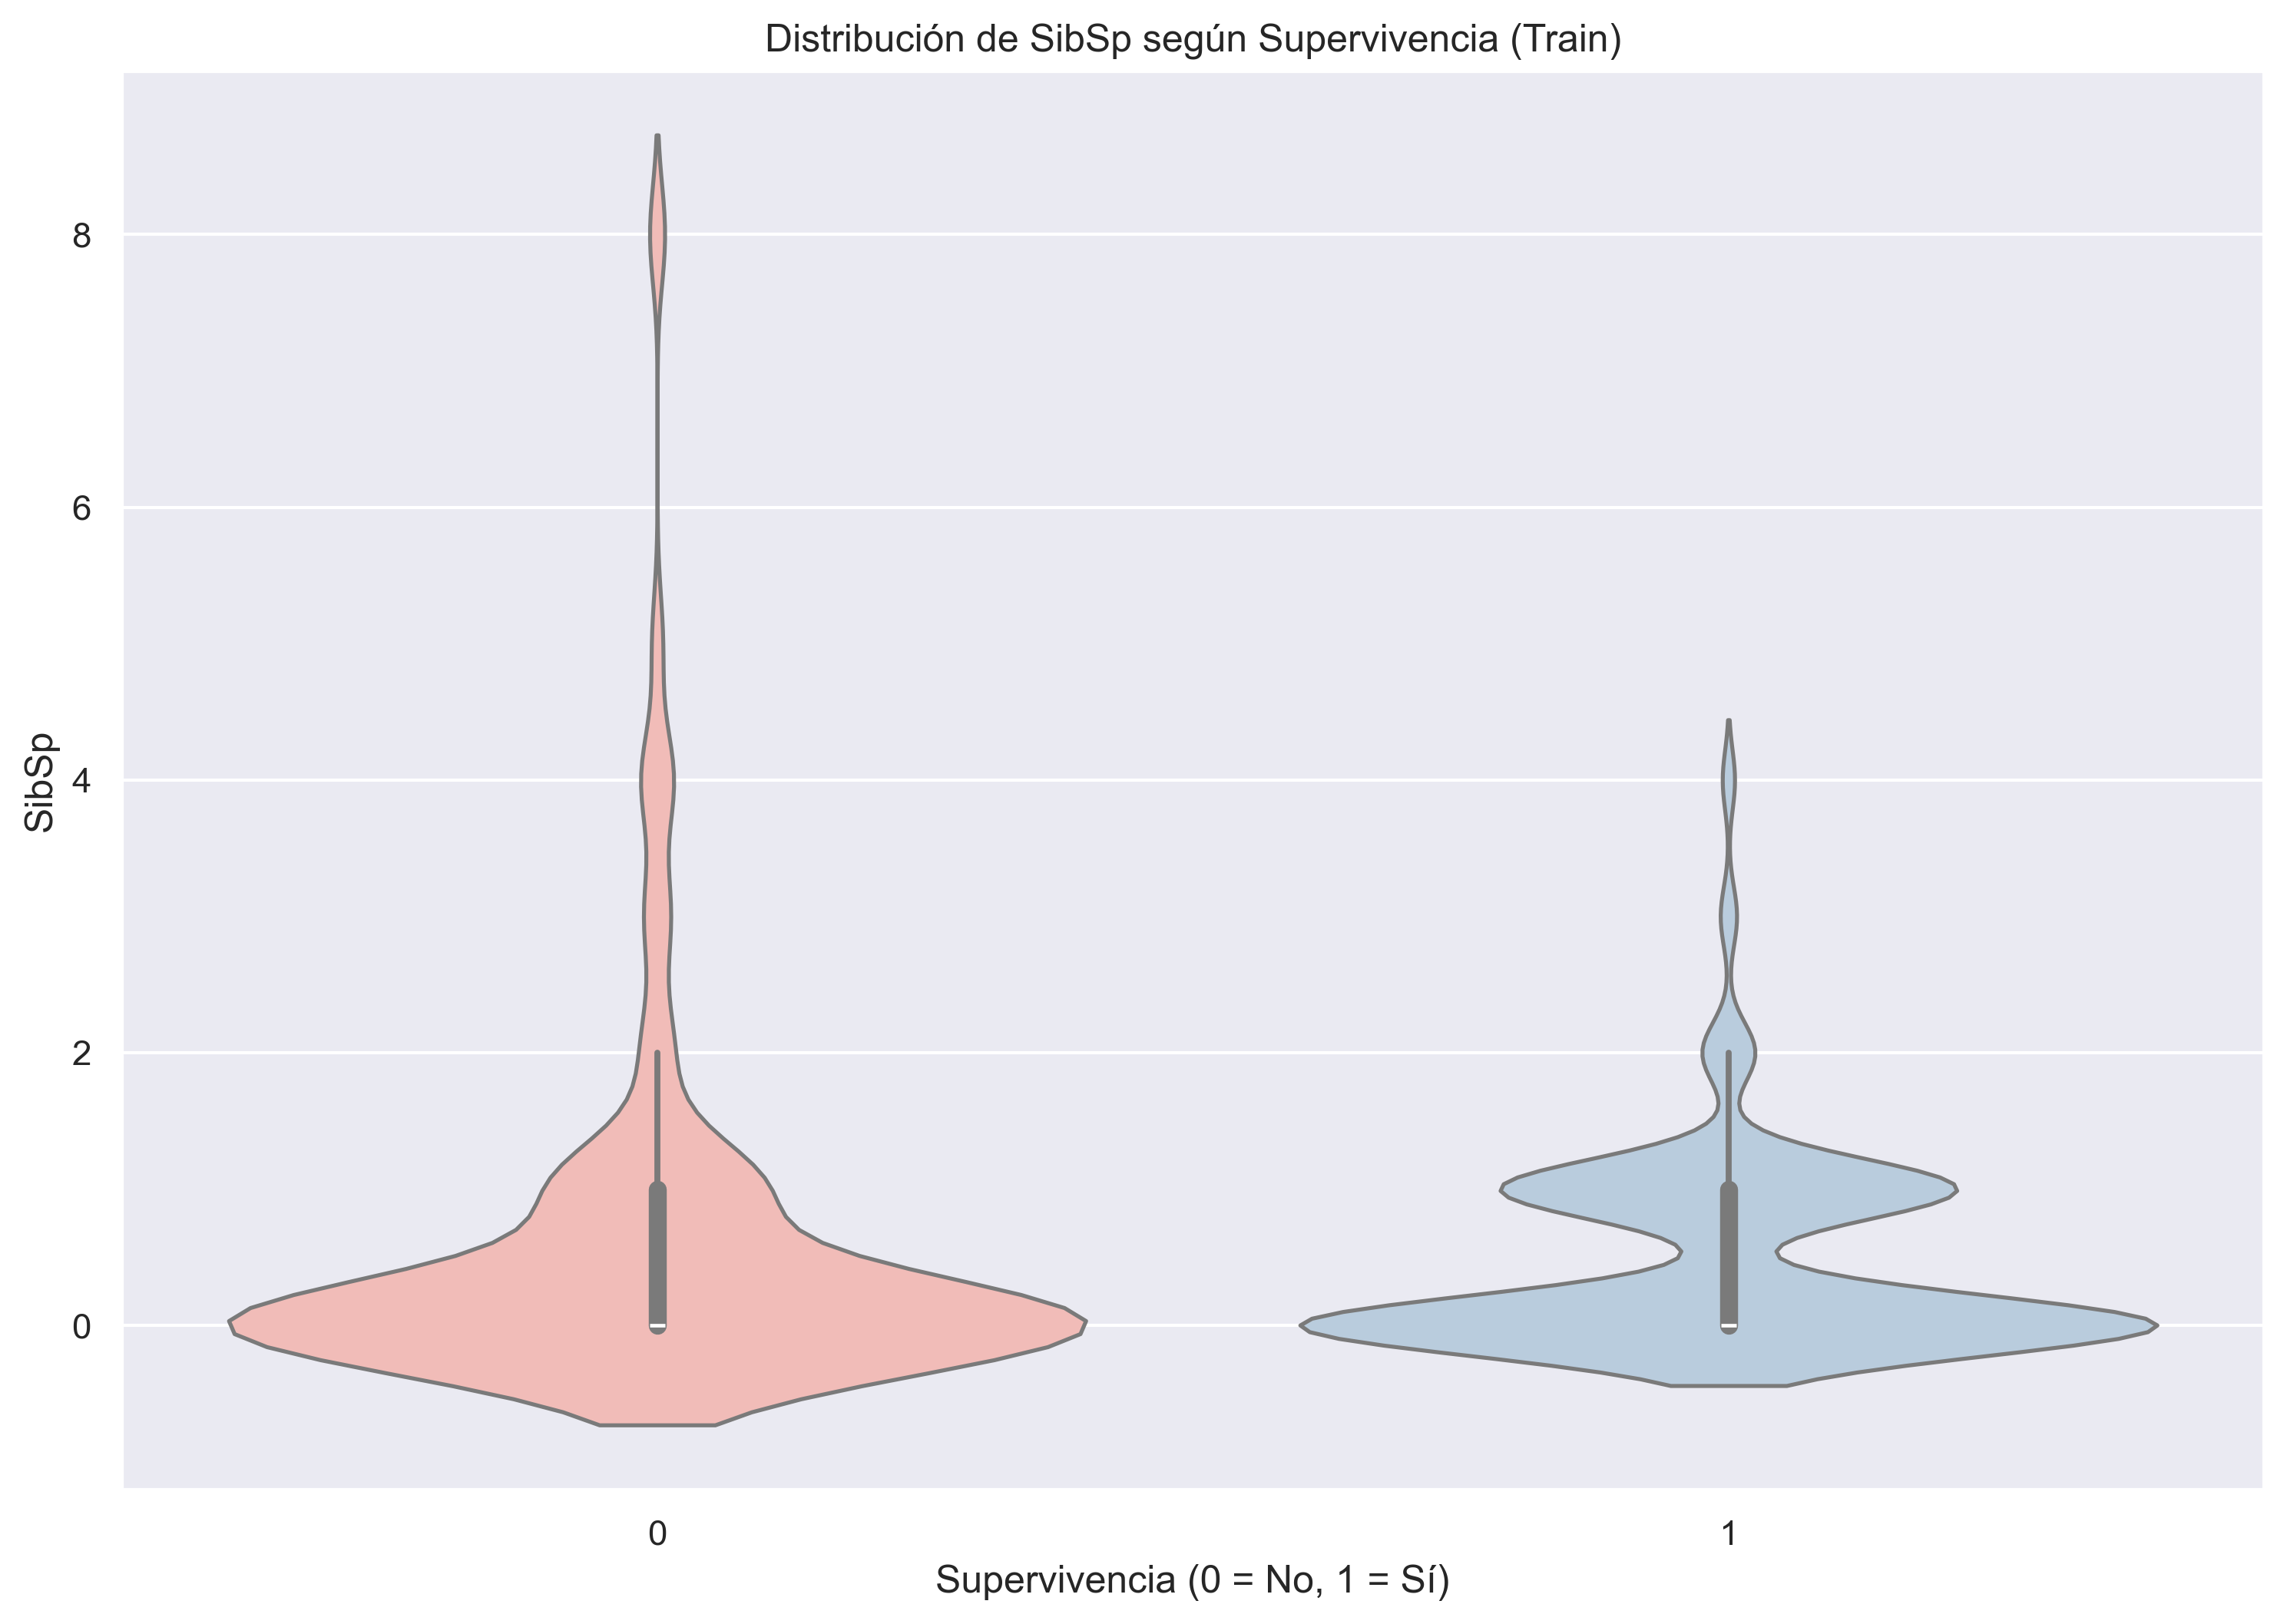

En el conjunto TRAIN, la variable SibSp muestra cómo varían los valores entre sobrevivientes y no sobrevivientes. Se aprecia que los patrones de SibSp difieren entre ambos grupos, indicando que esta variable influye en la probabilidad de supervivencia.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")


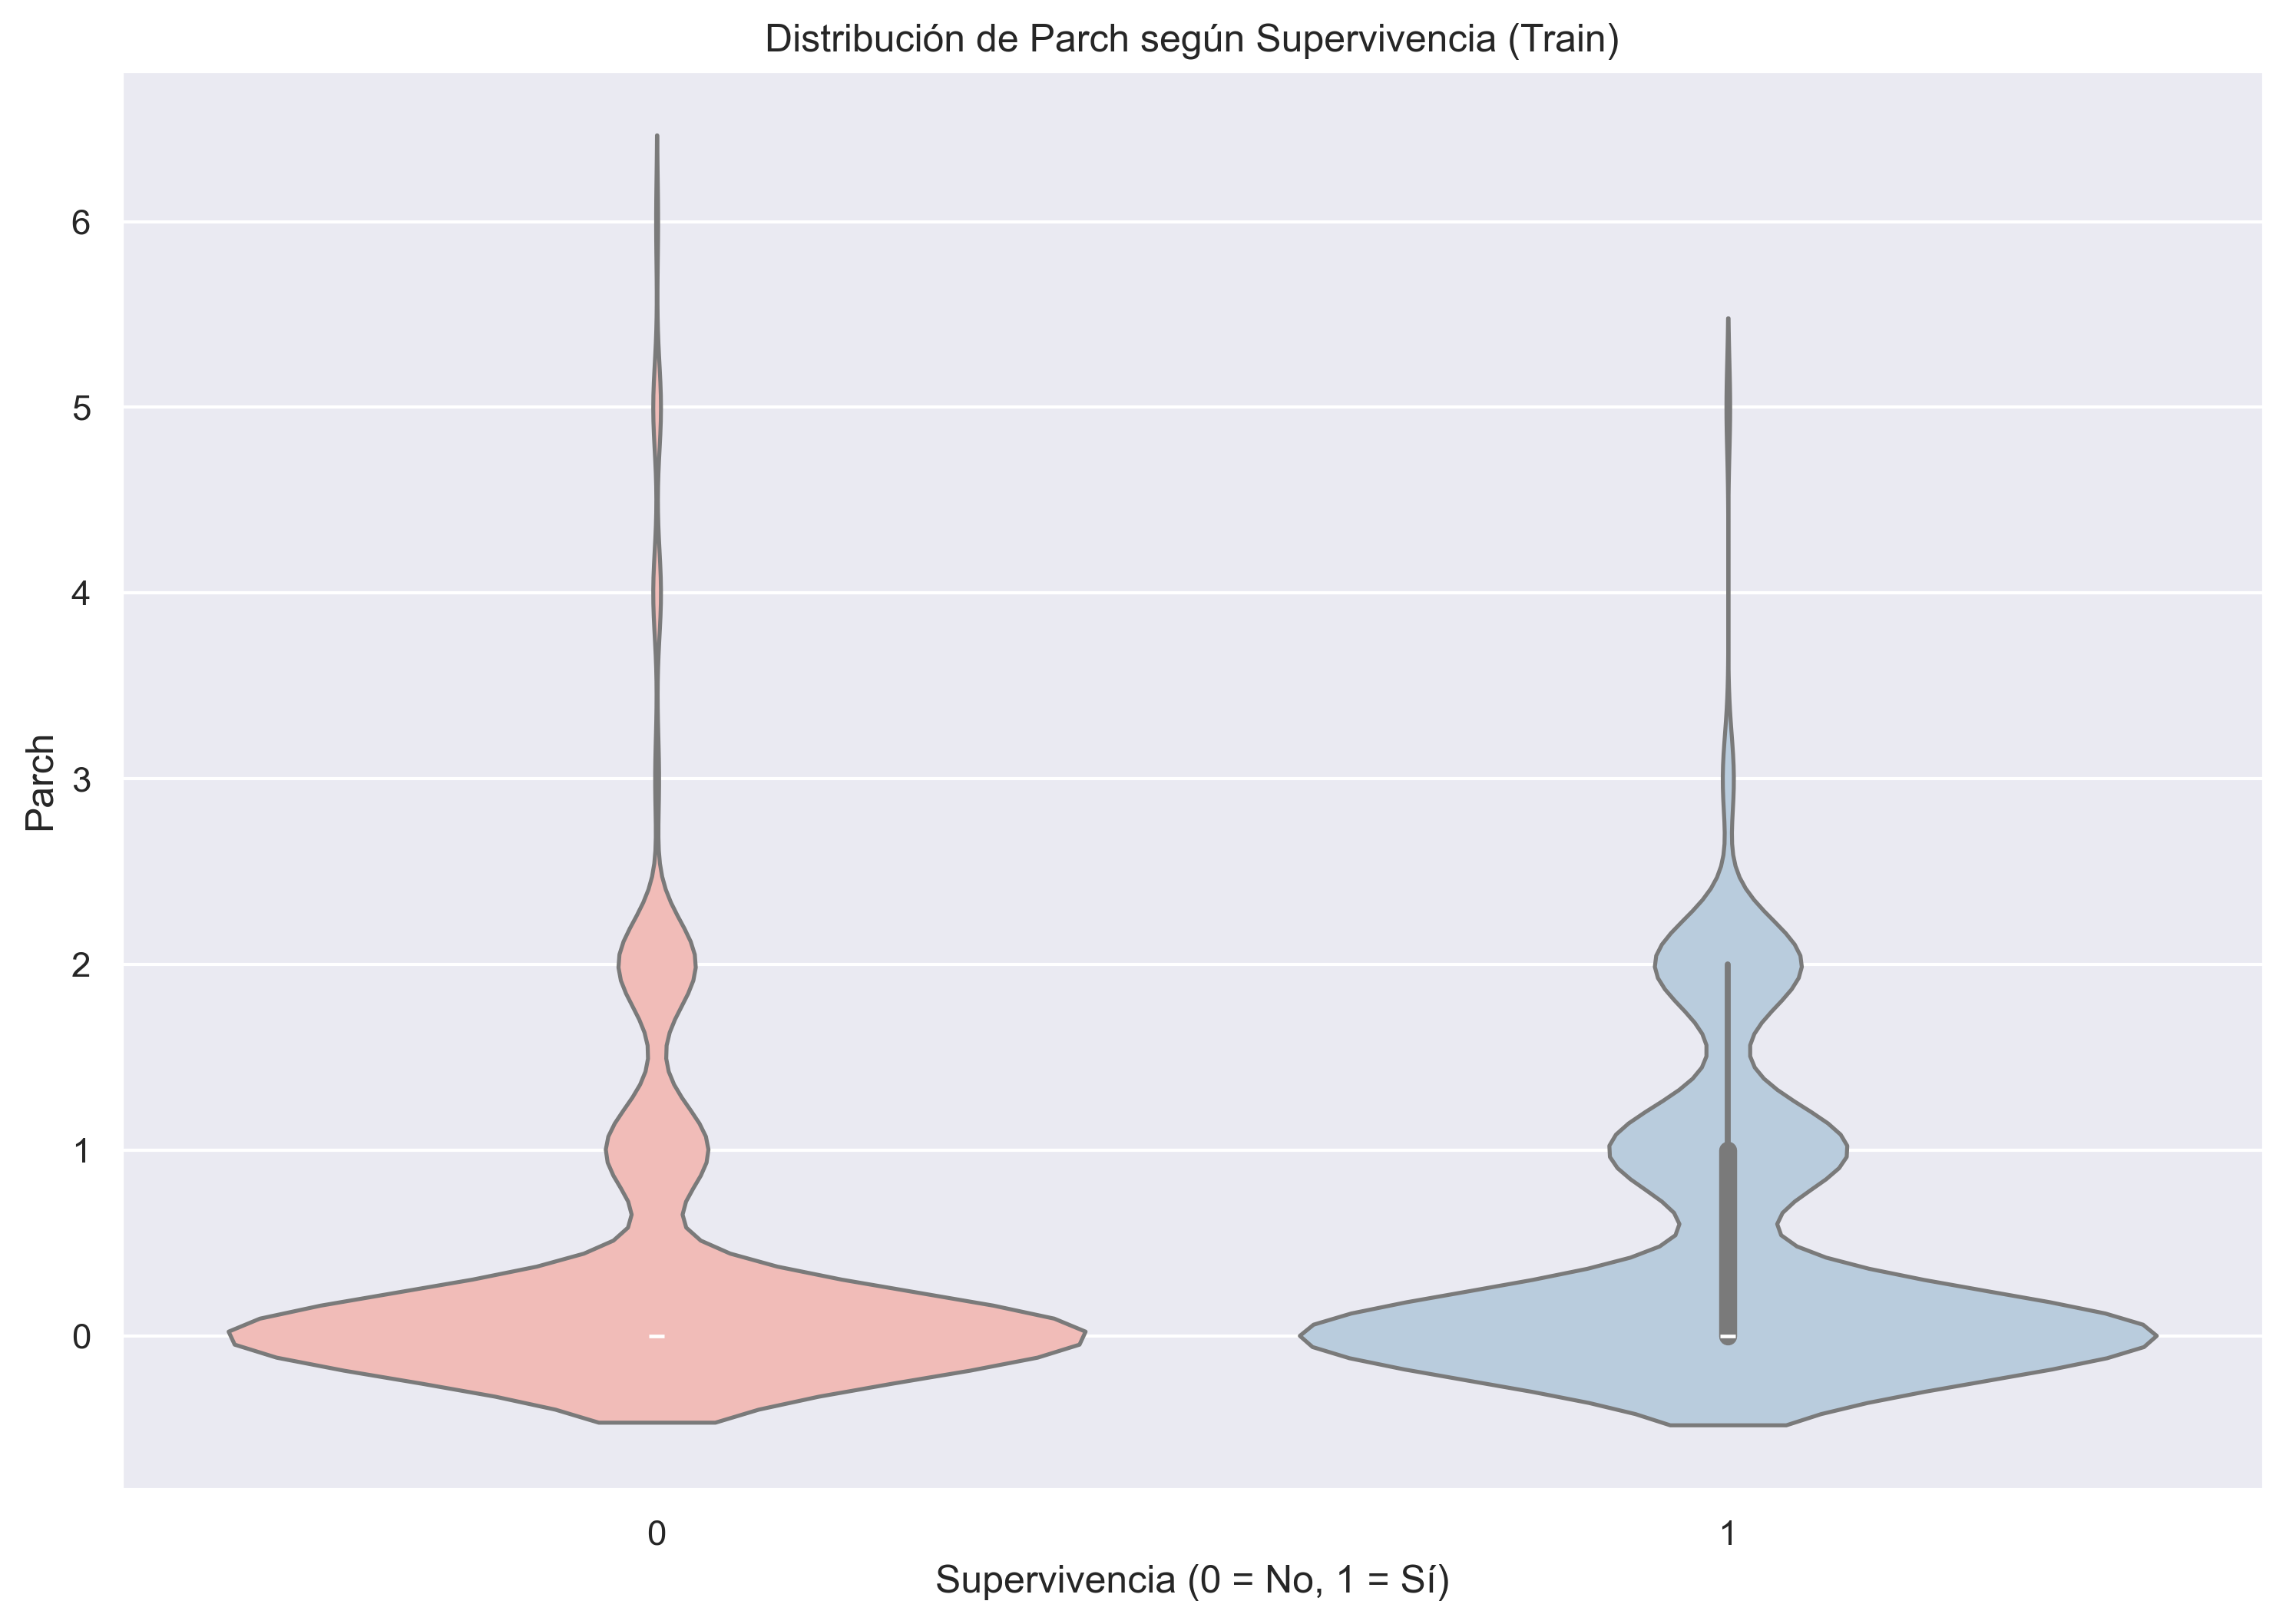

En el conjunto TRAIN, la variable Parch muestra cómo varían los valores entre sobrevivientes y no sobrevivientes. Se aprecia que los patrones de Parch difieren entre ambos grupos, indicando que esta variable influye en la probabilidad de supervivencia.


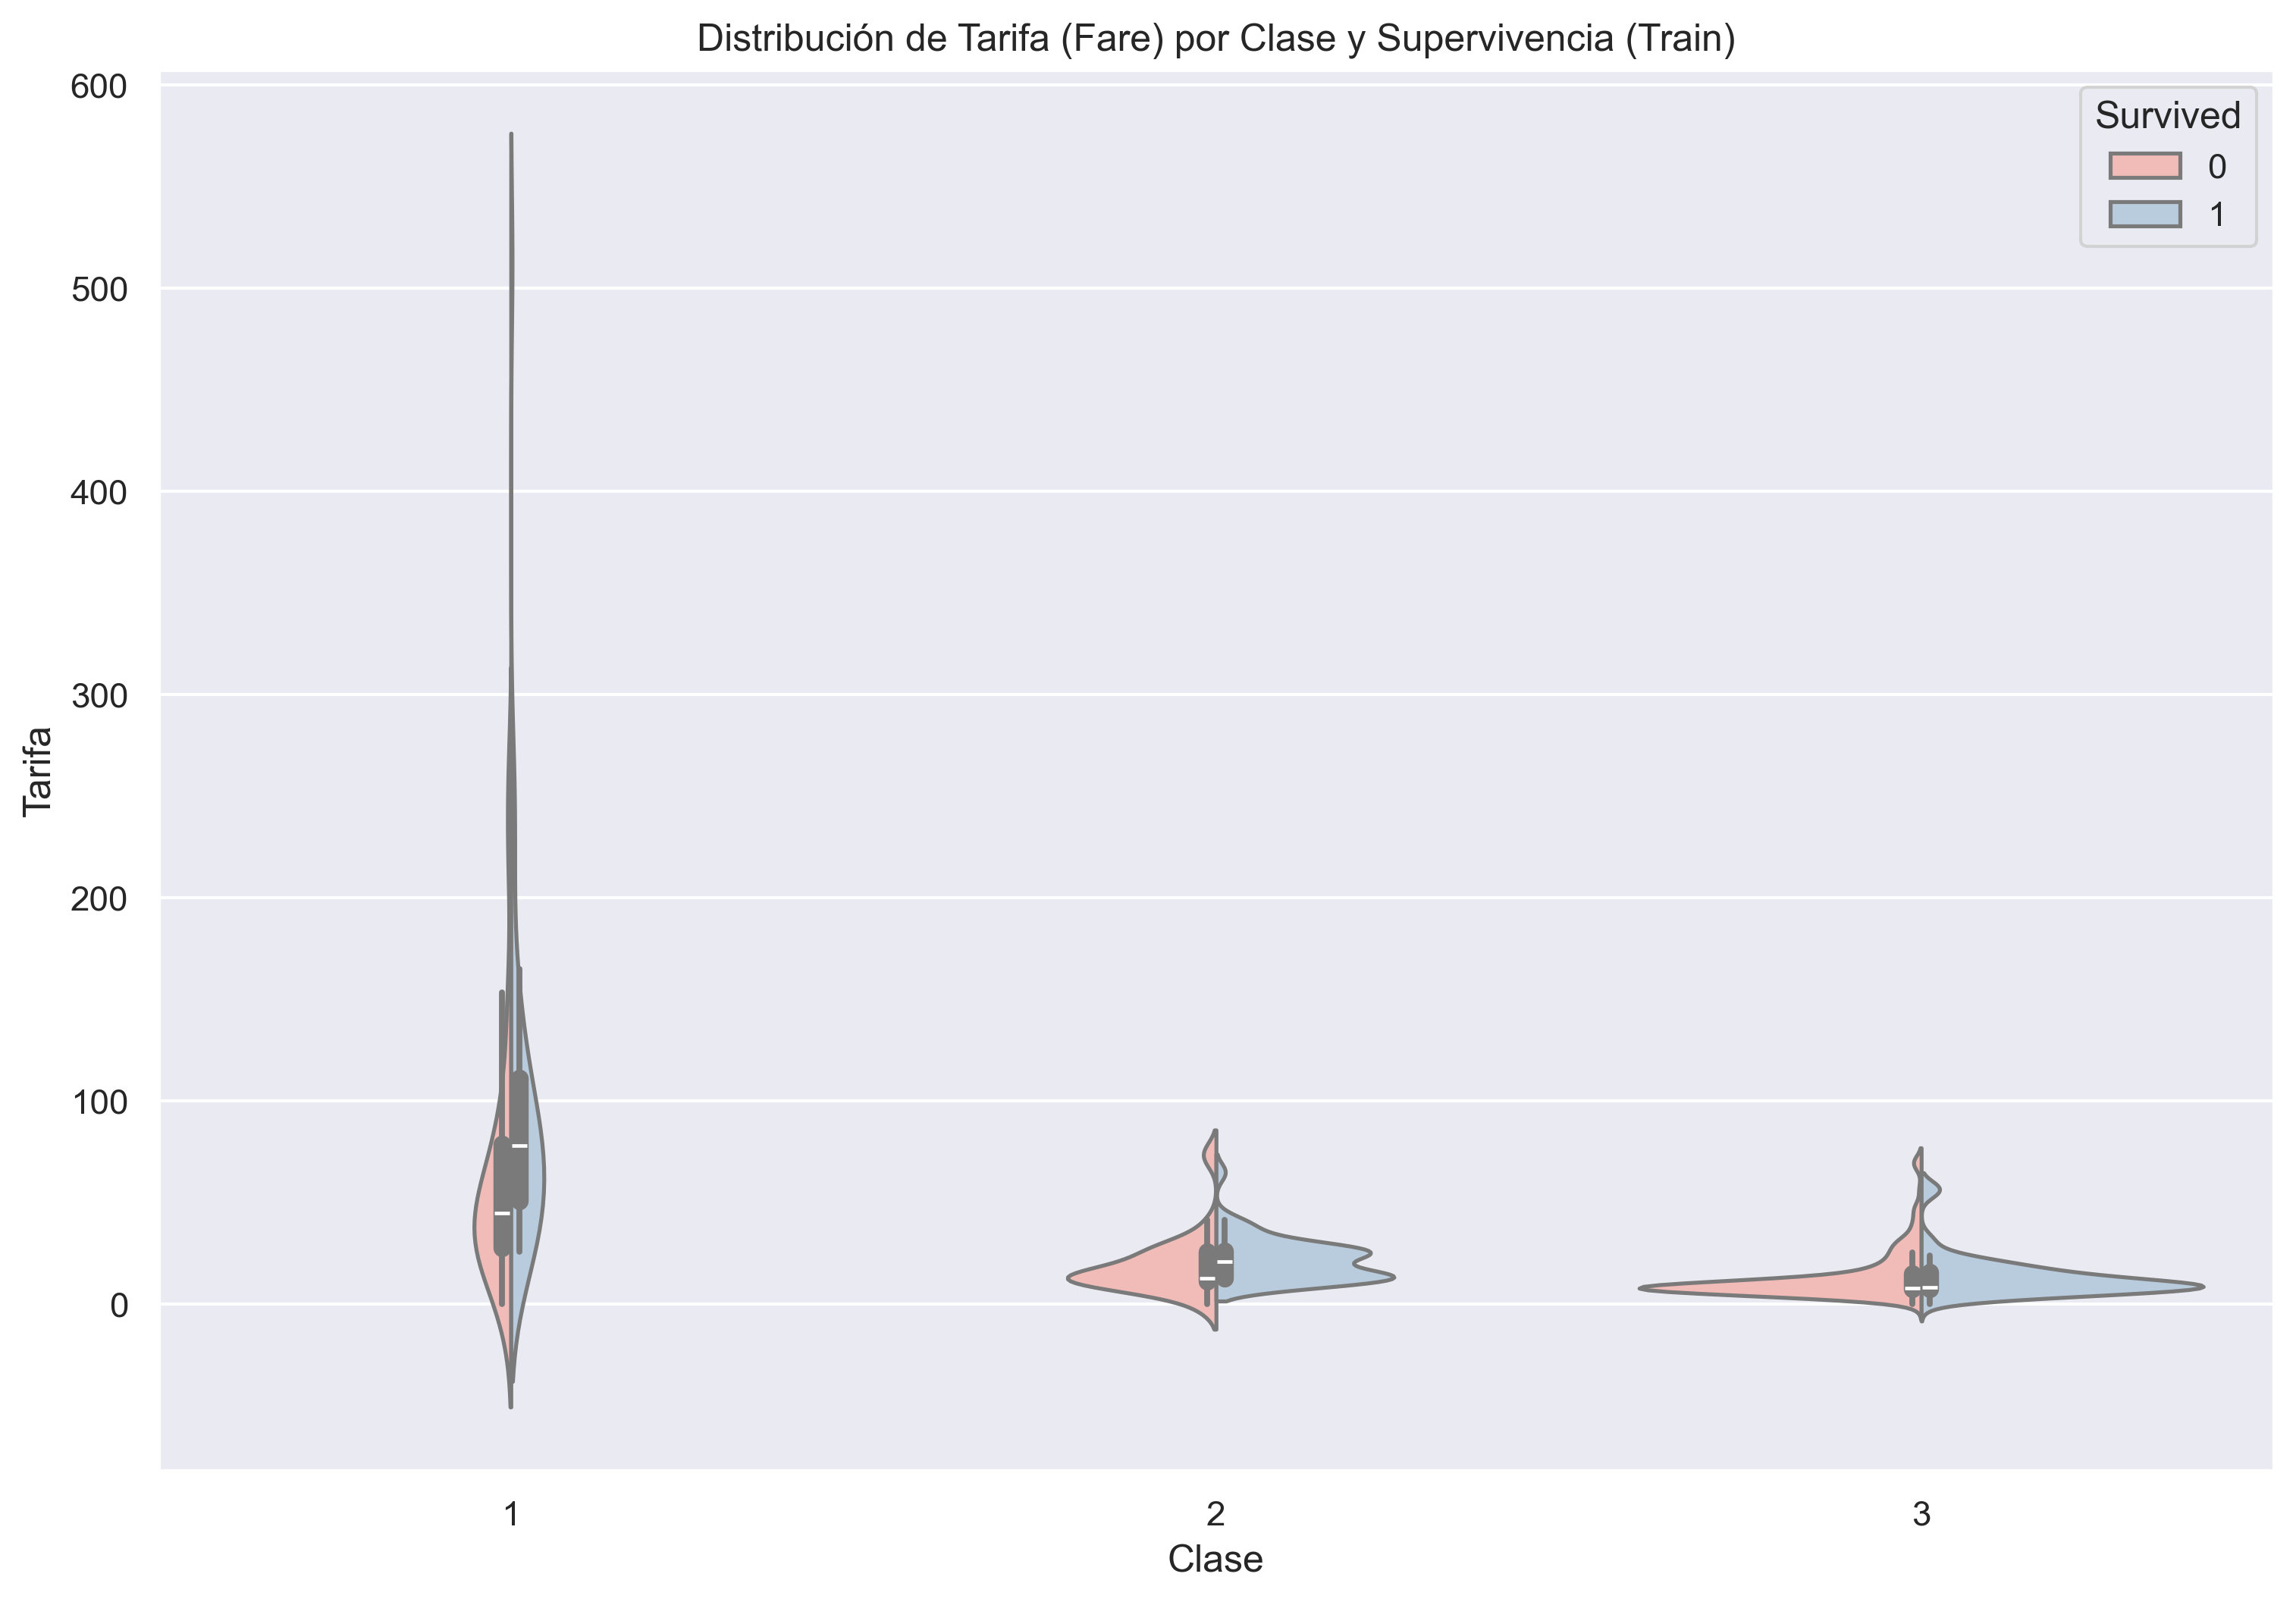

La relación entre la clase del pasajero y la tarifa pagada muestra que las tarifas más altas, propias de la primera clase, se asocian con mayores tasas de supervivencia. En cambio, las clases inferiores reflejan tarifas bajas y menor probabilidad de sobrevivir.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=test_modelo, palette="Pastel1")


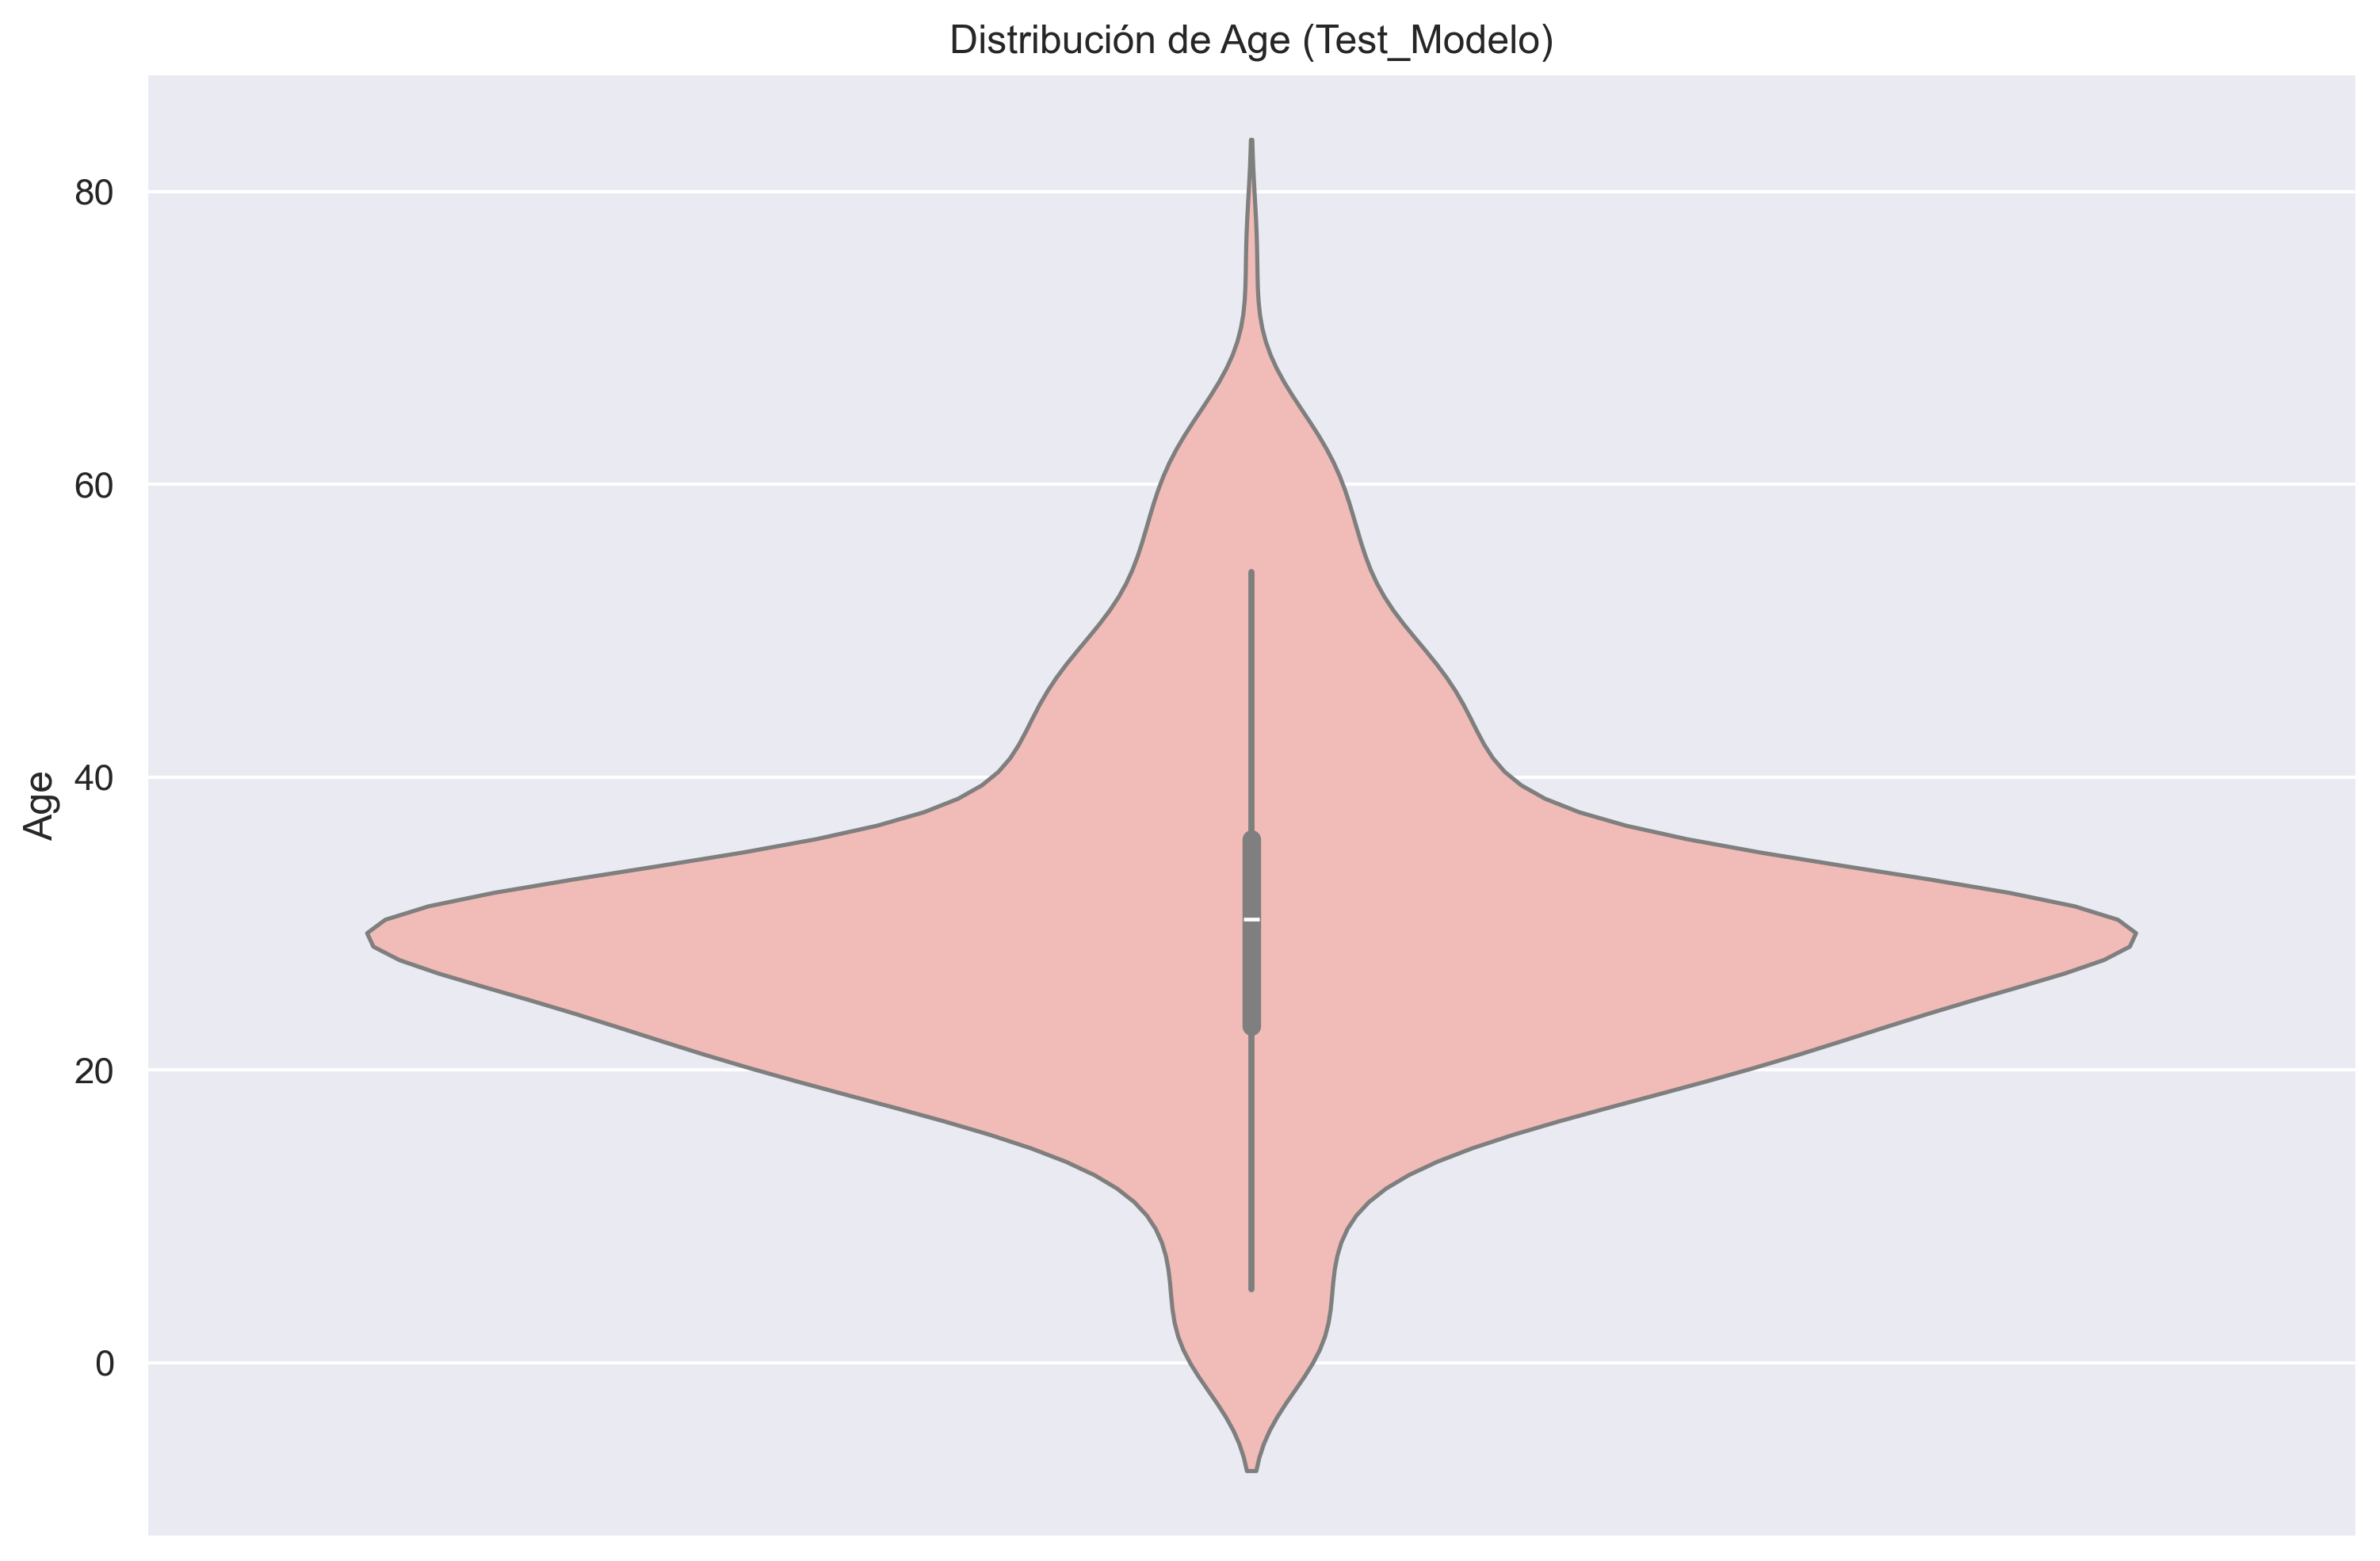

En el conjunto TEST_MODELO, la distribución de Age mantiene una forma similar a la observada en TRAIN, lo que sugiere que los datos de prueba son consistentes con los de entrenamiento.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=test_modelo, palette="Pastel1")


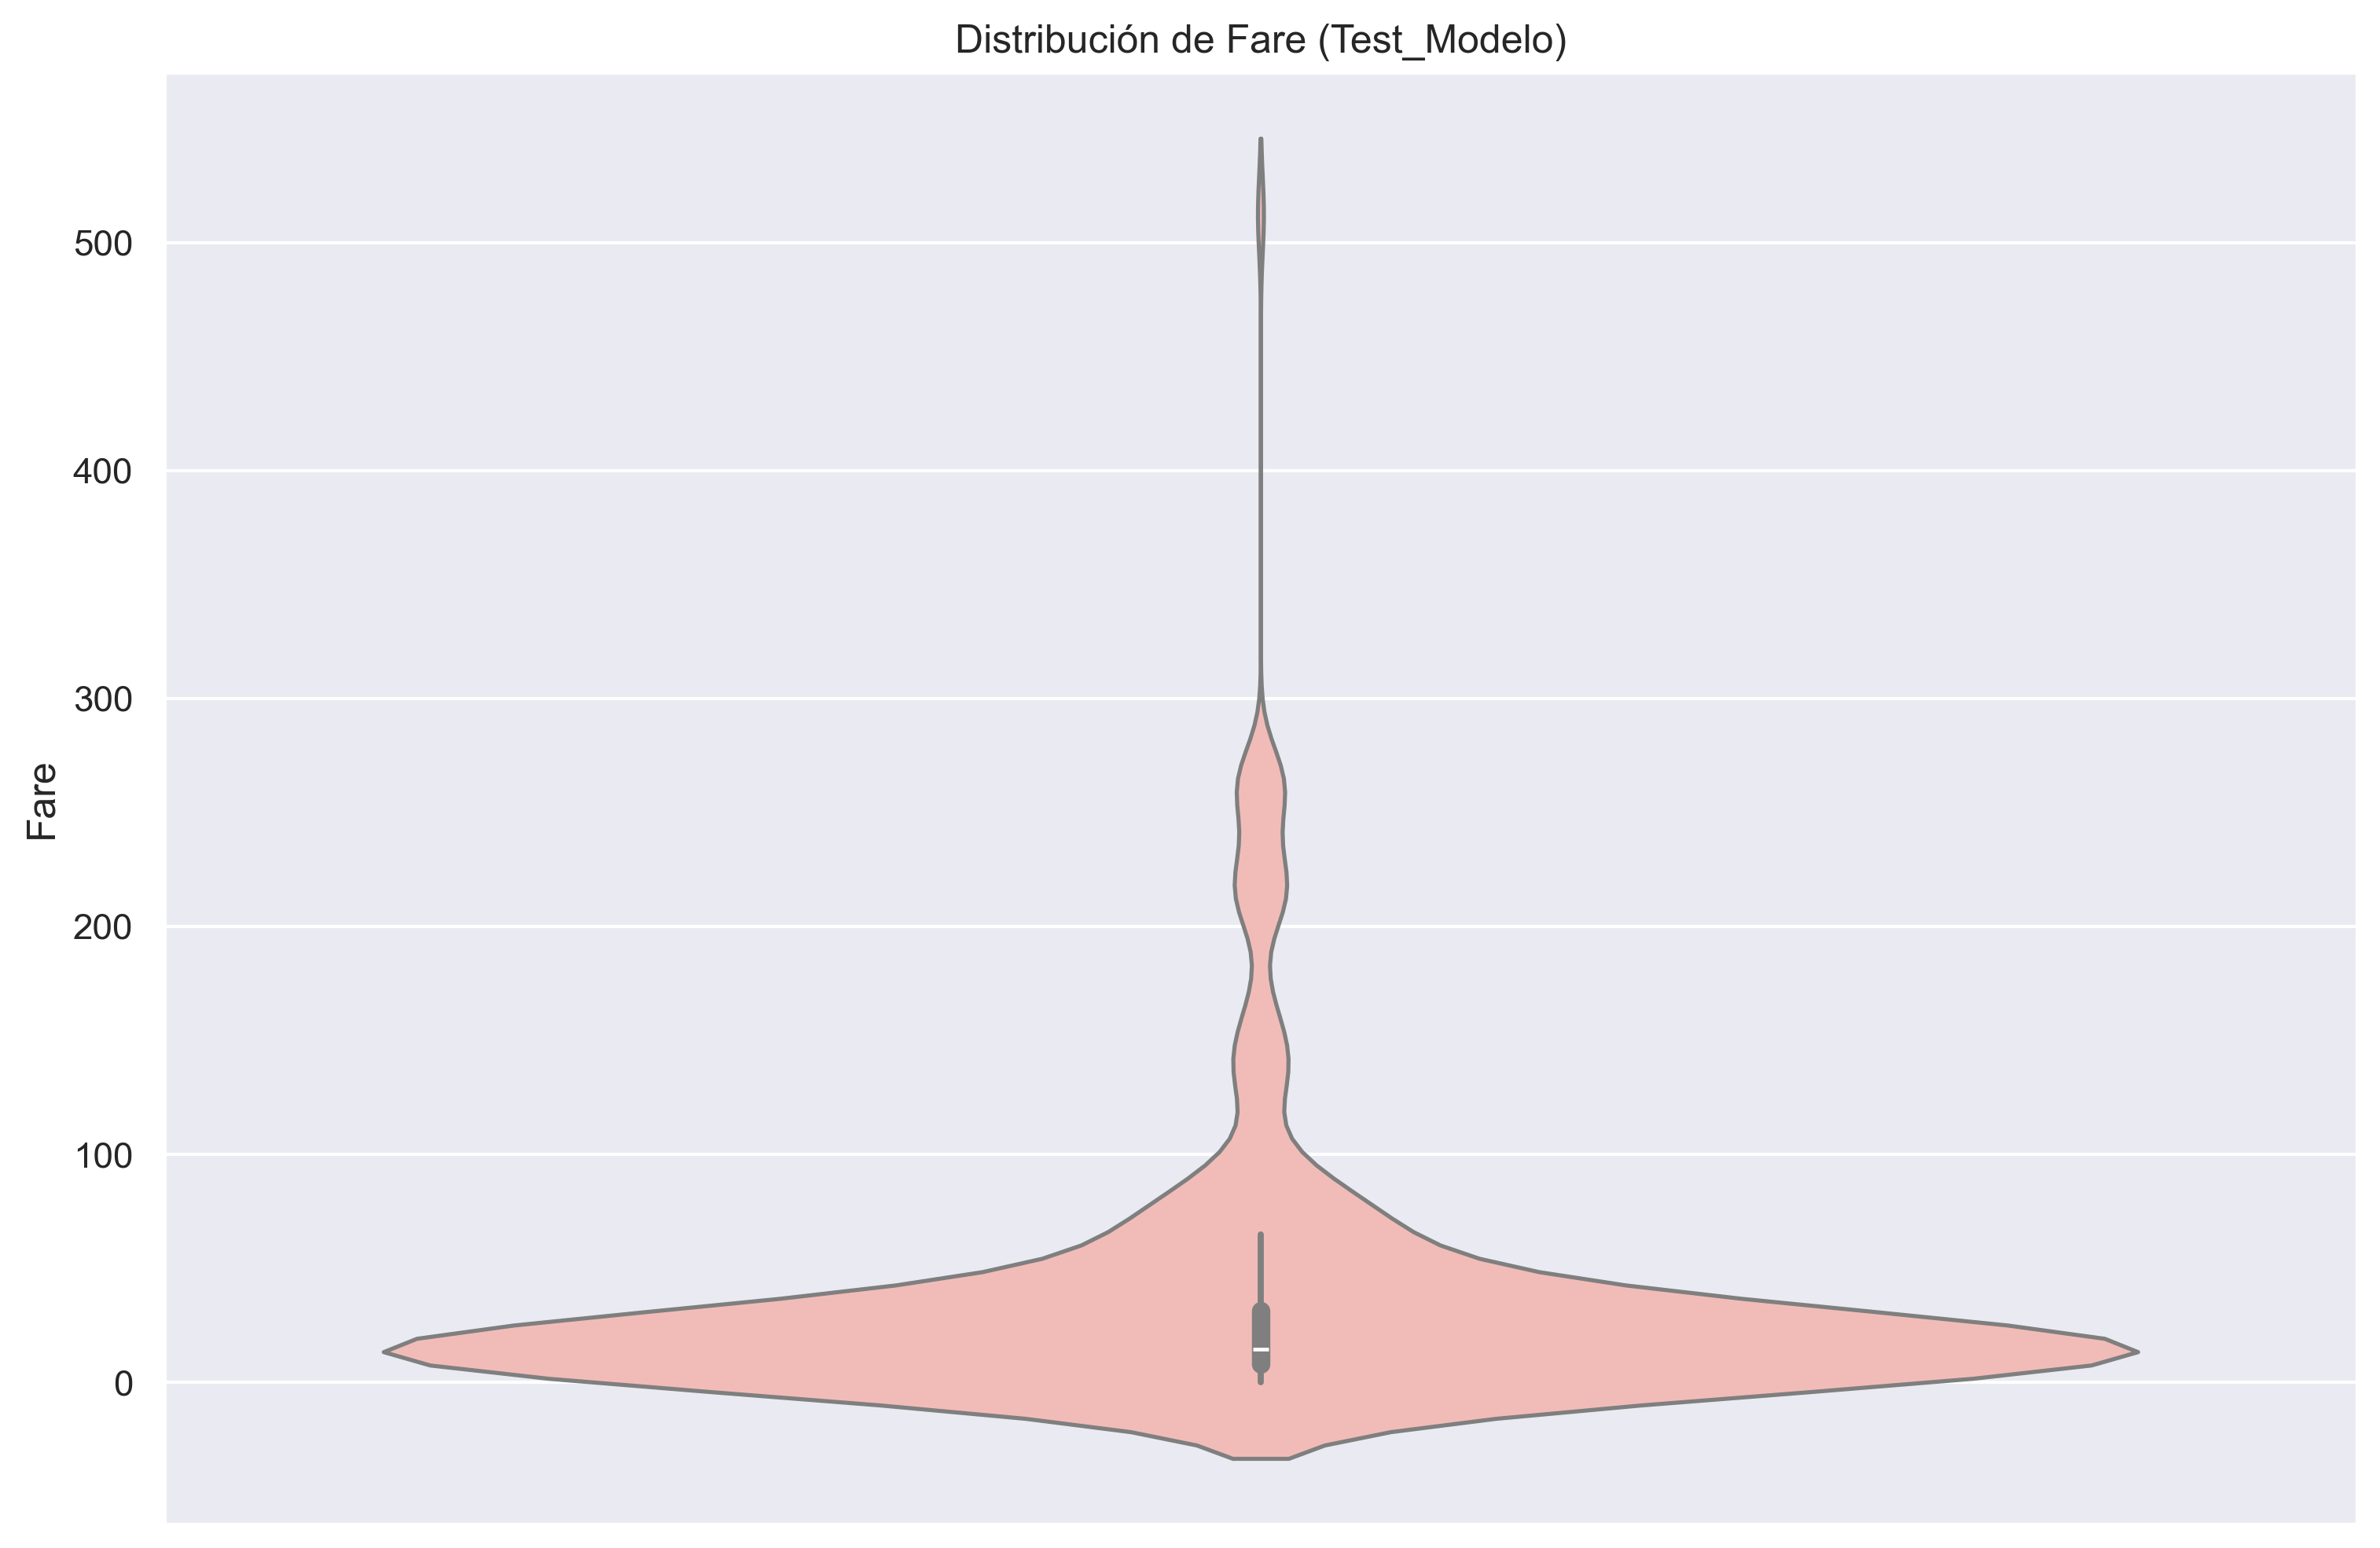

En el conjunto TEST_MODELO, la distribución de Fare mantiene una forma similar a la observada en TRAIN, lo que sugiere que los datos de prueba son consistentes con los de entrenamiento.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=test_modelo, palette="Pastel1")


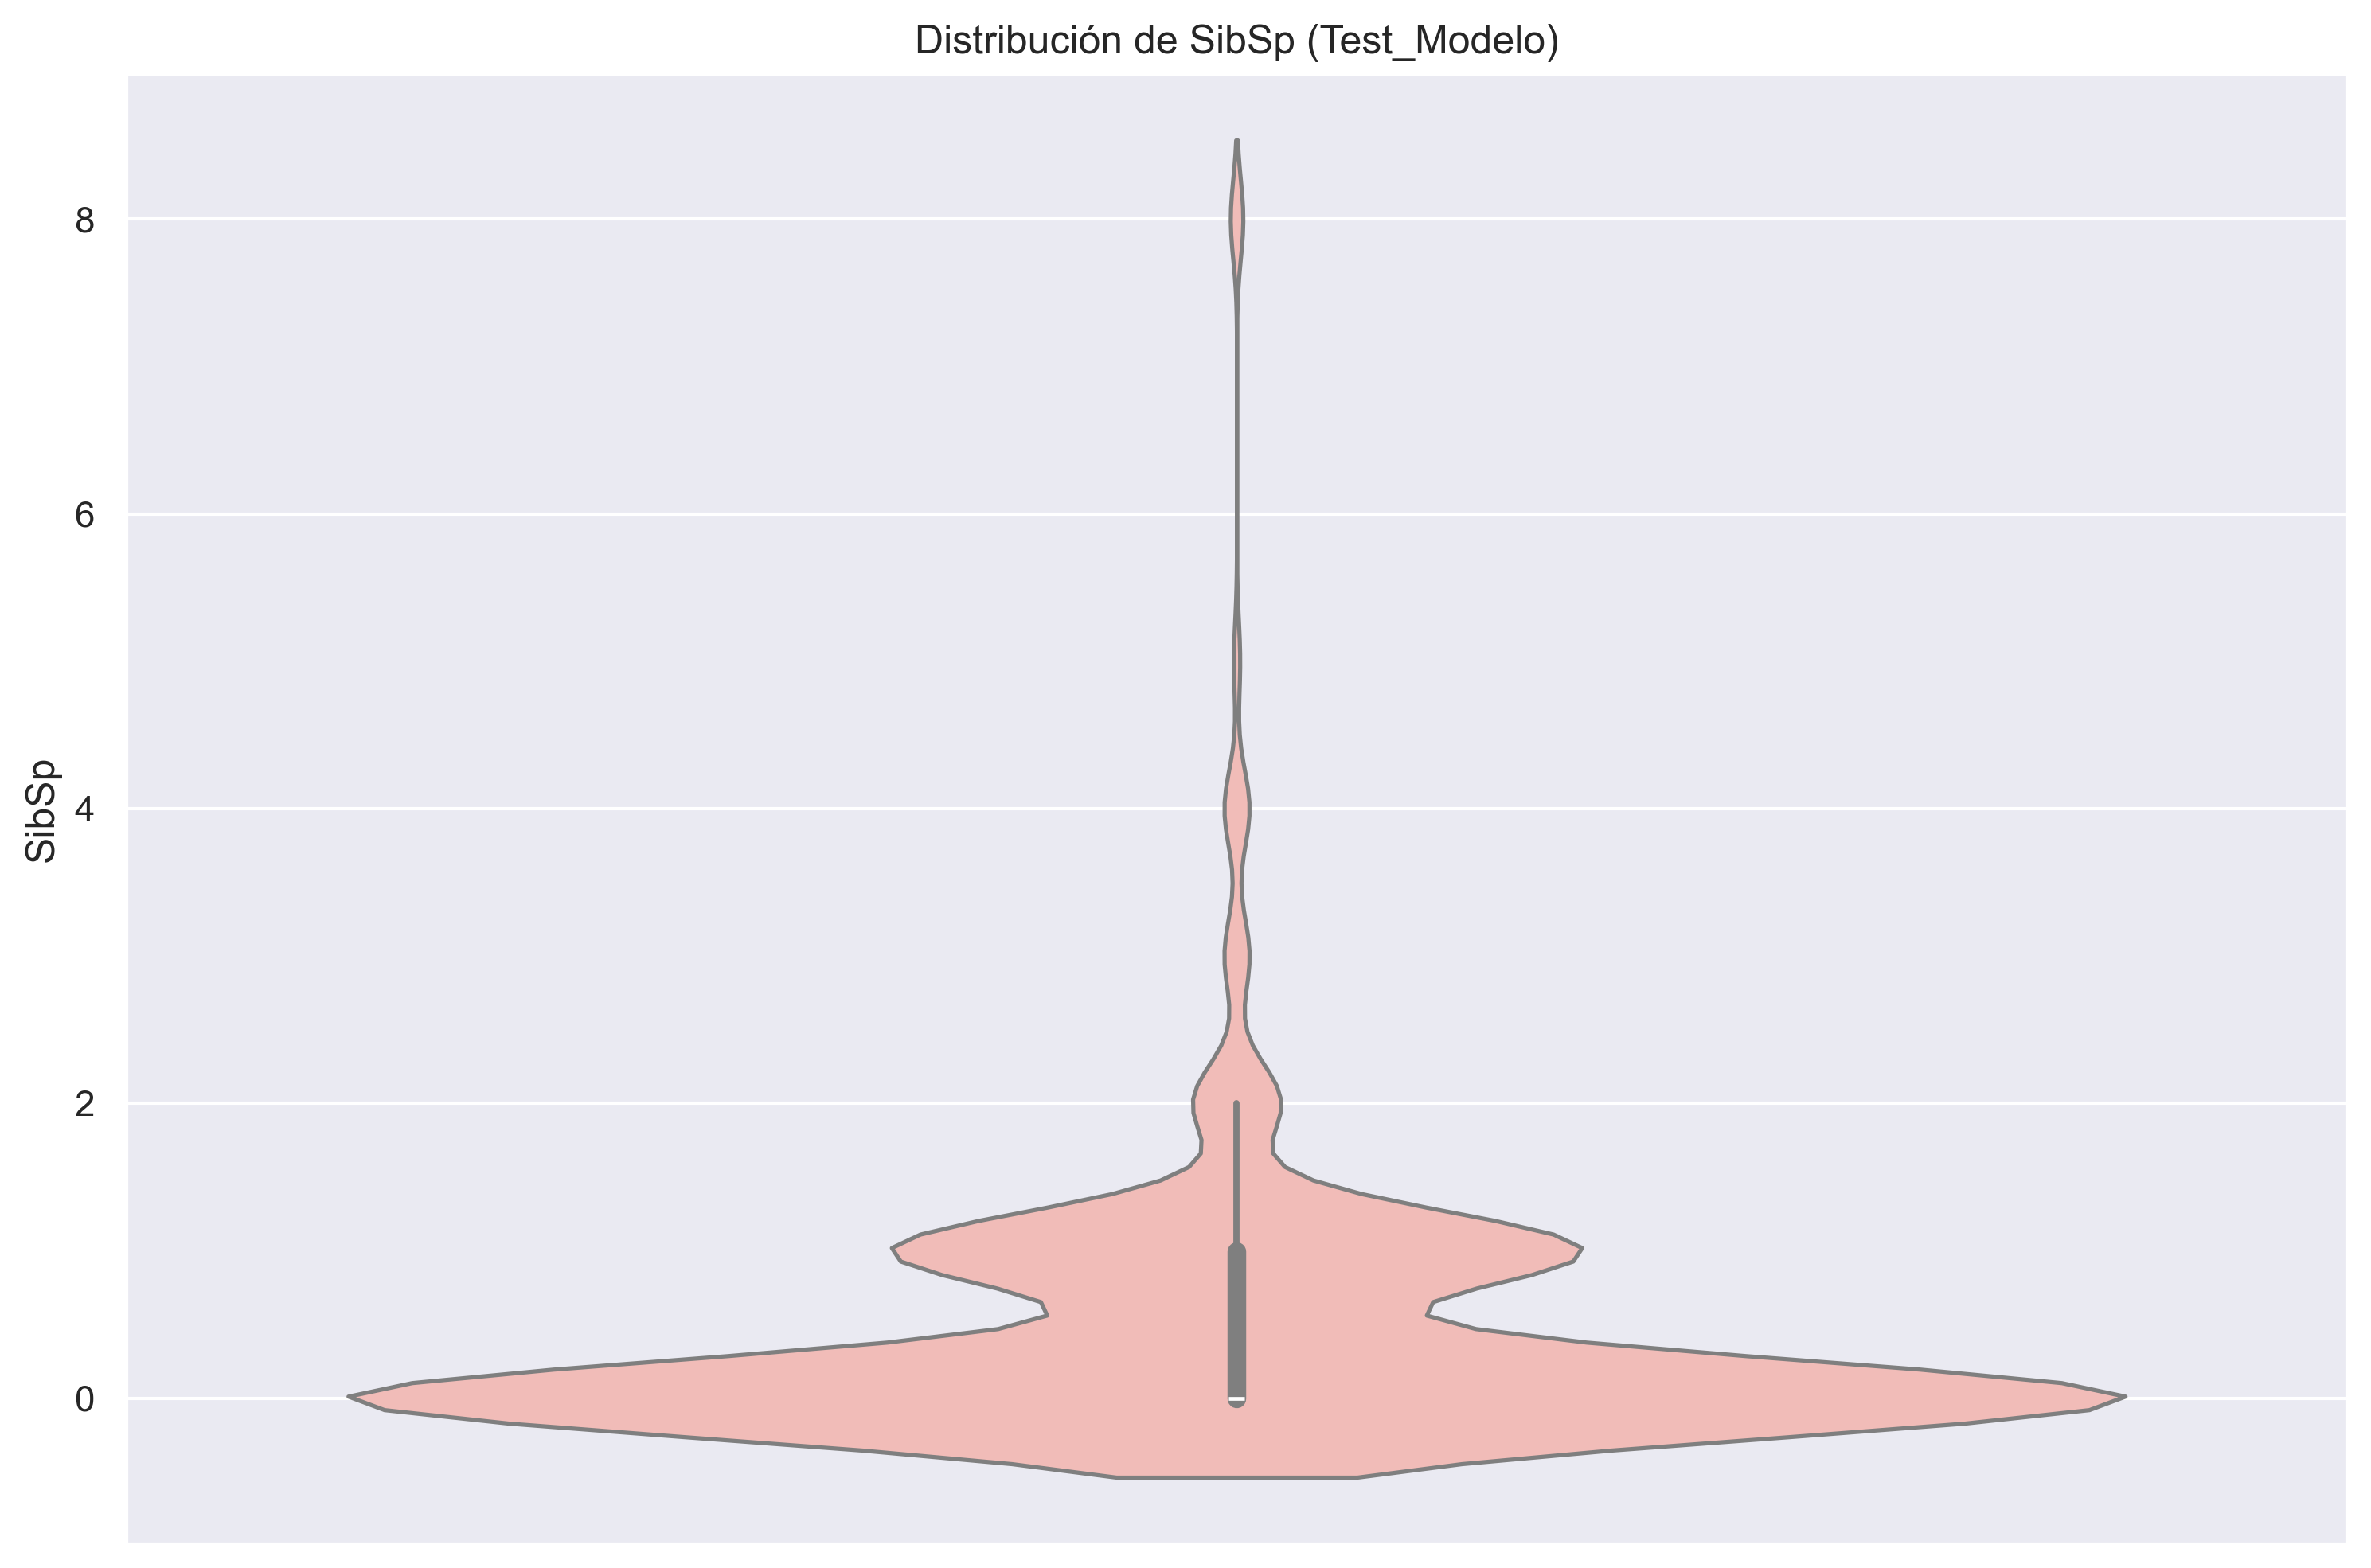

En el conjunto TEST_MODELO, la distribución de SibSp mantiene una forma similar a la observada en TRAIN, lo que sugiere que los datos de prueba son consistentes con los de entrenamiento.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=test_modelo, palette="Pastel1")


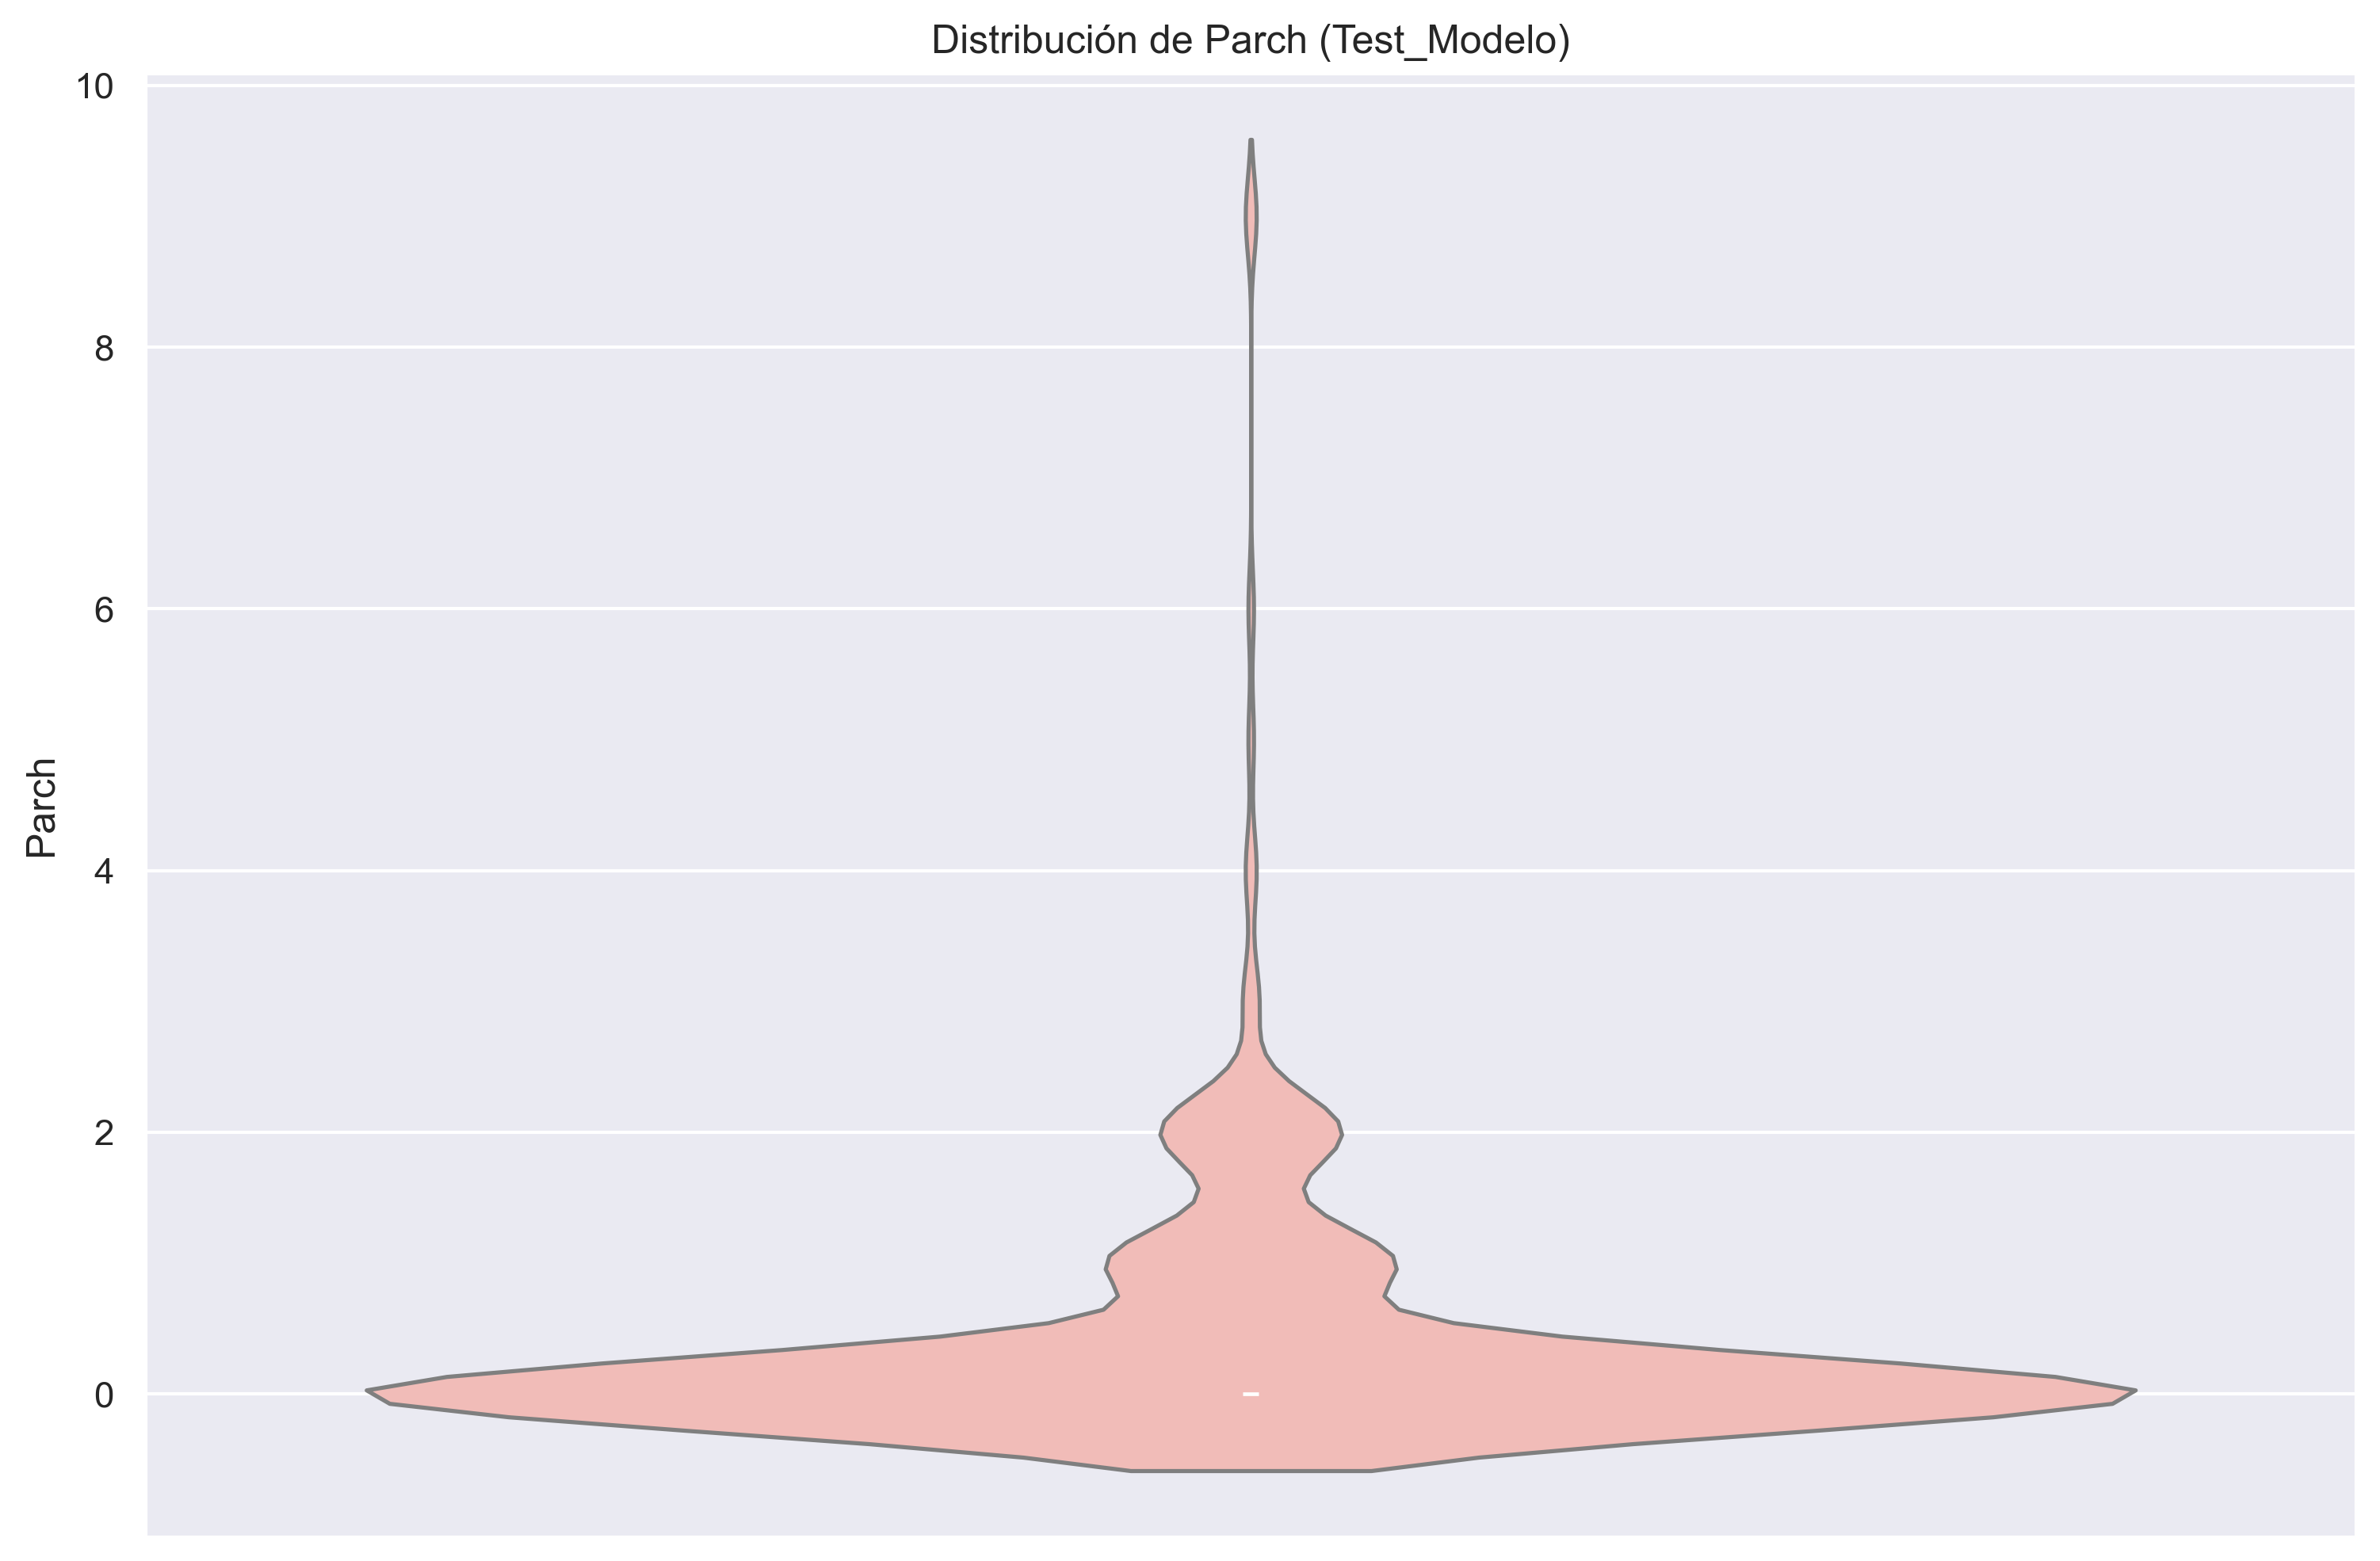

En el conjunto TEST_MODELO, la distribución de Parch mantiene una forma similar a la observada en TRAIN, lo que sugiere que los datos de prueba son consistentes con los de entrenamiento.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")


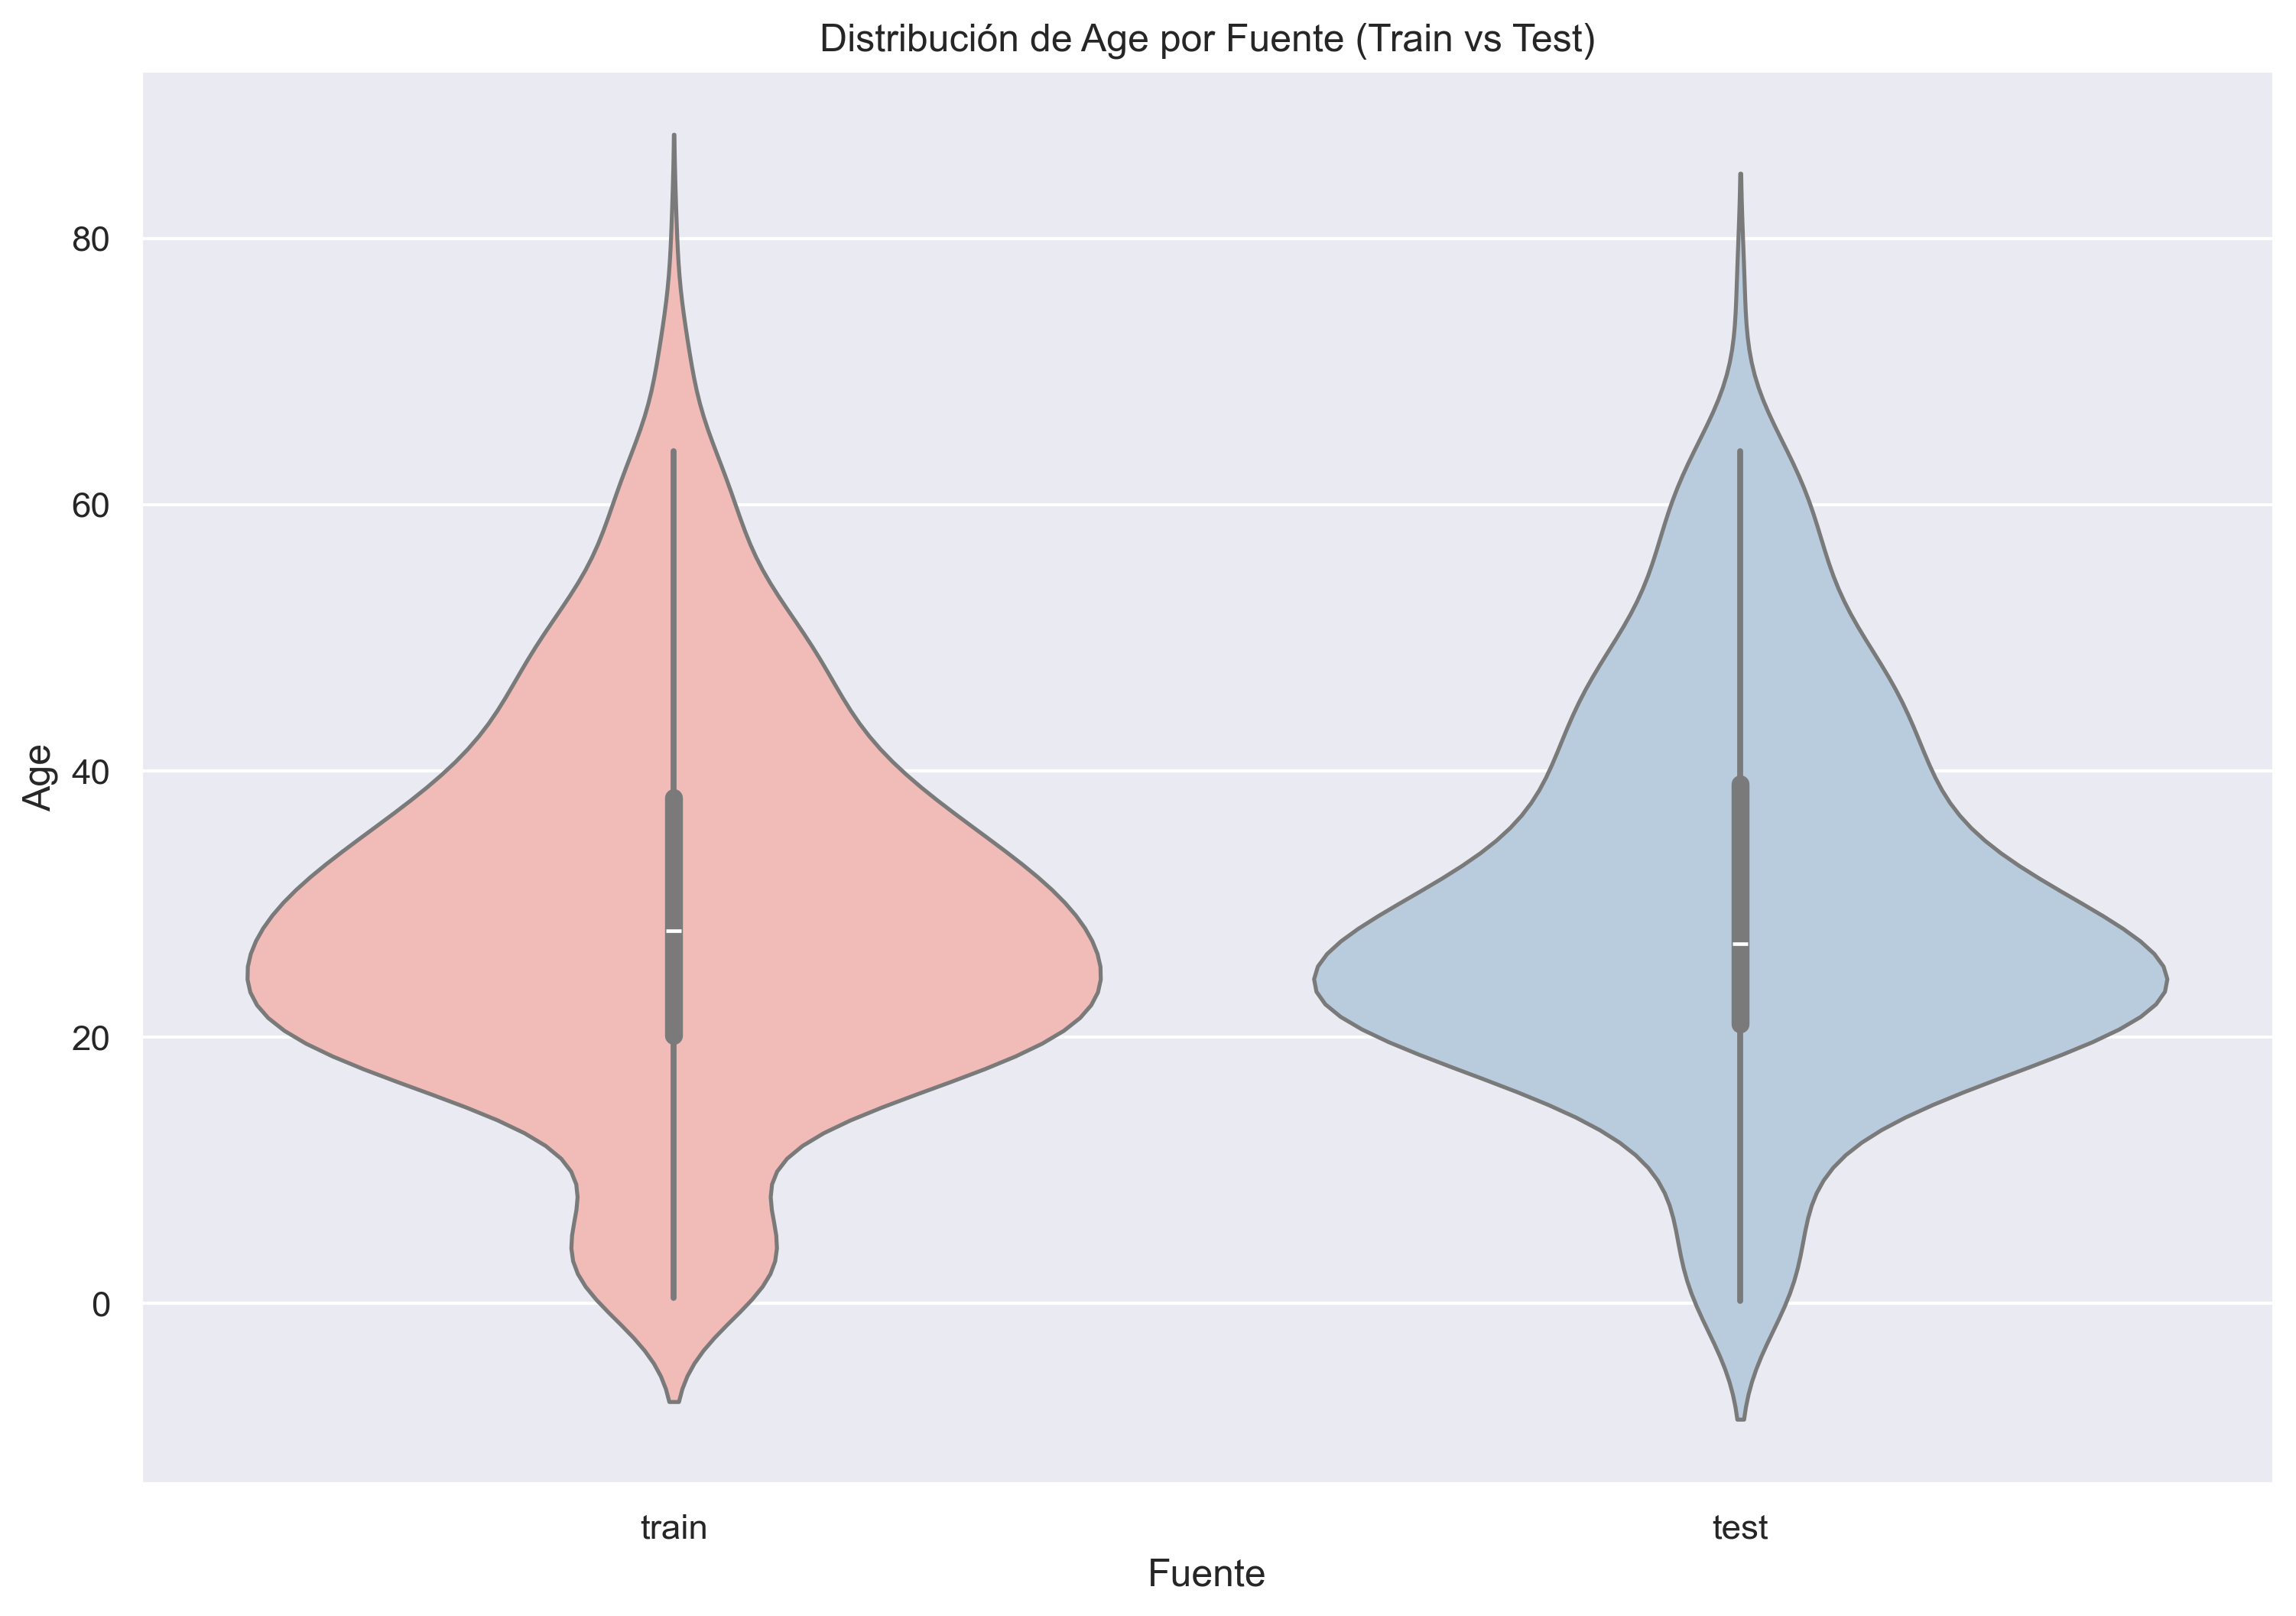

Al comparar TRAIN y TEST para la variable Age, las formas de las distribuciones son muy parecidas, lo cual indica coherencia entre ambos conjuntos de datos.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")


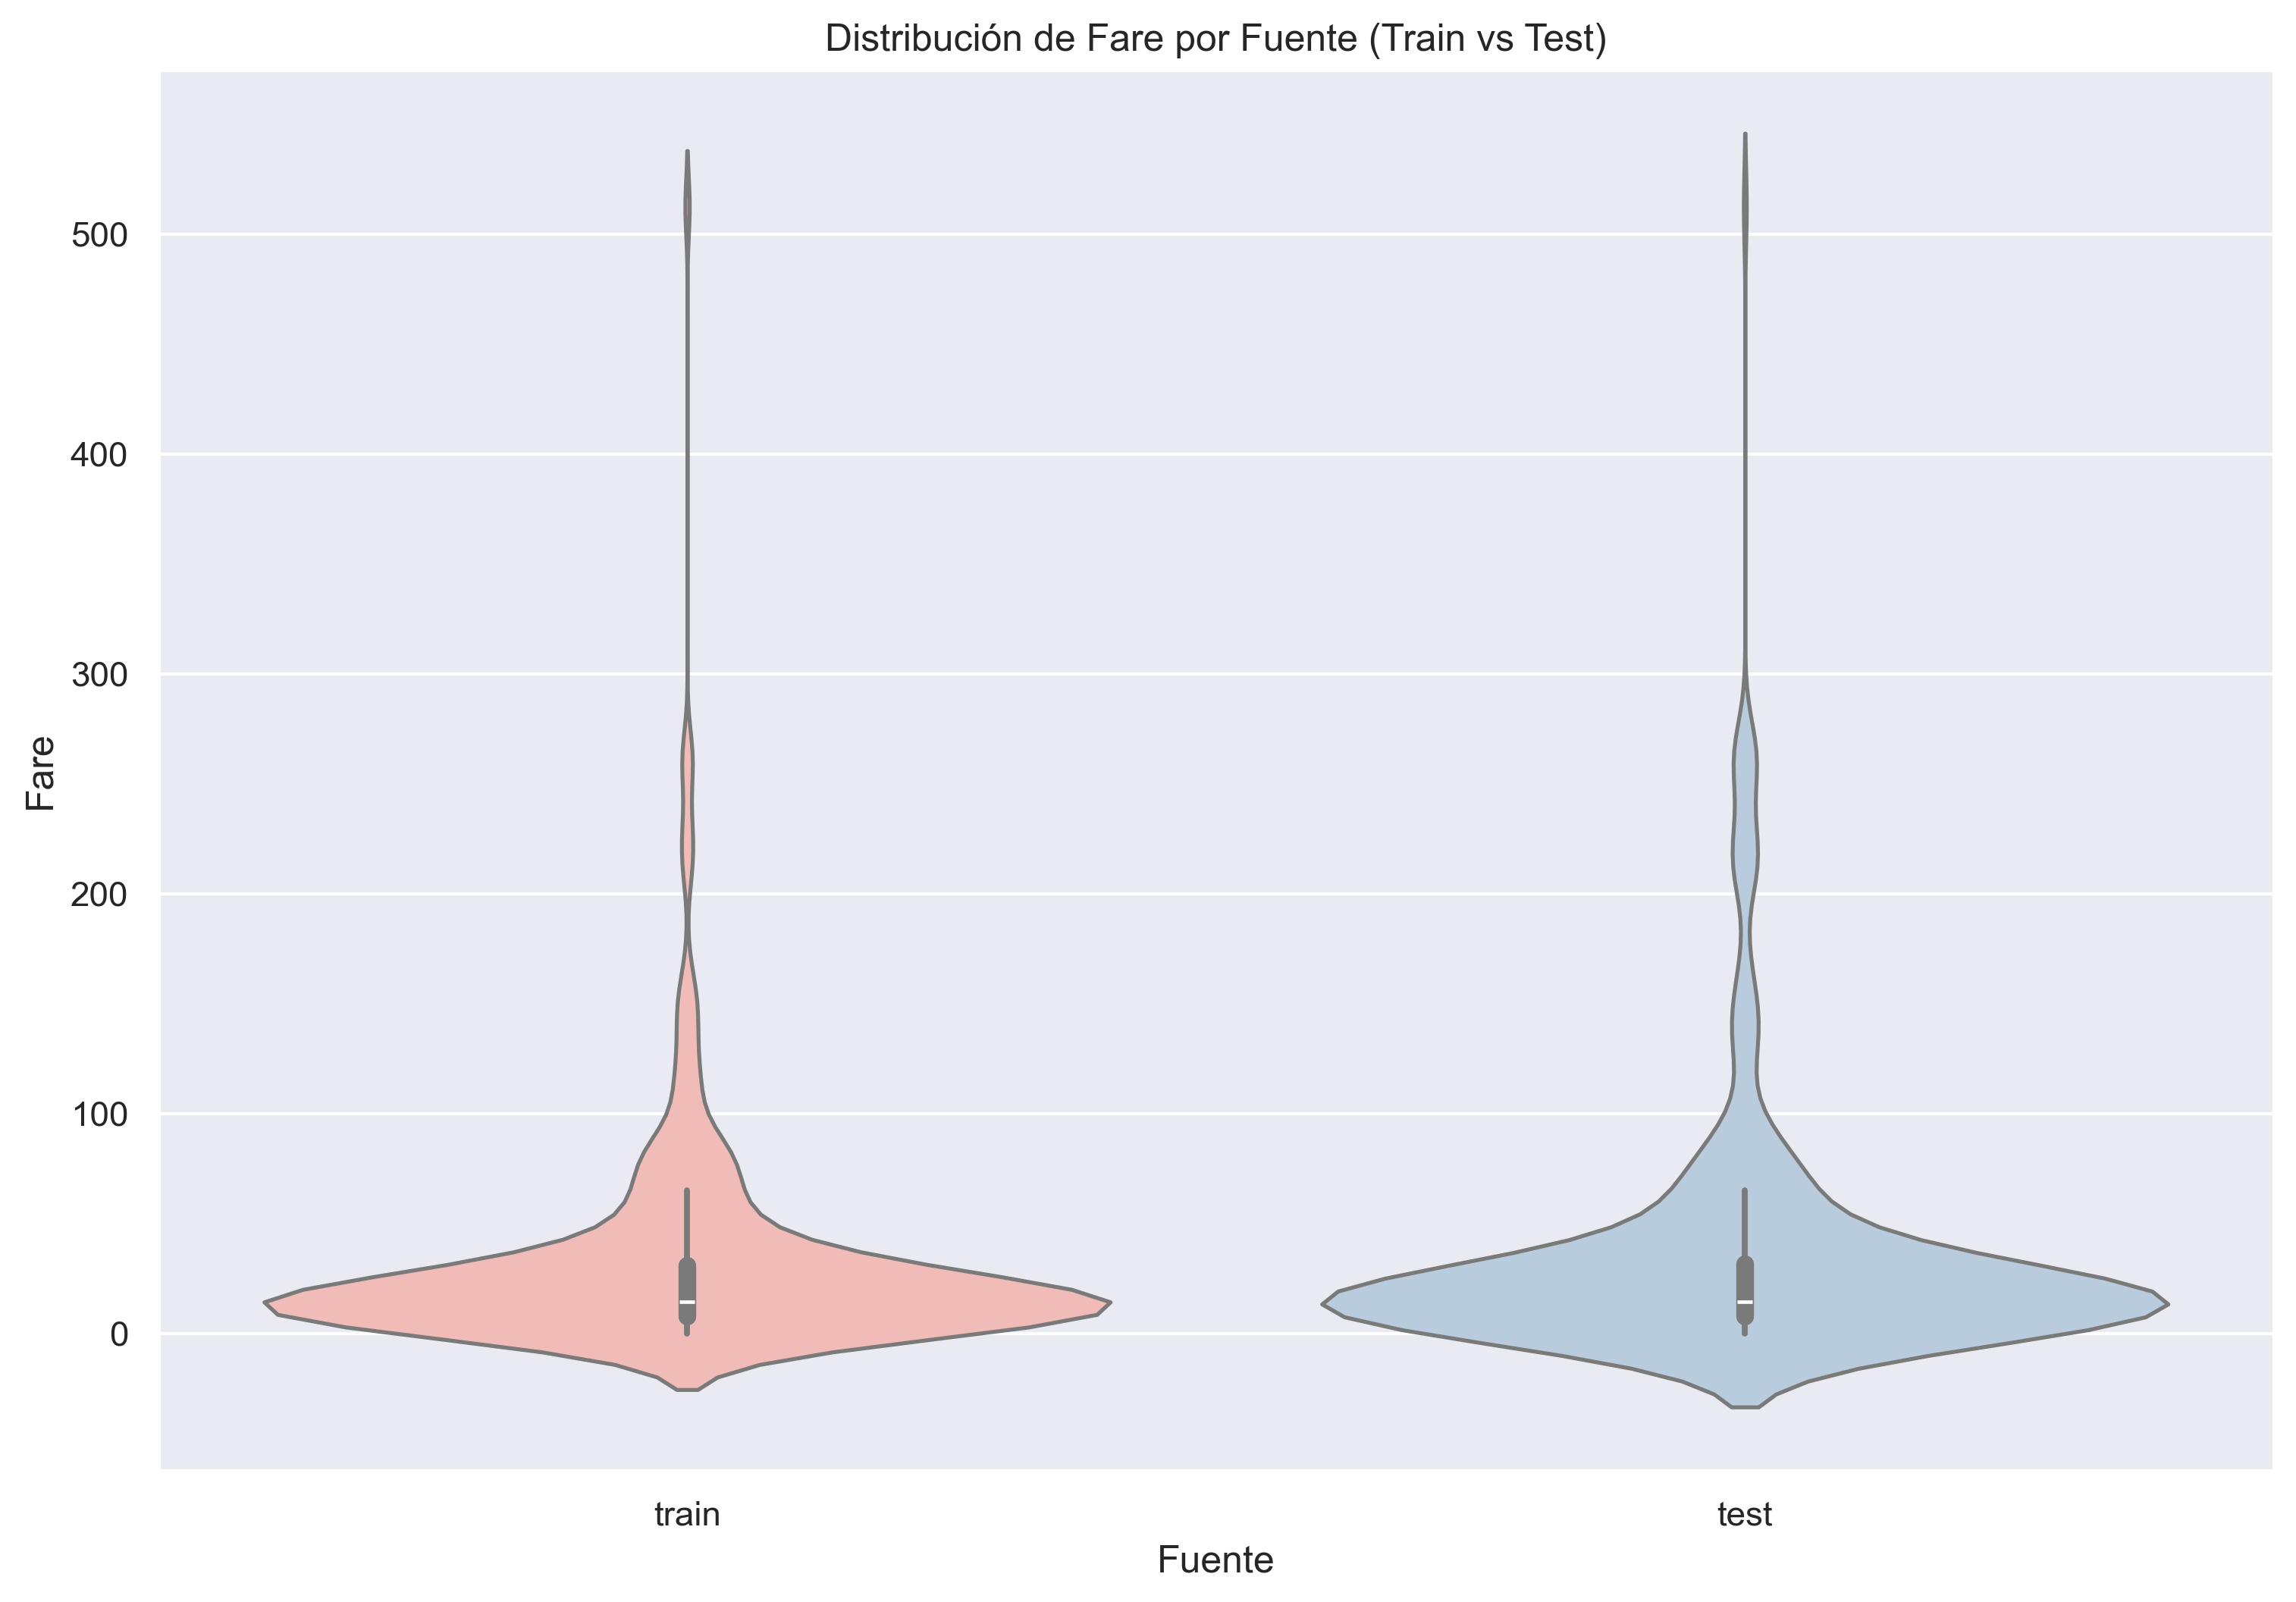

Al comparar TRAIN y TEST para la variable Fare, las formas de las distribuciones son muy parecidas, lo cual indica coherencia entre ambos conjuntos de datos.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")


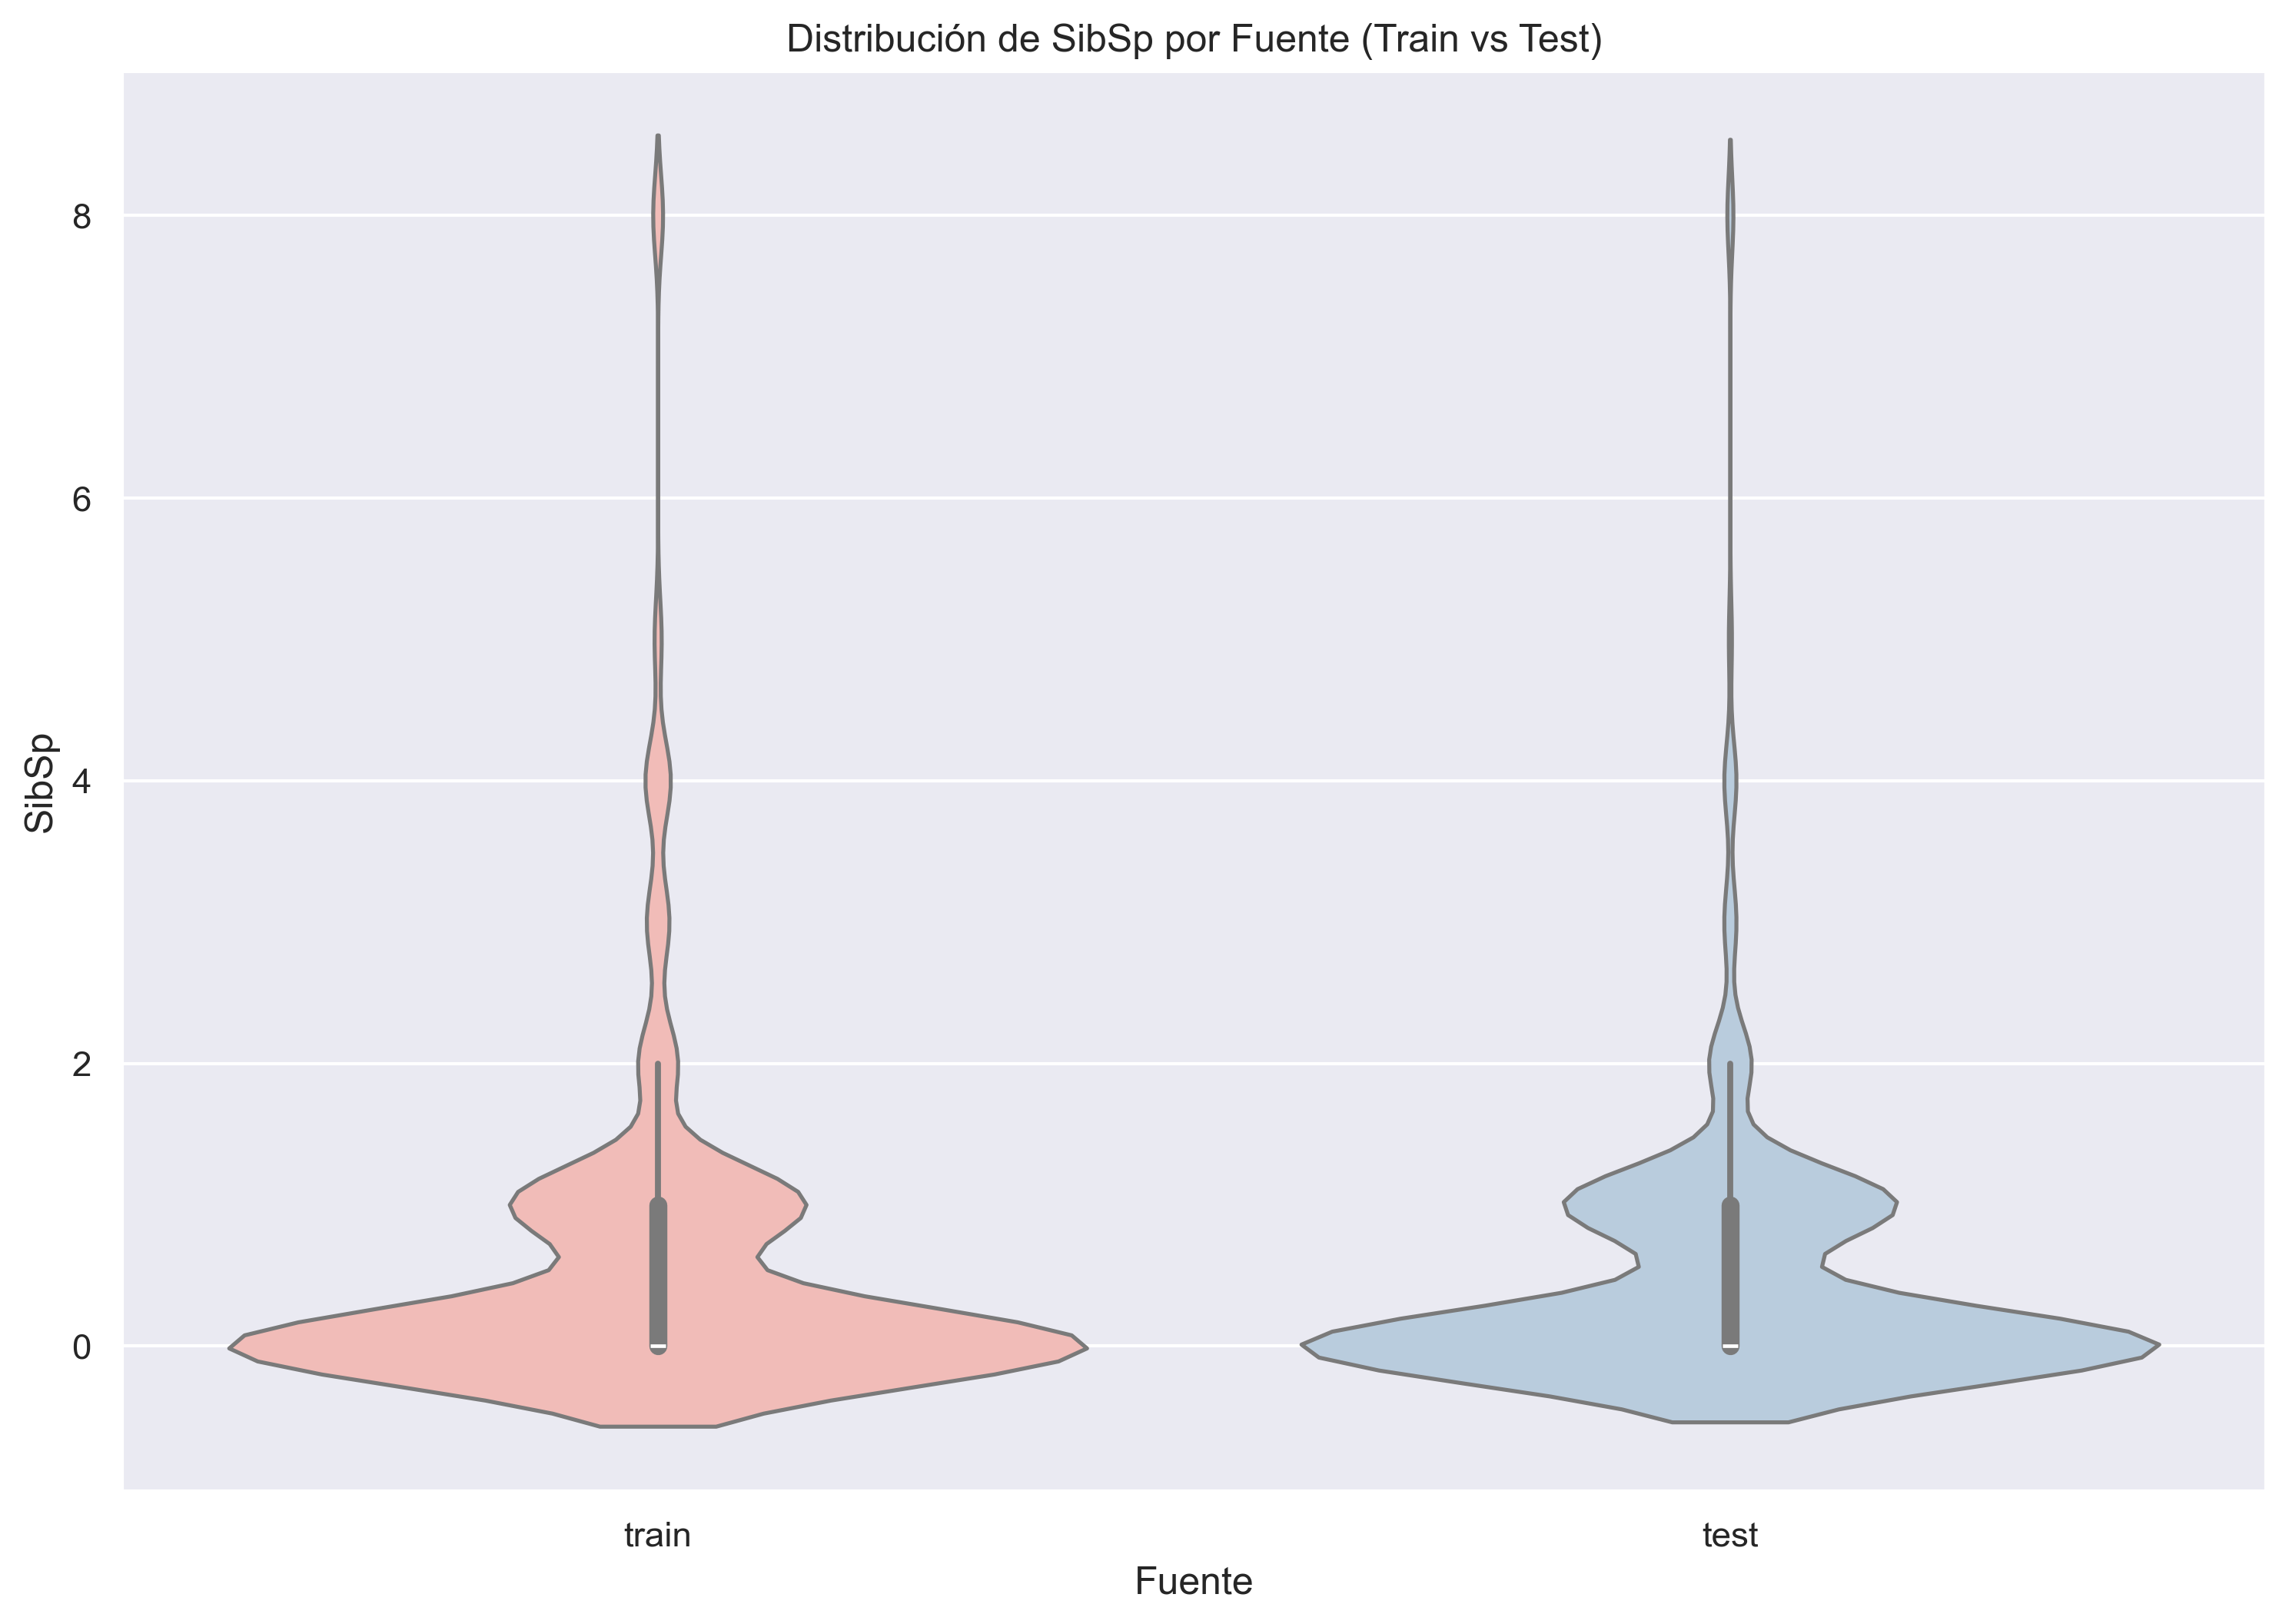

Al comparar TRAIN y TEST para la variable SibSp, las formas de las distribuciones son muy parecidas, lo cual indica coherencia entre ambos conjuntos de datos.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3763630908.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")


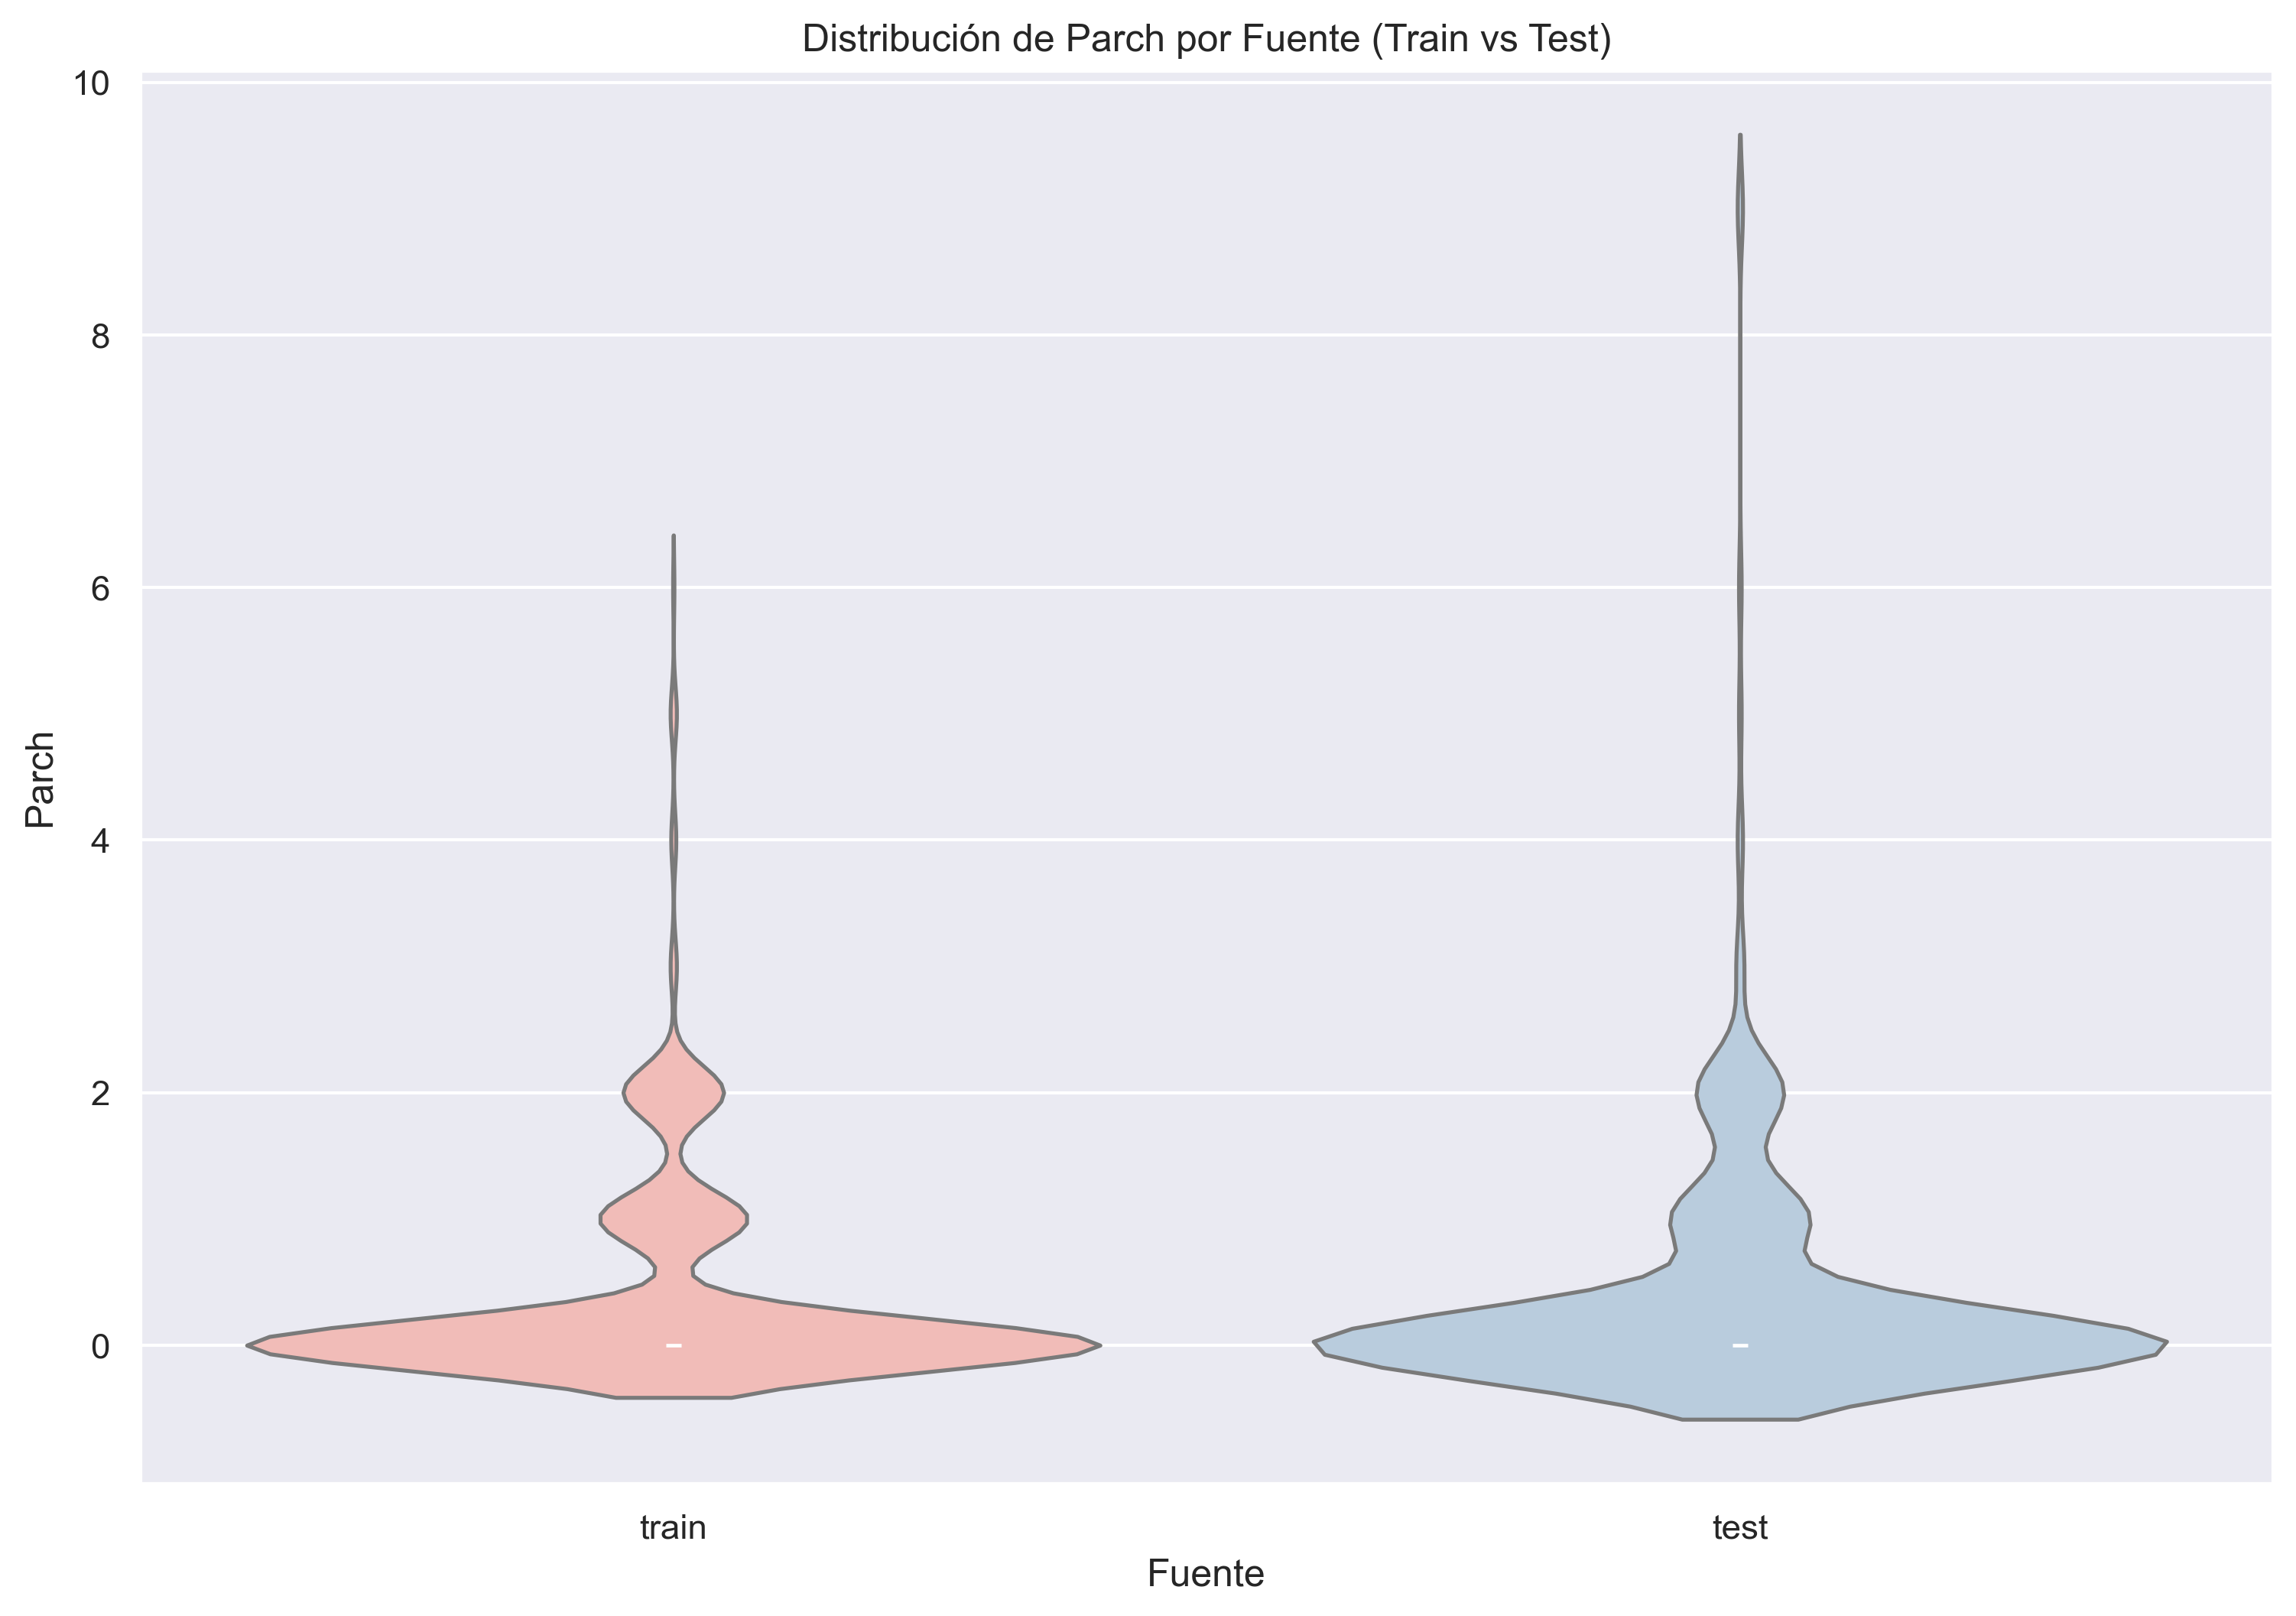

Al comparar TRAIN y TEST para la variable Parch, las formas de las distribuciones son muy parecidas, lo cual indica coherencia entre ambos conjuntos de datos.


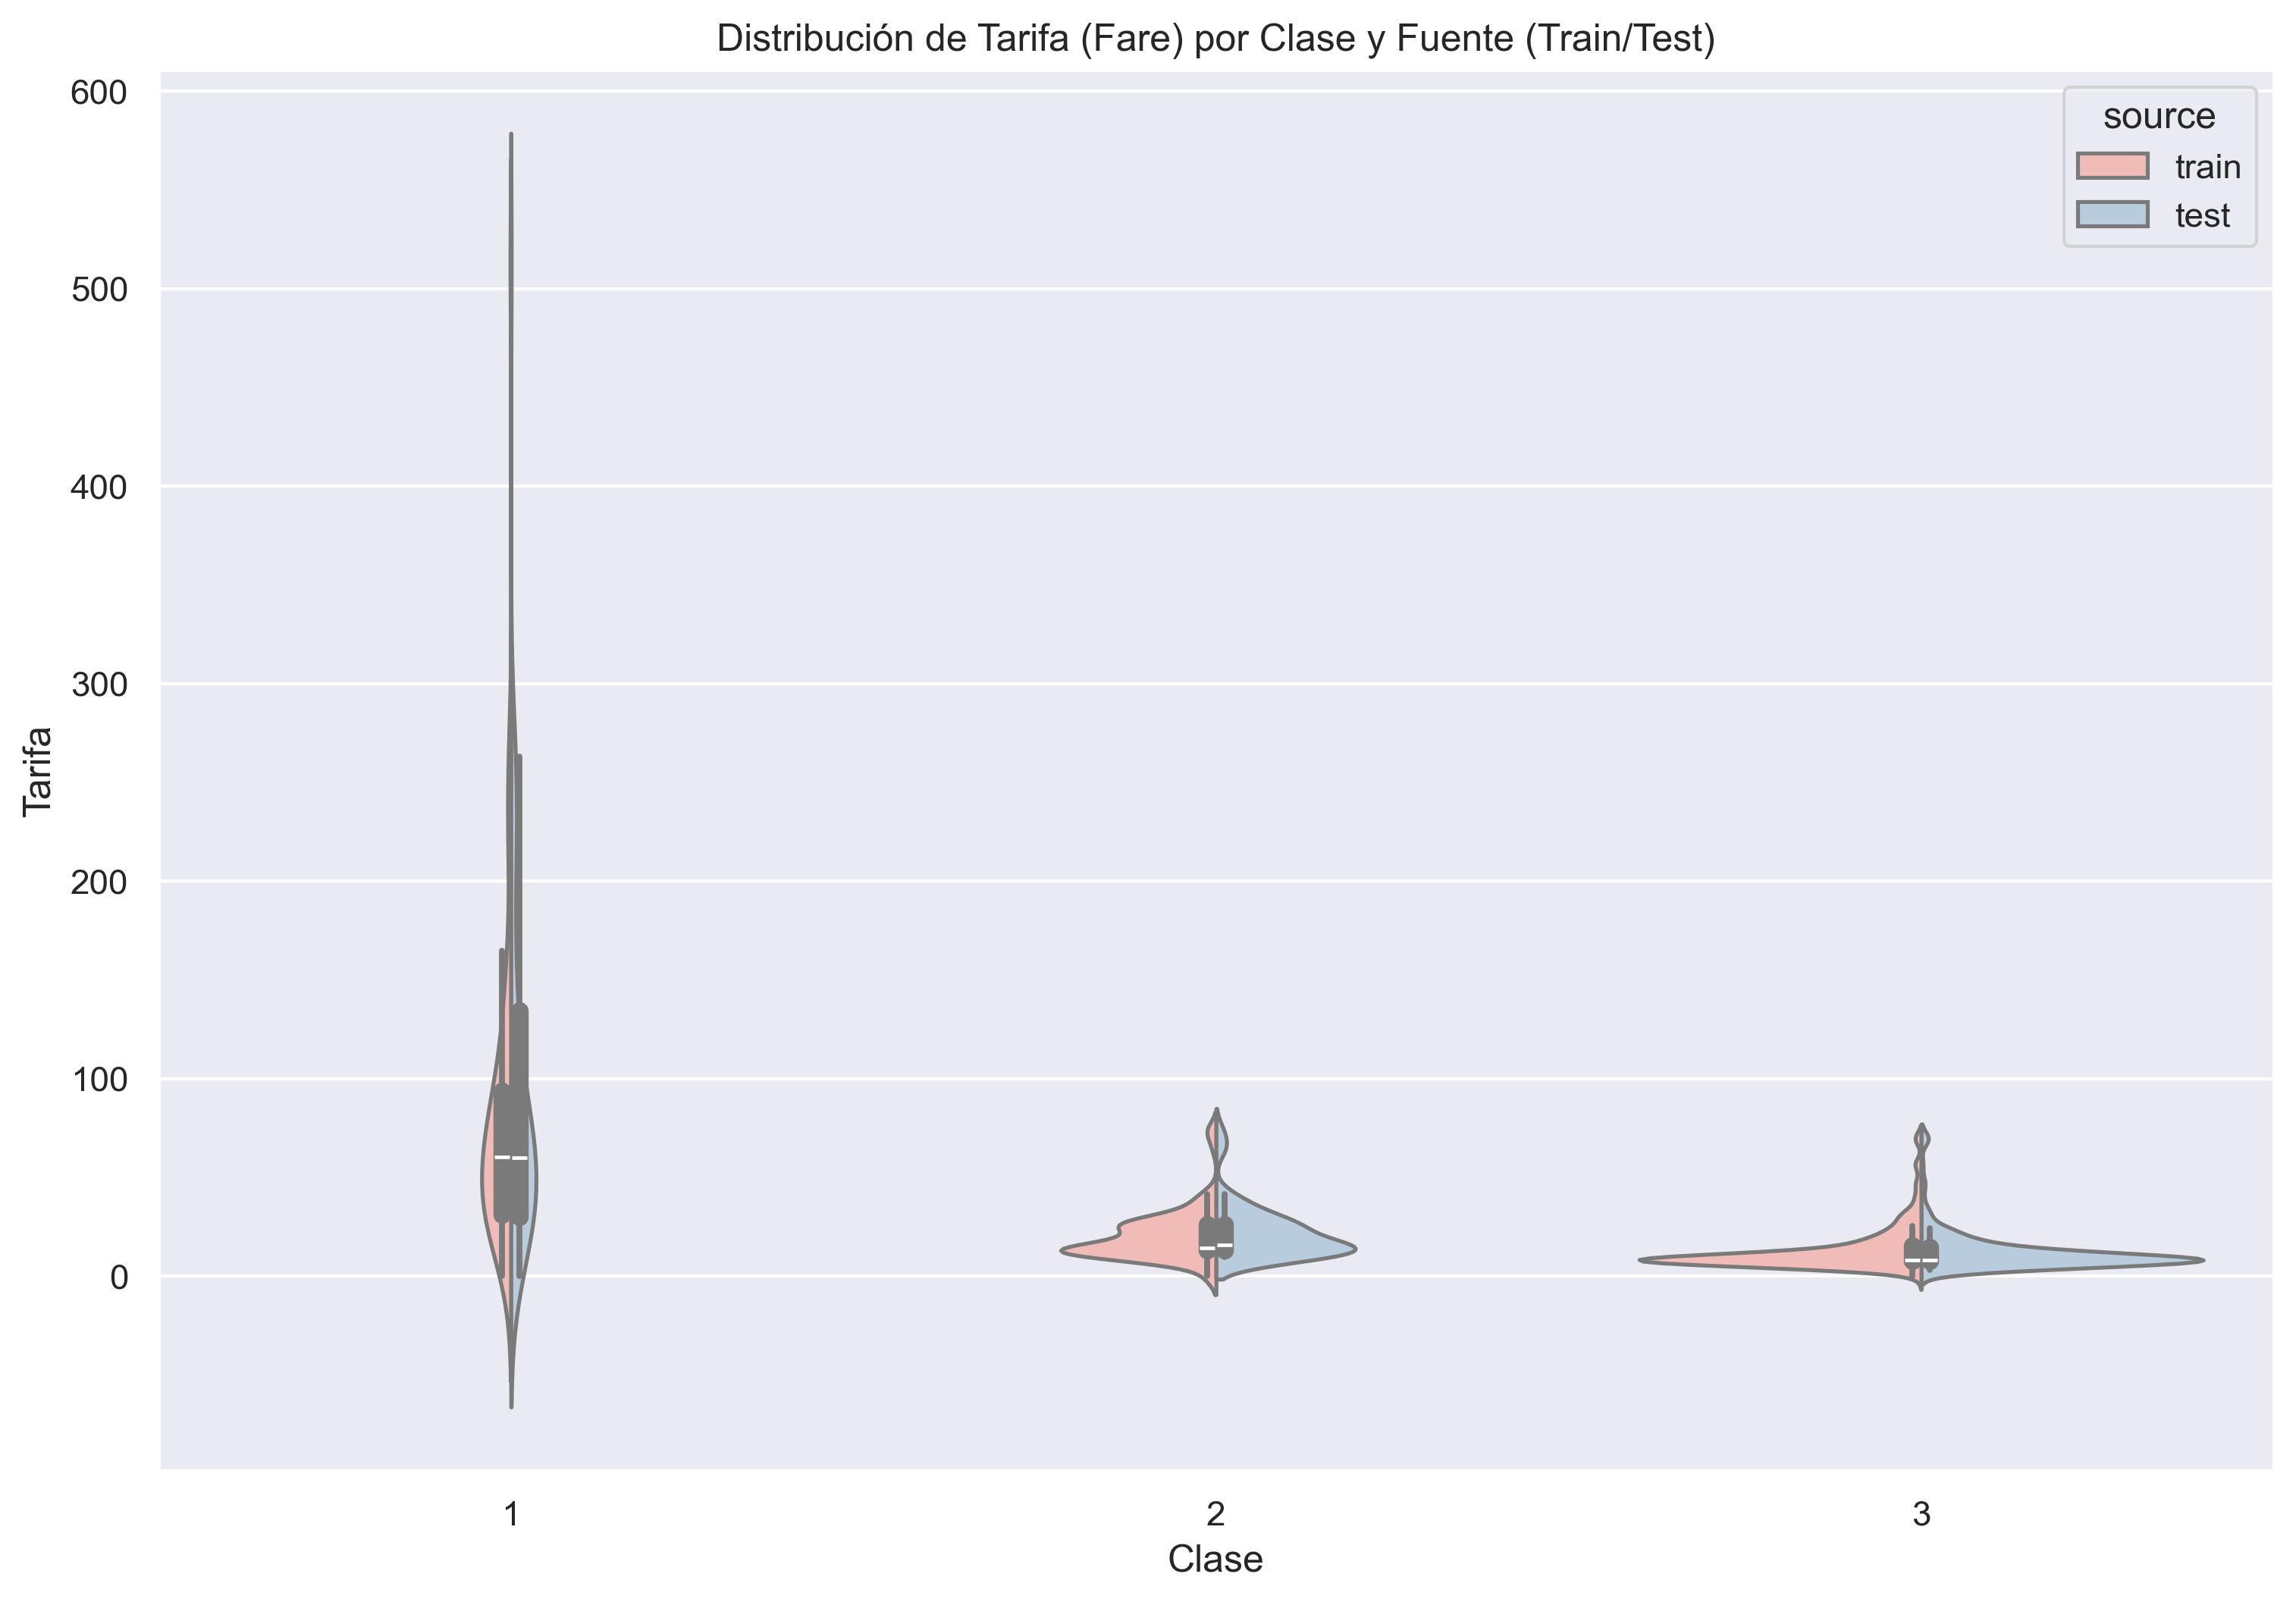

La comparación entre TRAIN y TEST en la relación entre clase y tarifa revela que ambos conjuntos siguen la misma tendencia: a mayor clase, mayor tarifa promedio. Las pequeñas variaciones entre fuentes son normales y no afectan la consistencia general de los datos.


In [6]:
train["source"] = "train"
test["source"] = "test"
if "Survived" not in test.columns:
    test["Survived"] = None

ambos = pd.concat([train, test], ignore_index=True)

def ensure_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

num_cols = ["Age", "Fare", "SibSp", "Parch"]
train = ensure_numeric(train, num_cols)
test_modelo = ensure_numeric(test_modelo, num_cols)
ambos = ensure_numeric(ambos, num_cols)

plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="darkgrid")

for col in ["Age", "Fare", "SibSp", "Parch"]:
    if col in train.columns:
        sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")
        plt.title(f"Distribución de {col} según Supervivencia (Train)")
        plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
        plt.ylabel(col)
        plt.show()
        print(f"En el conjunto TRAIN, la variable {col} muestra cómo varían los valores entre sobrevivientes y no sobrevivientes. "
              f"Se aprecia que los patrones de {col} difieren entre ambos grupos, indicando que esta variable influye en la probabilidad de supervivencia.")

if {"Pclass", "Fare"}.issubset(train.columns):
    sns.violinplot(x="Pclass", y="Fare", hue="Survived", data=train, palette="Pastel1", split=True)
    plt.title("Distribución de Tarifa (Fare) por Clase y Supervivencia (Train)")
    plt.xlabel("Clase")
    plt.ylabel("Tarifa")
    plt.show()
    print("La relación entre la clase del pasajero y la tarifa pagada muestra que las tarifas más altas, "
          "propias de la primera clase, se asocian con mayores tasas de supervivencia. "
          "En cambio, las clases inferiores reflejan tarifas bajas y menor probabilidad de sobrevivir.")

if "PassengerId" in test_modelo.columns and "PassengerId" in test.columns:
    test_modelo["PassengerId"] = test_modelo["PassengerId"].astype(str)
    test["PassengerId"] = test["PassengerId"].astype(str)
    test_modelo = test_modelo.merge(test, on="PassengerId", how="left", suffixes=("", "_test"))

for col in ["Age", "Fare", "SibSp", "Parch"]:
    if col in test_modelo.columns:
        sns.violinplot(y=col, data=test_modelo, palette="Pastel1")
        plt.title(f"Distribución de {col} (Test_Modelo)")
        plt.ylabel(col)
        plt.show()
        print(f"En el conjunto TEST_MODELO, la distribución de {col} mantiene una forma similar a la observada en TRAIN, "
              f"lo que sugiere que los datos de prueba son consistentes con los de entrenamiento.")

for col in ["Age", "Fare", "SibSp", "Parch"]:
    if col in ambos.columns:
        sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")
        plt.title(f"Distribución de {col} por Fuente (Train vs Test)")
        plt.xlabel("Fuente")
        plt.ylabel(col)
        plt.show()
        print(f"Al comparar TRAIN y TEST para la variable {col}, las formas de las distribuciones son muy parecidas, "
              f"lo cual indica coherencia entre ambos conjuntos de datos.")

if {"Pclass", "Fare", "source"}.issubset(ambos.columns):
    sns.violinplot(x="Pclass", y="Fare", hue="source", data=ambos, palette="Pastel1", split=True)
    plt.title("Distribución de Tarifa (Fare) por Clase y Fuente (Train/Test)")
    plt.xlabel("Clase")
    plt.ylabel("Tarifa")
    plt.show()
    print("La comparación entre TRAIN y TEST en la relación entre clase y tarifa revela que ambos conjuntos siguen la misma tendencia: "
          "a mayor clase, mayor tarifa promedio. Las pequeñas variaciones entre fuentes son normales y no afectan la consistencia general de los datos.")

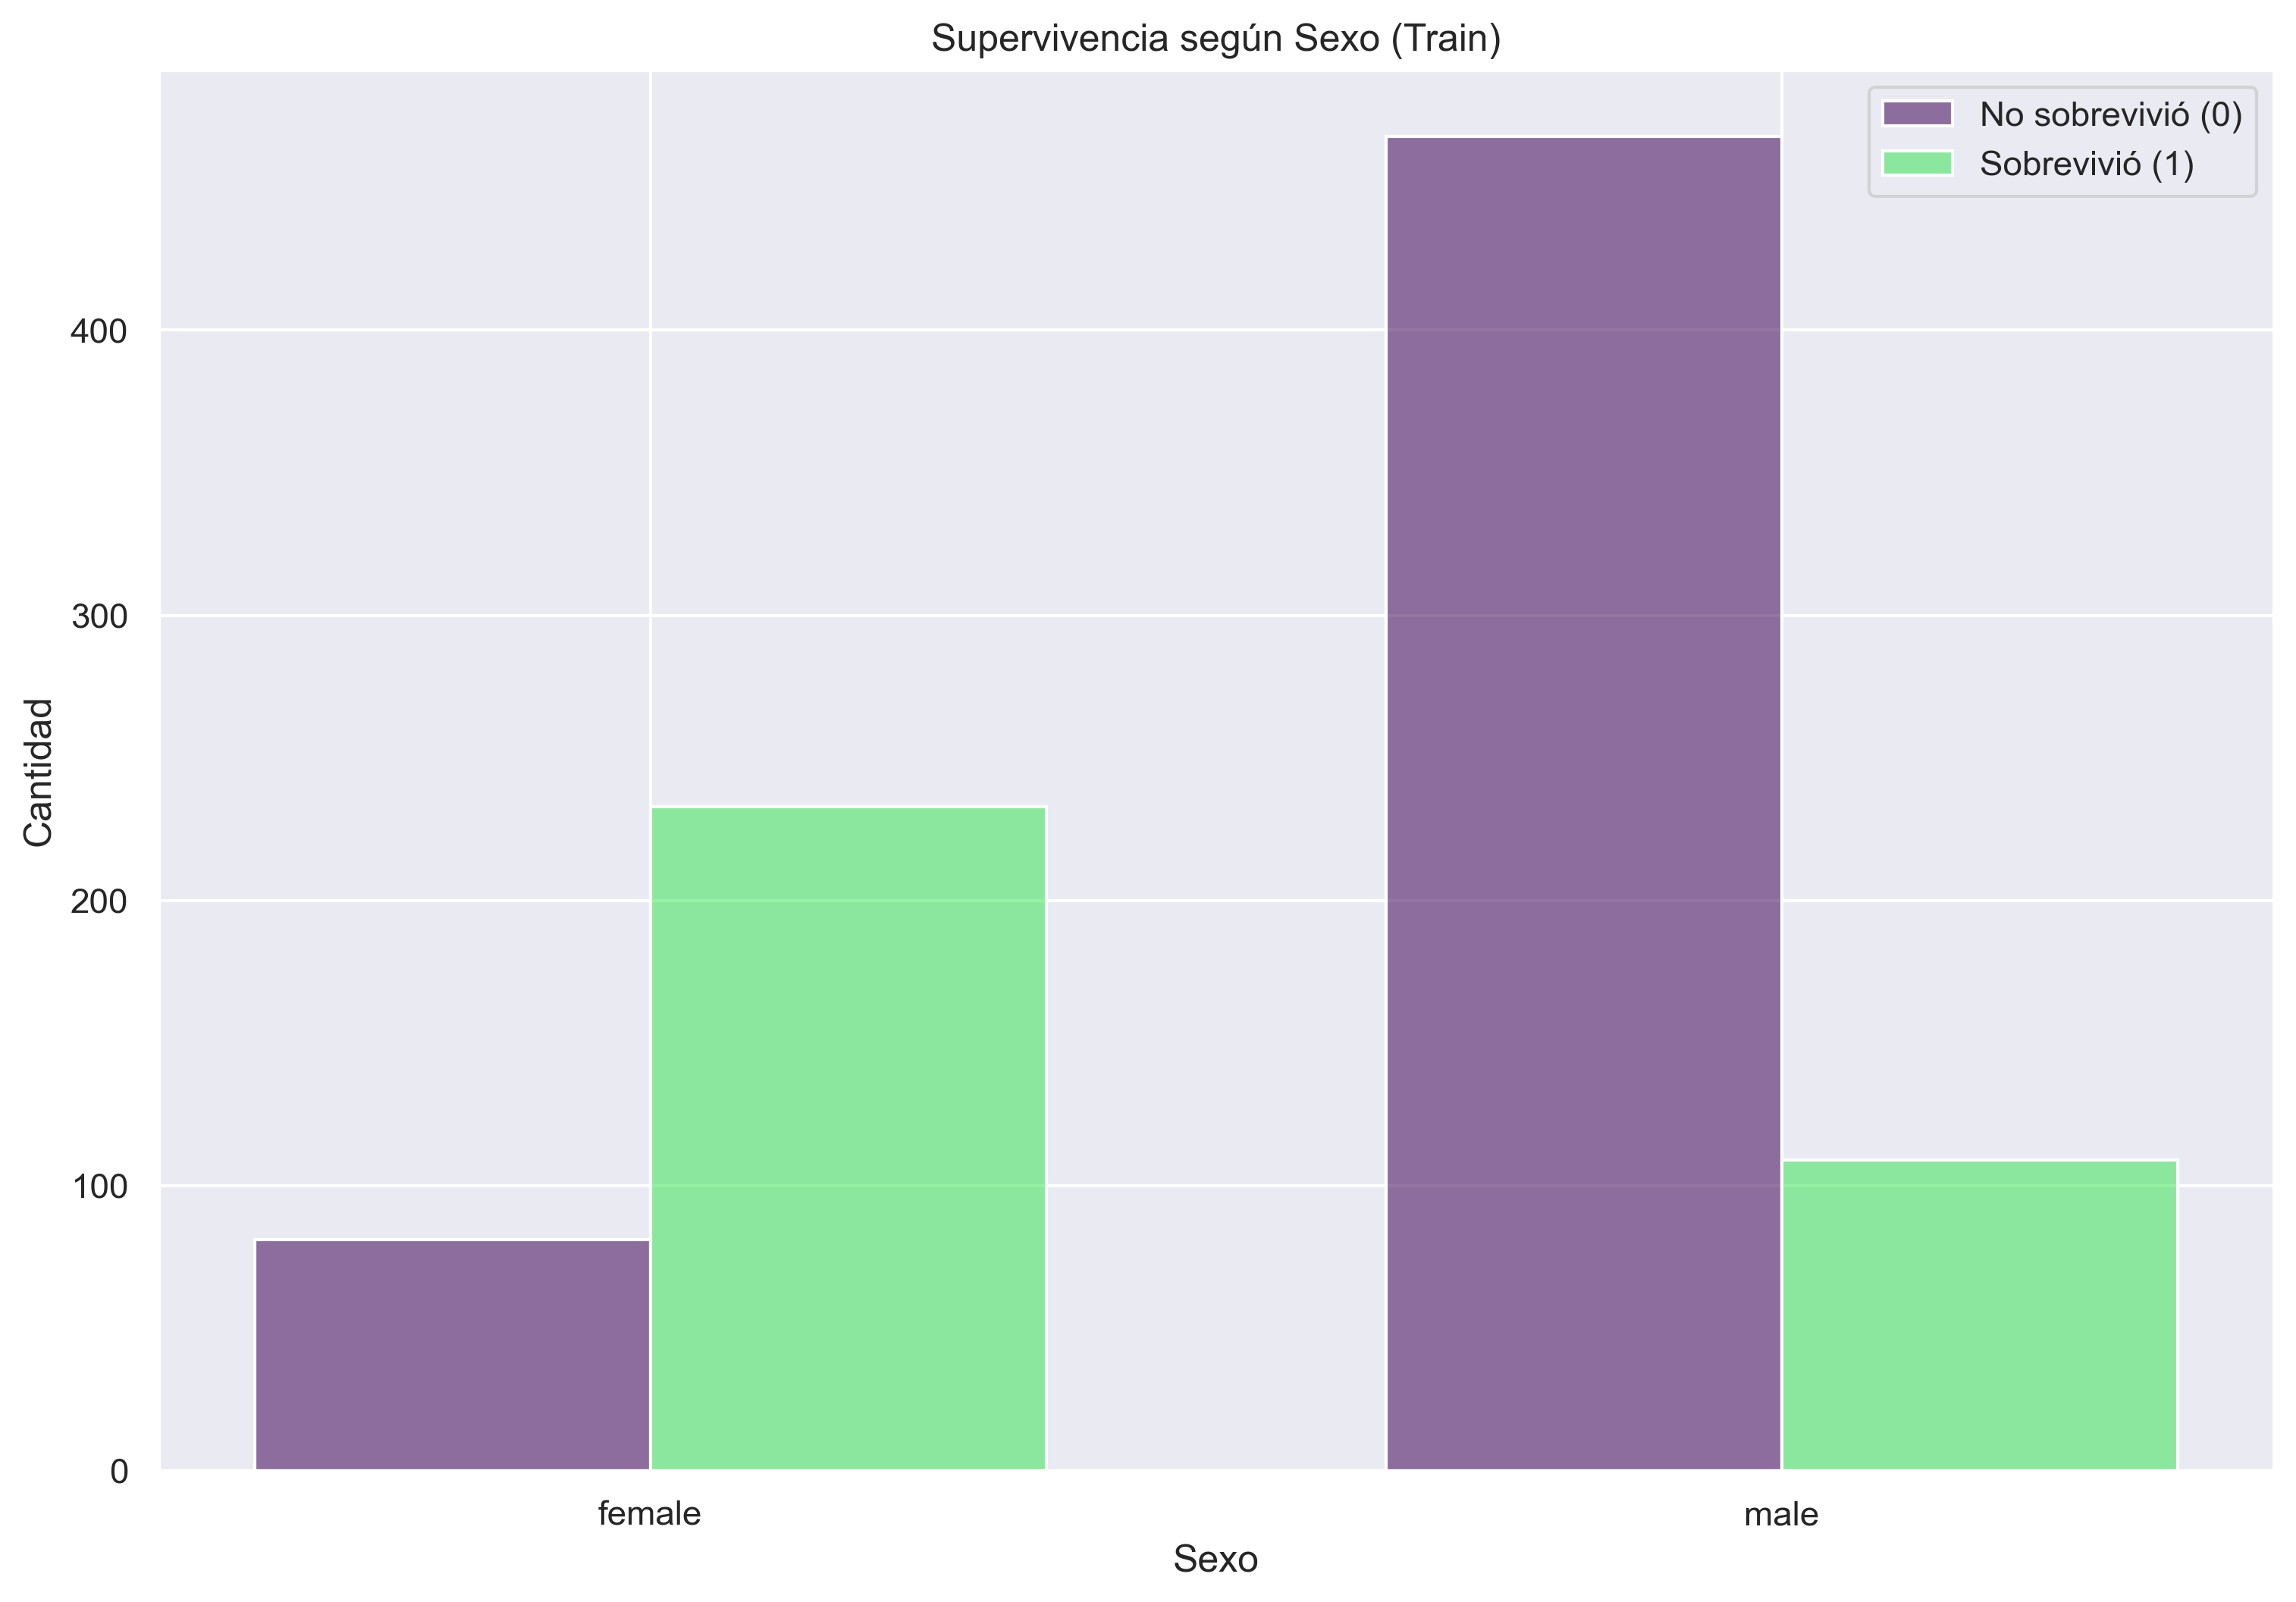

En TRAIN, la supervivencia difiere por sexo: las mujeres concentran más casos de supervivencia, mientras que los hombres presentan más fallecidos.


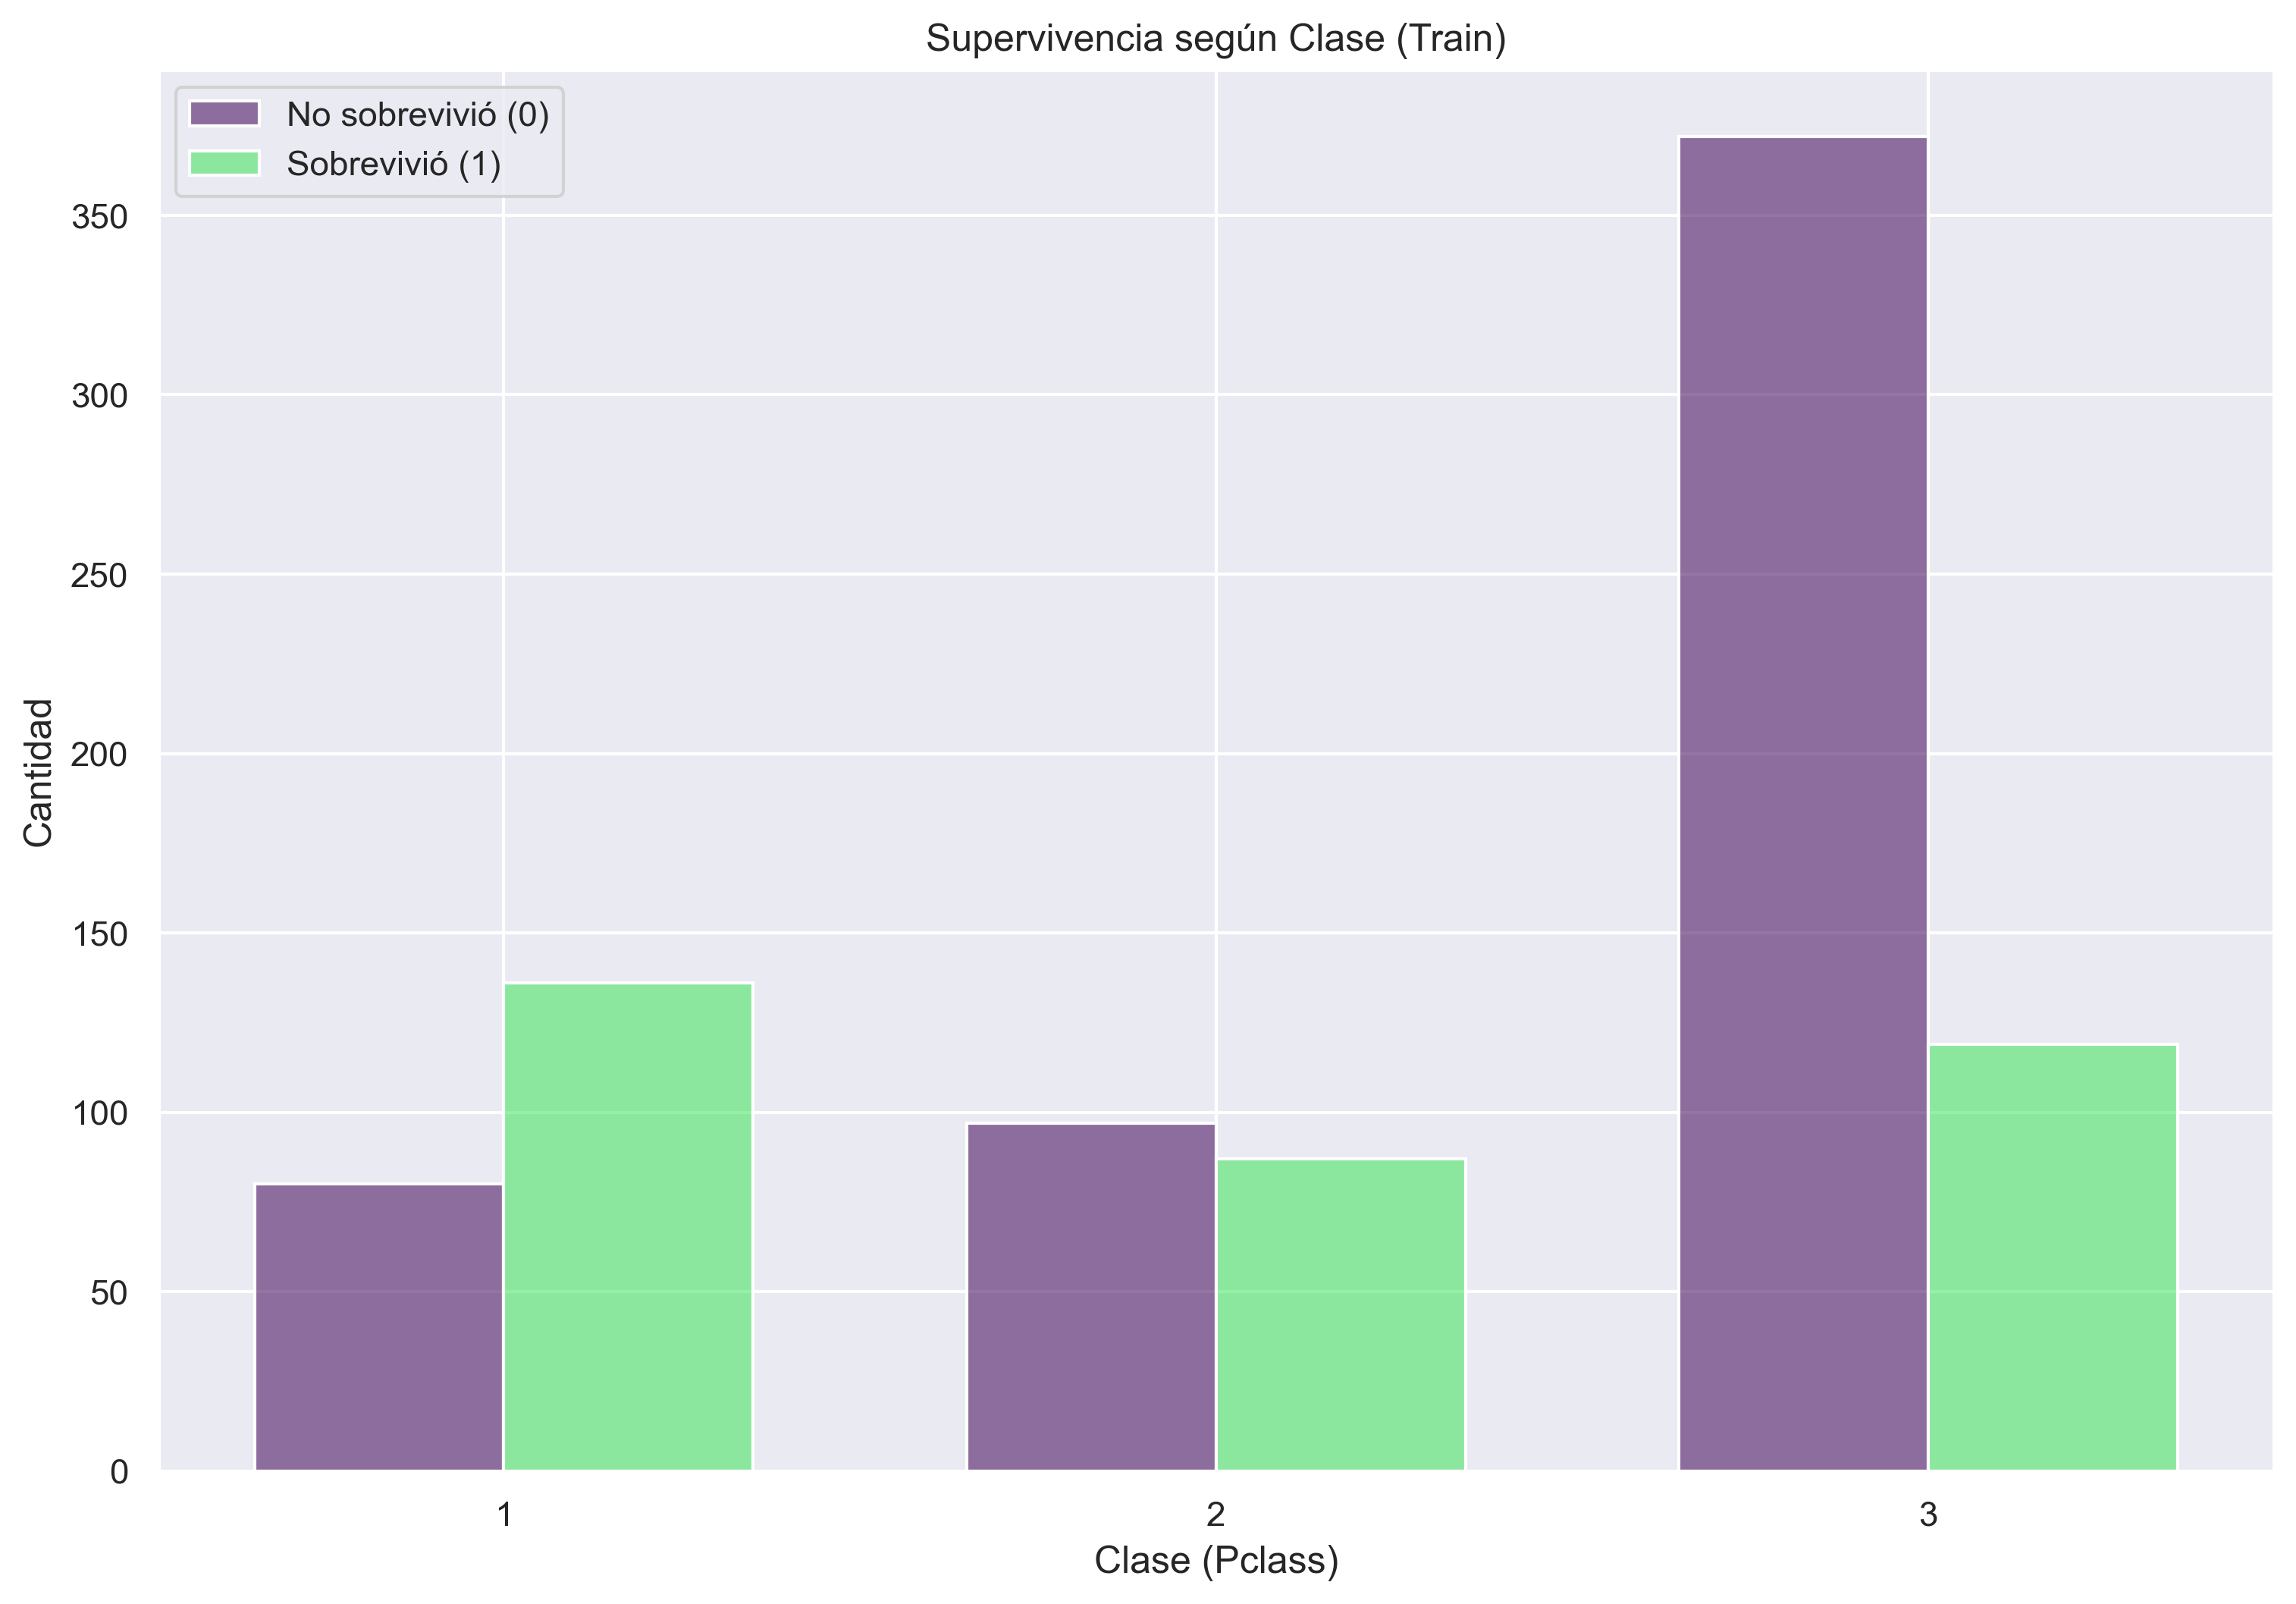

En TRAIN, la primera clase muestra más sobrevivientes que fallecidos, mientras que en las clases 2 y 3 predominan los no sobrevivientes.


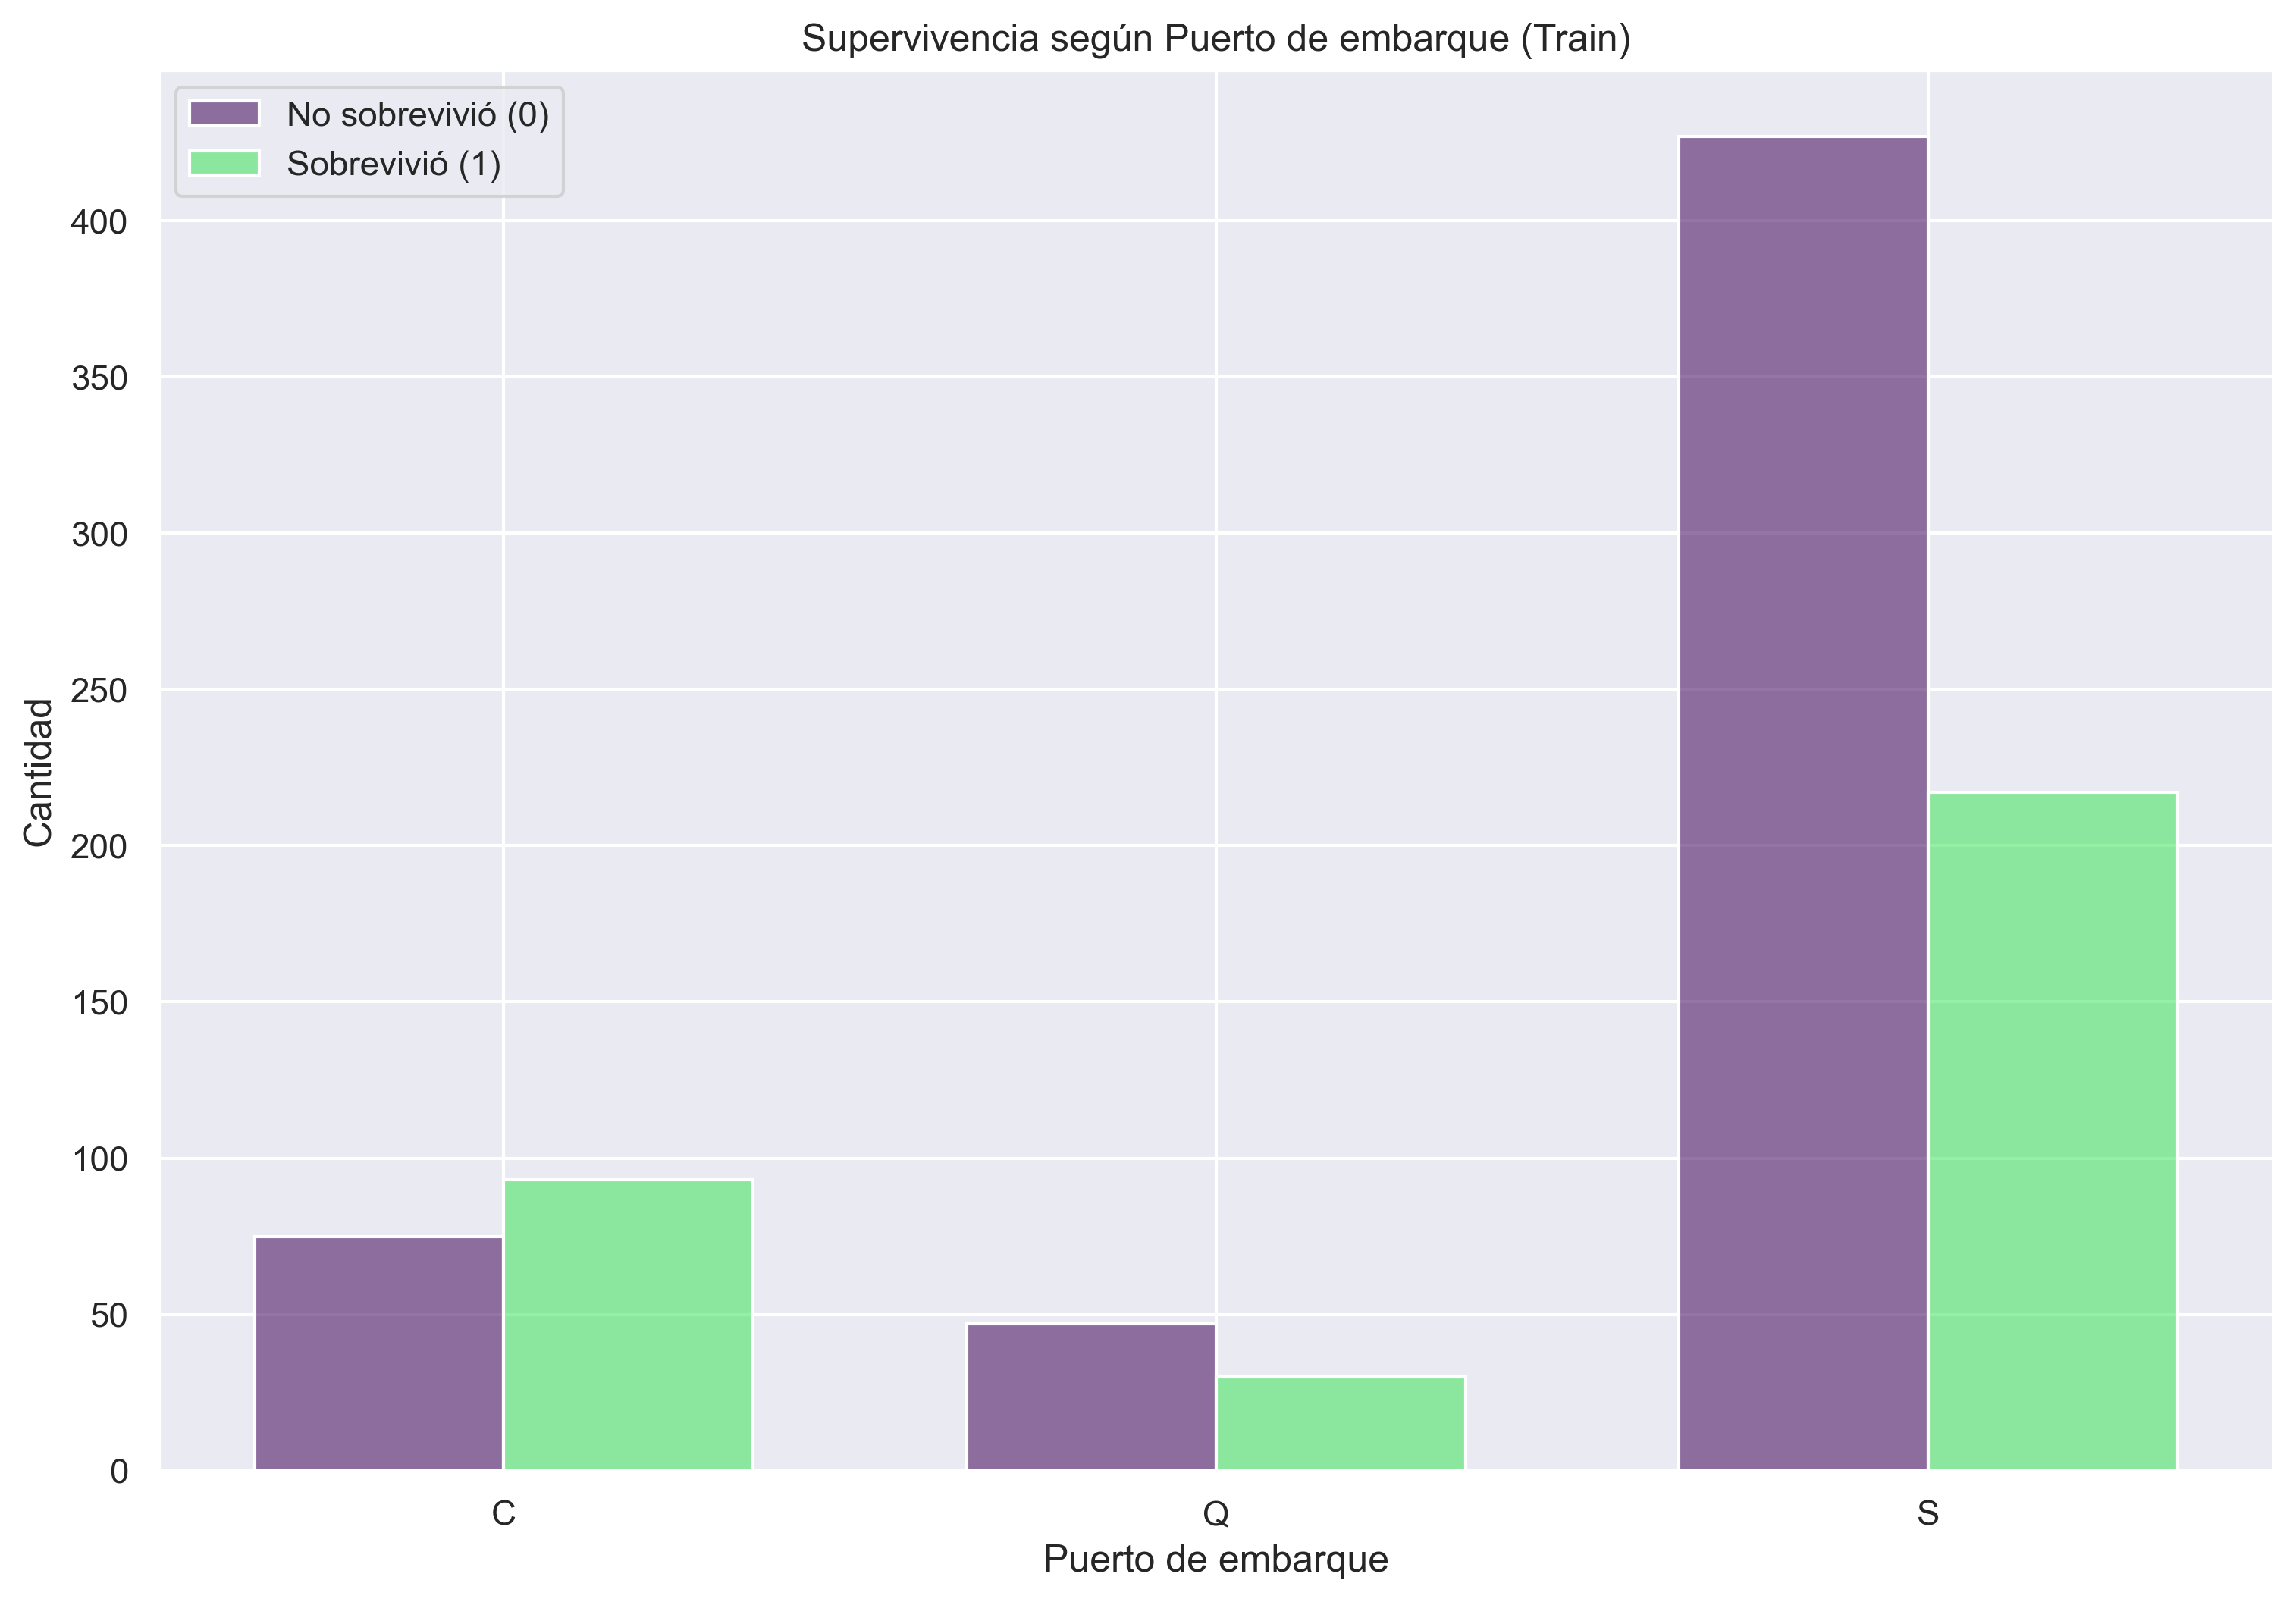

En TRAIN, Southampton concentra la mayor cantidad de pasajeros y fallecidos; en Cherbourg se observa una proporción mayor de sobrevivientes en comparación con otros puertos.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3987374226.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_modelo, x="Pclass", palette="pastel")


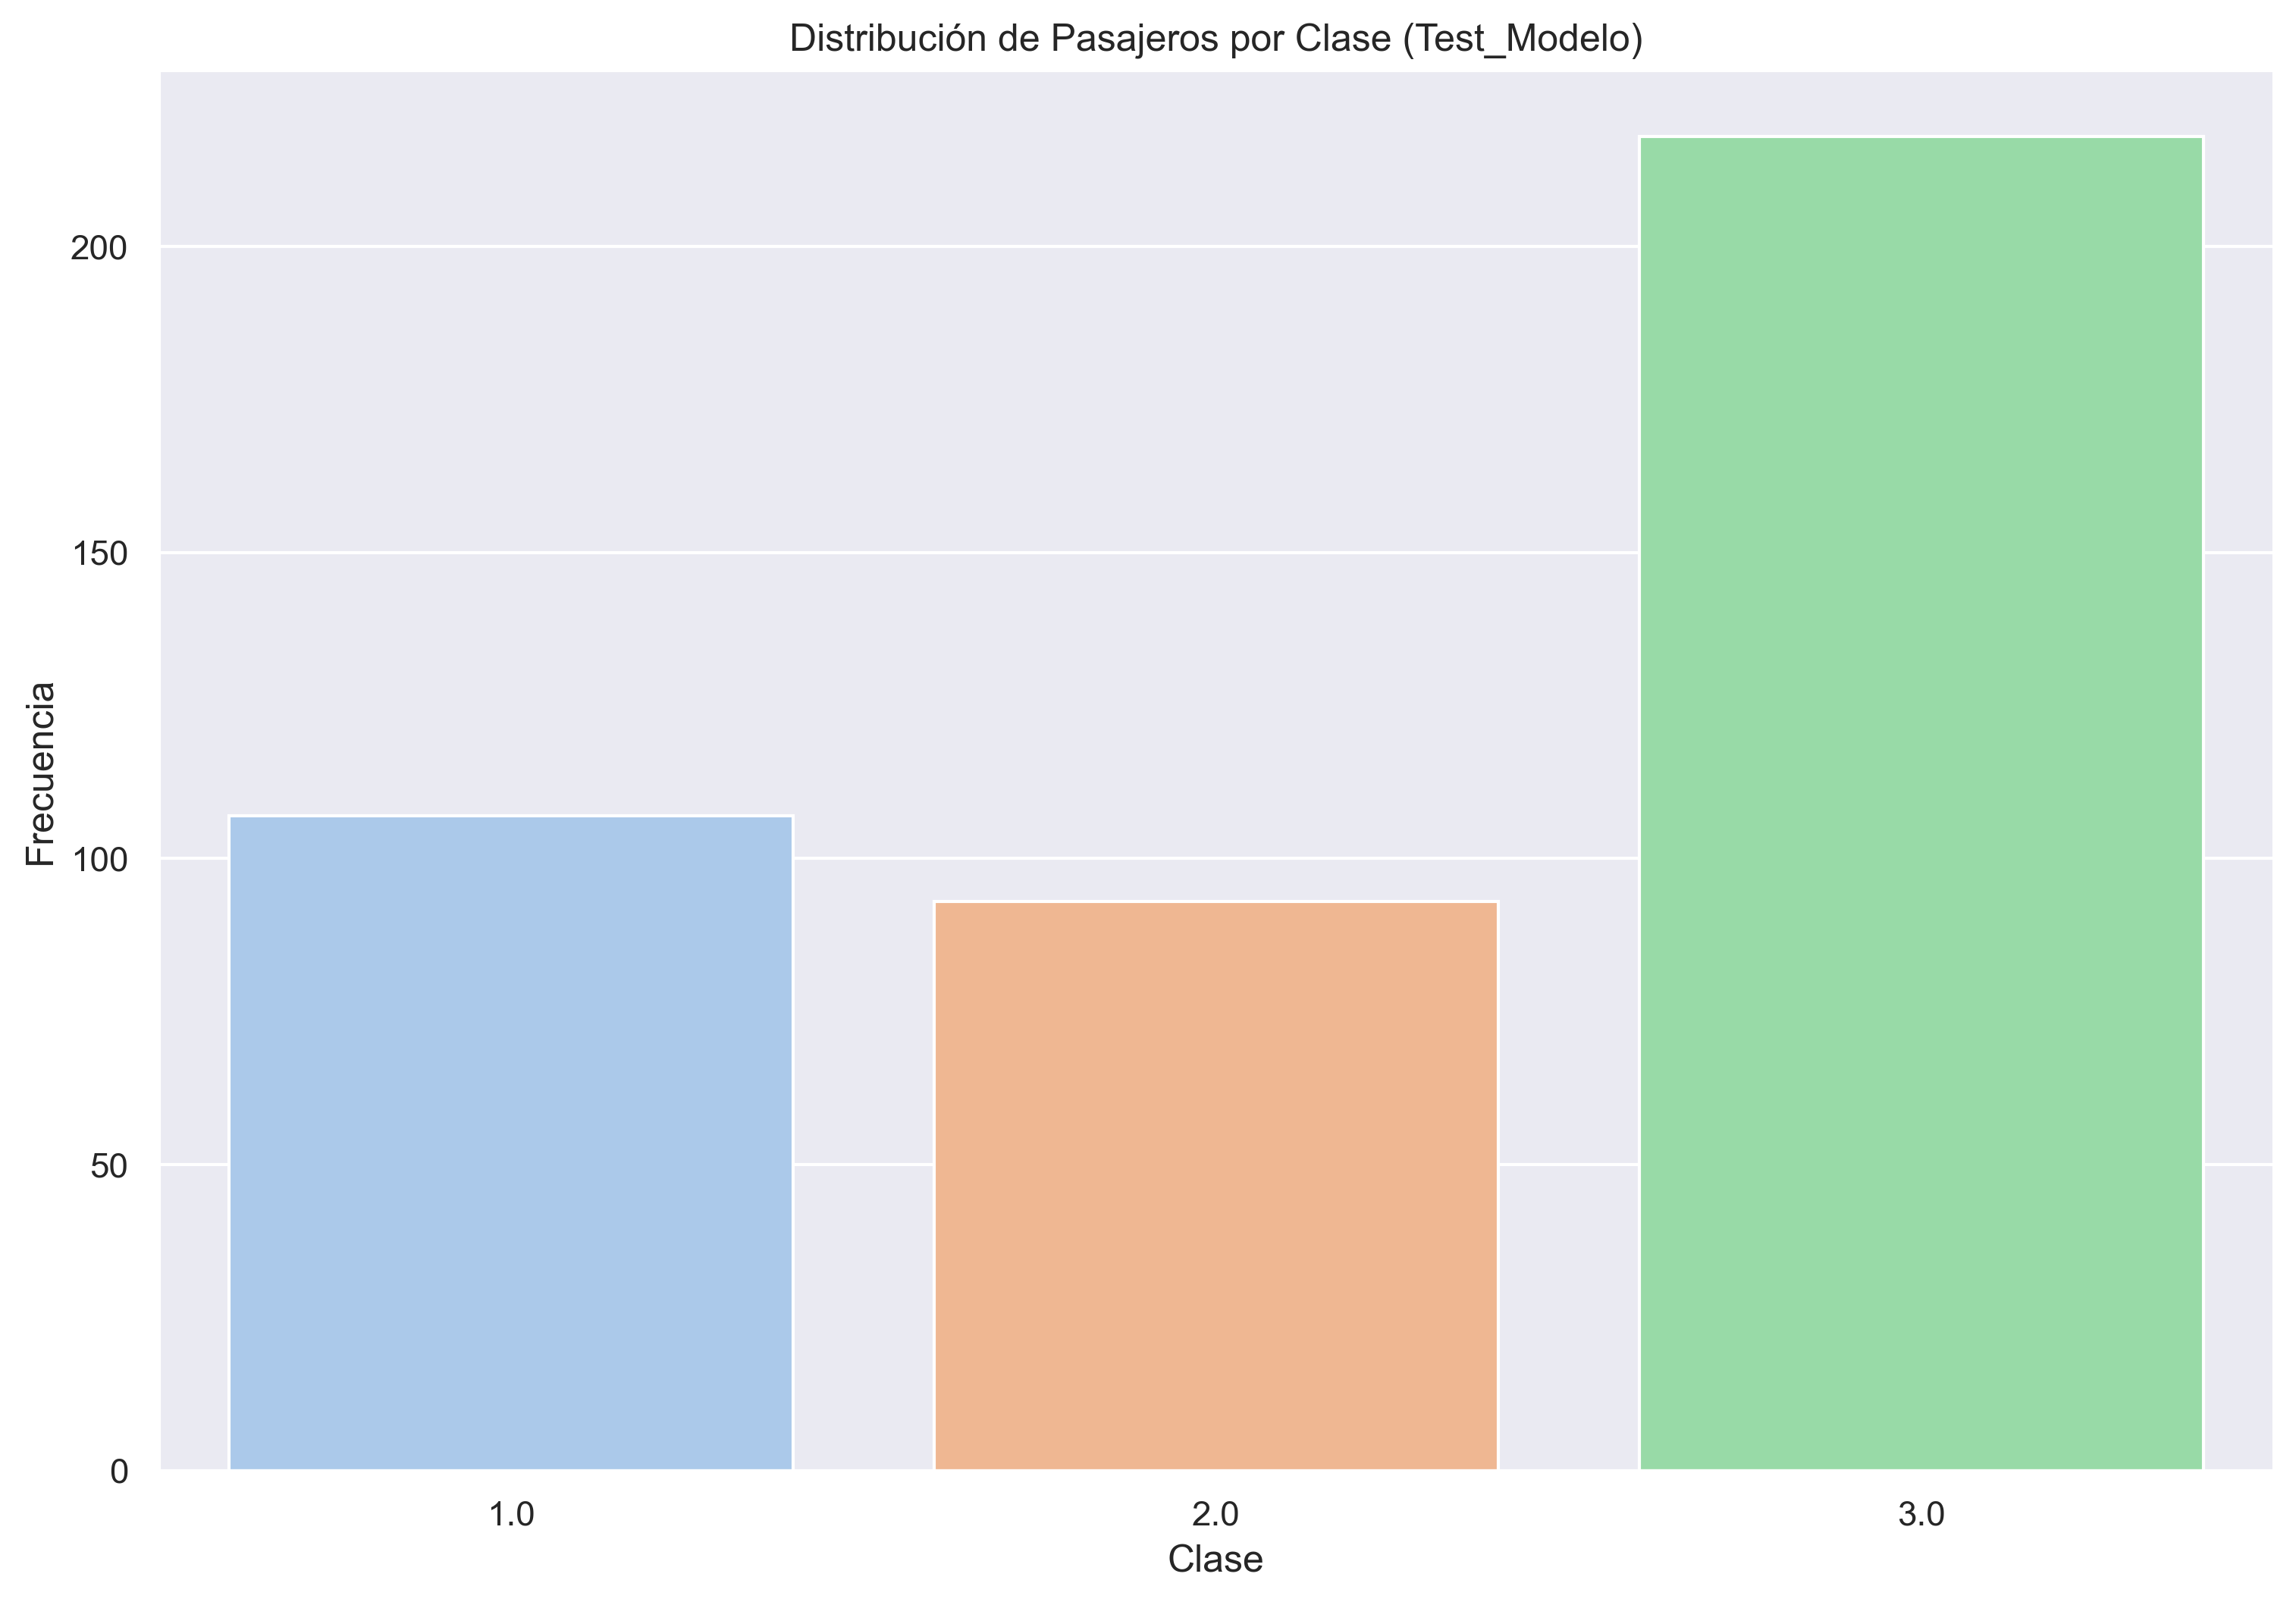

En TEST_MODELO, la distribución por clase mantiene la tendencia del conjunto de entrenamiento, con predominio de pasajeros en tercera clase.


C:\Users\User\AppData\Local\Temp\ipykernel_14556\3987374226.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_modelo, x="Sex", palette="pastel")


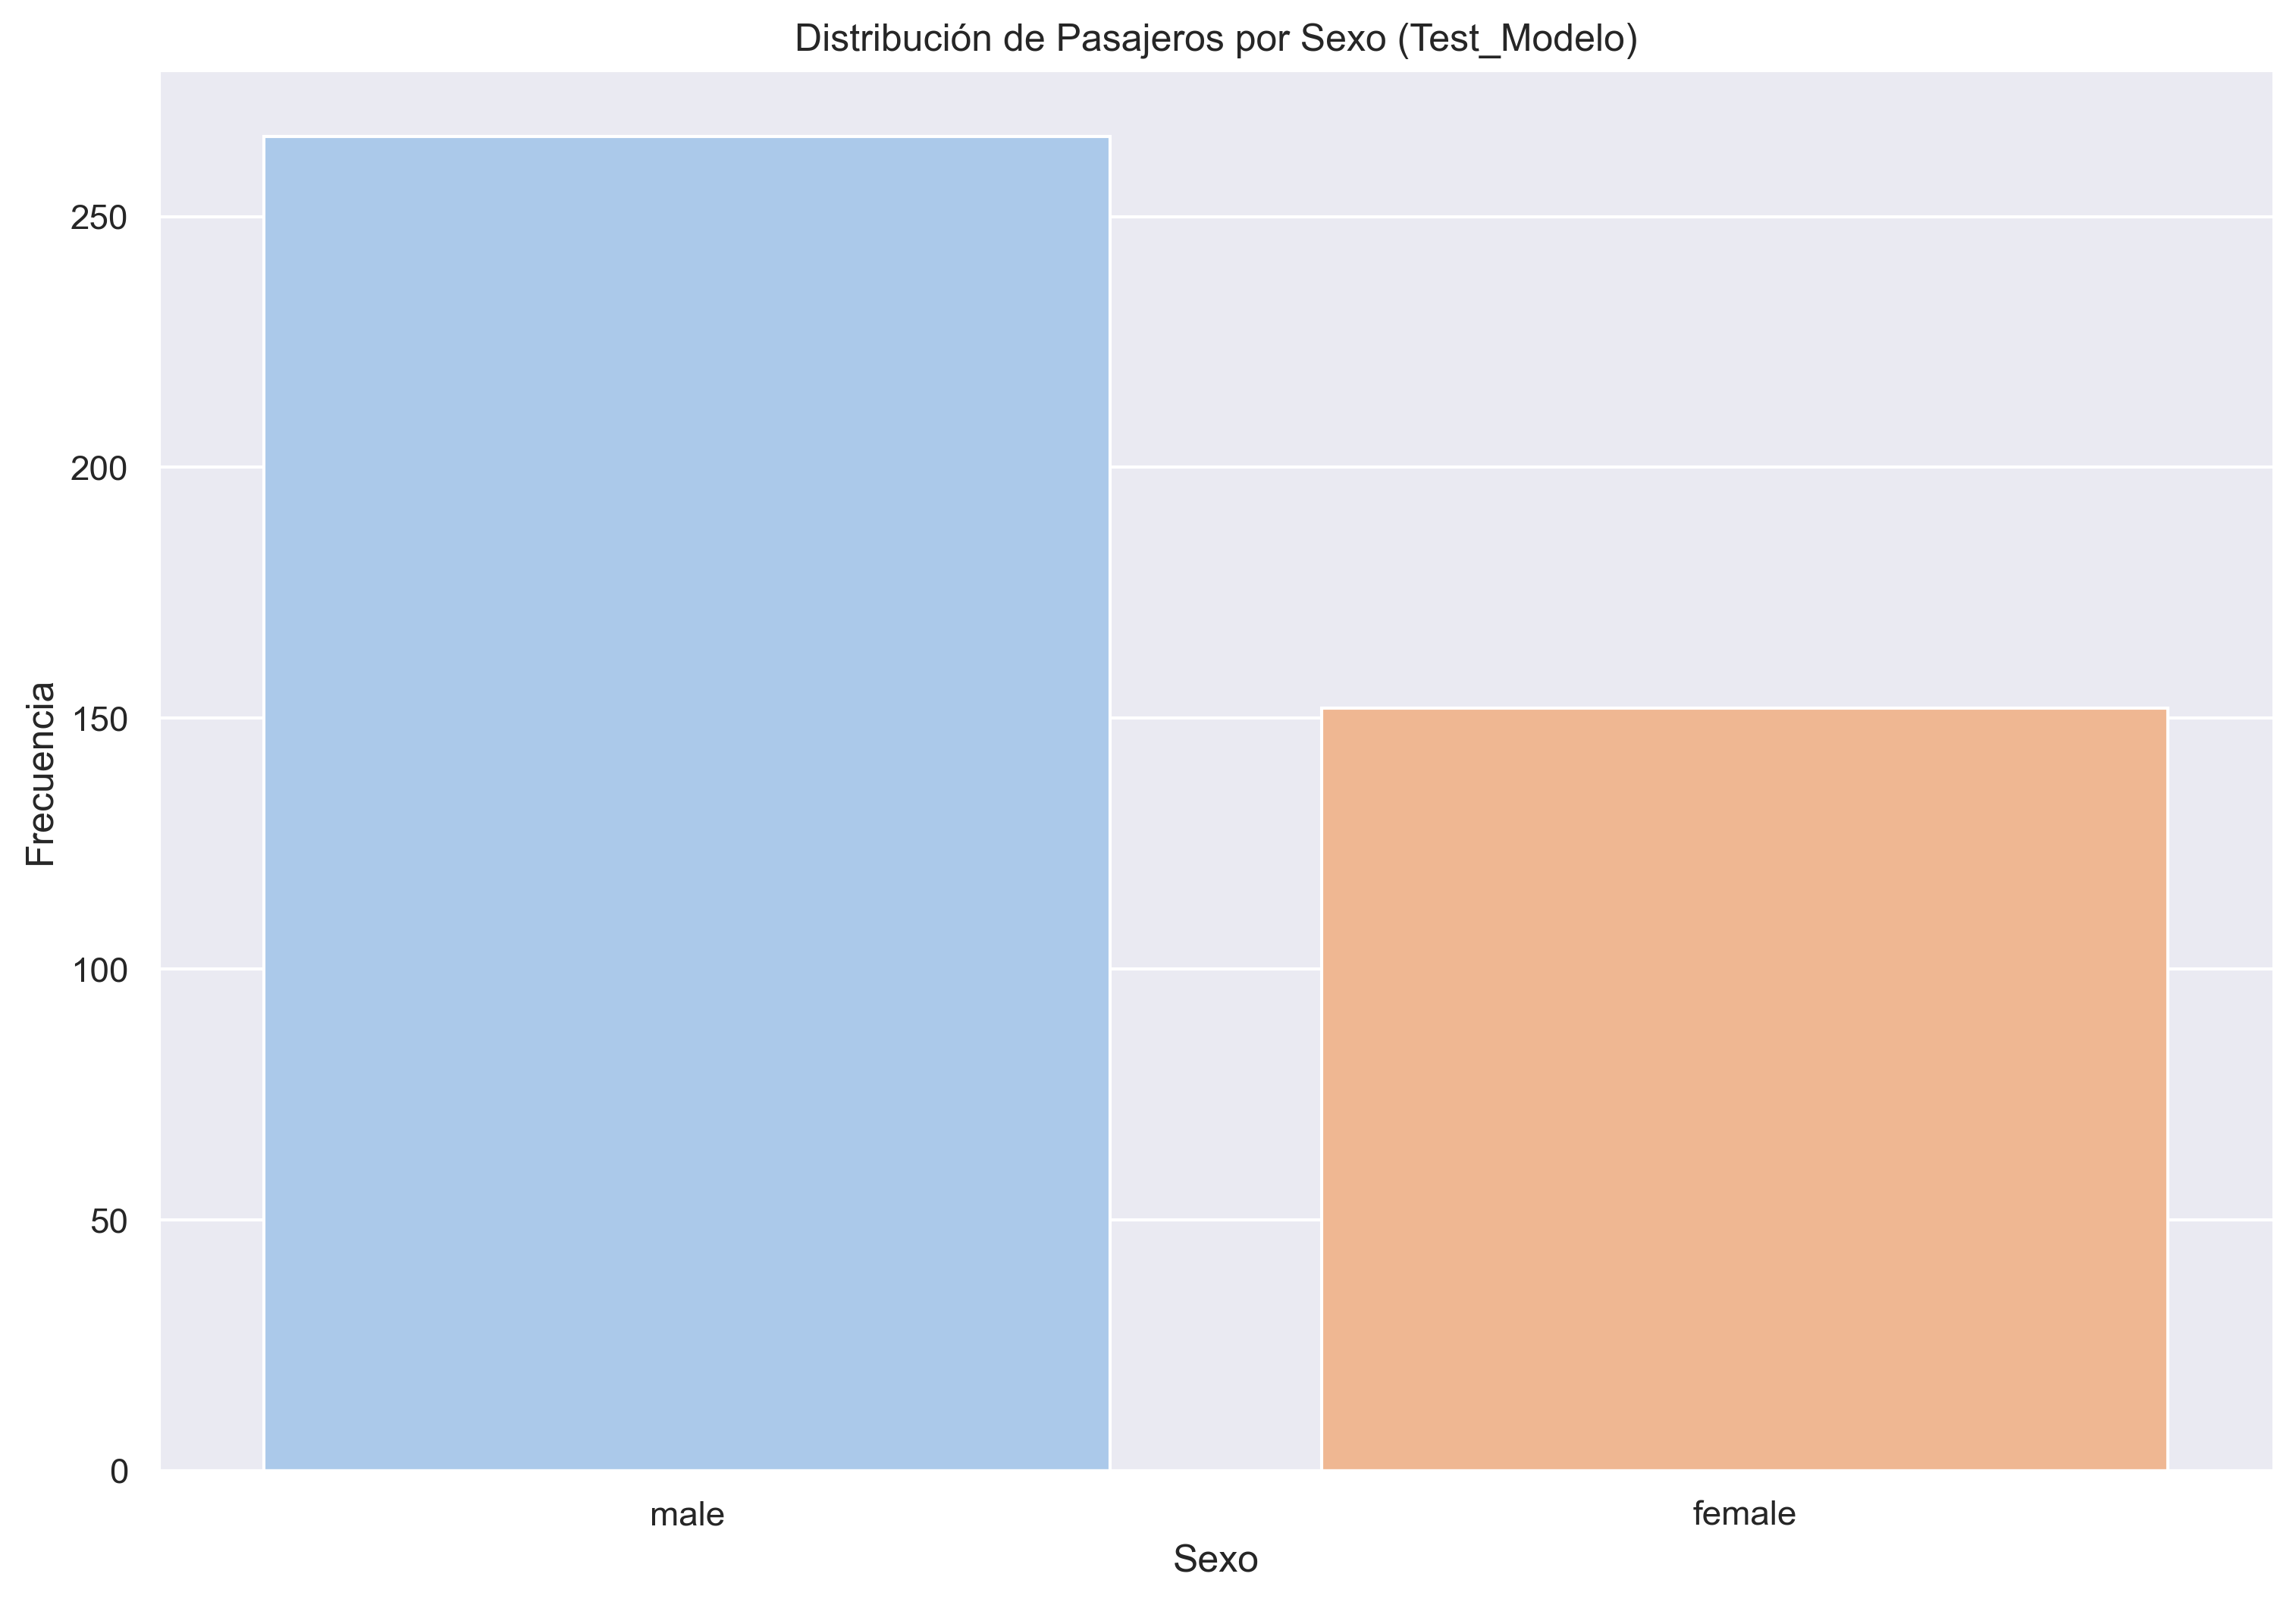

En TEST_MODELO, la distribución por sexo es consistente con TRAIN; hay más hombres que mujeres.


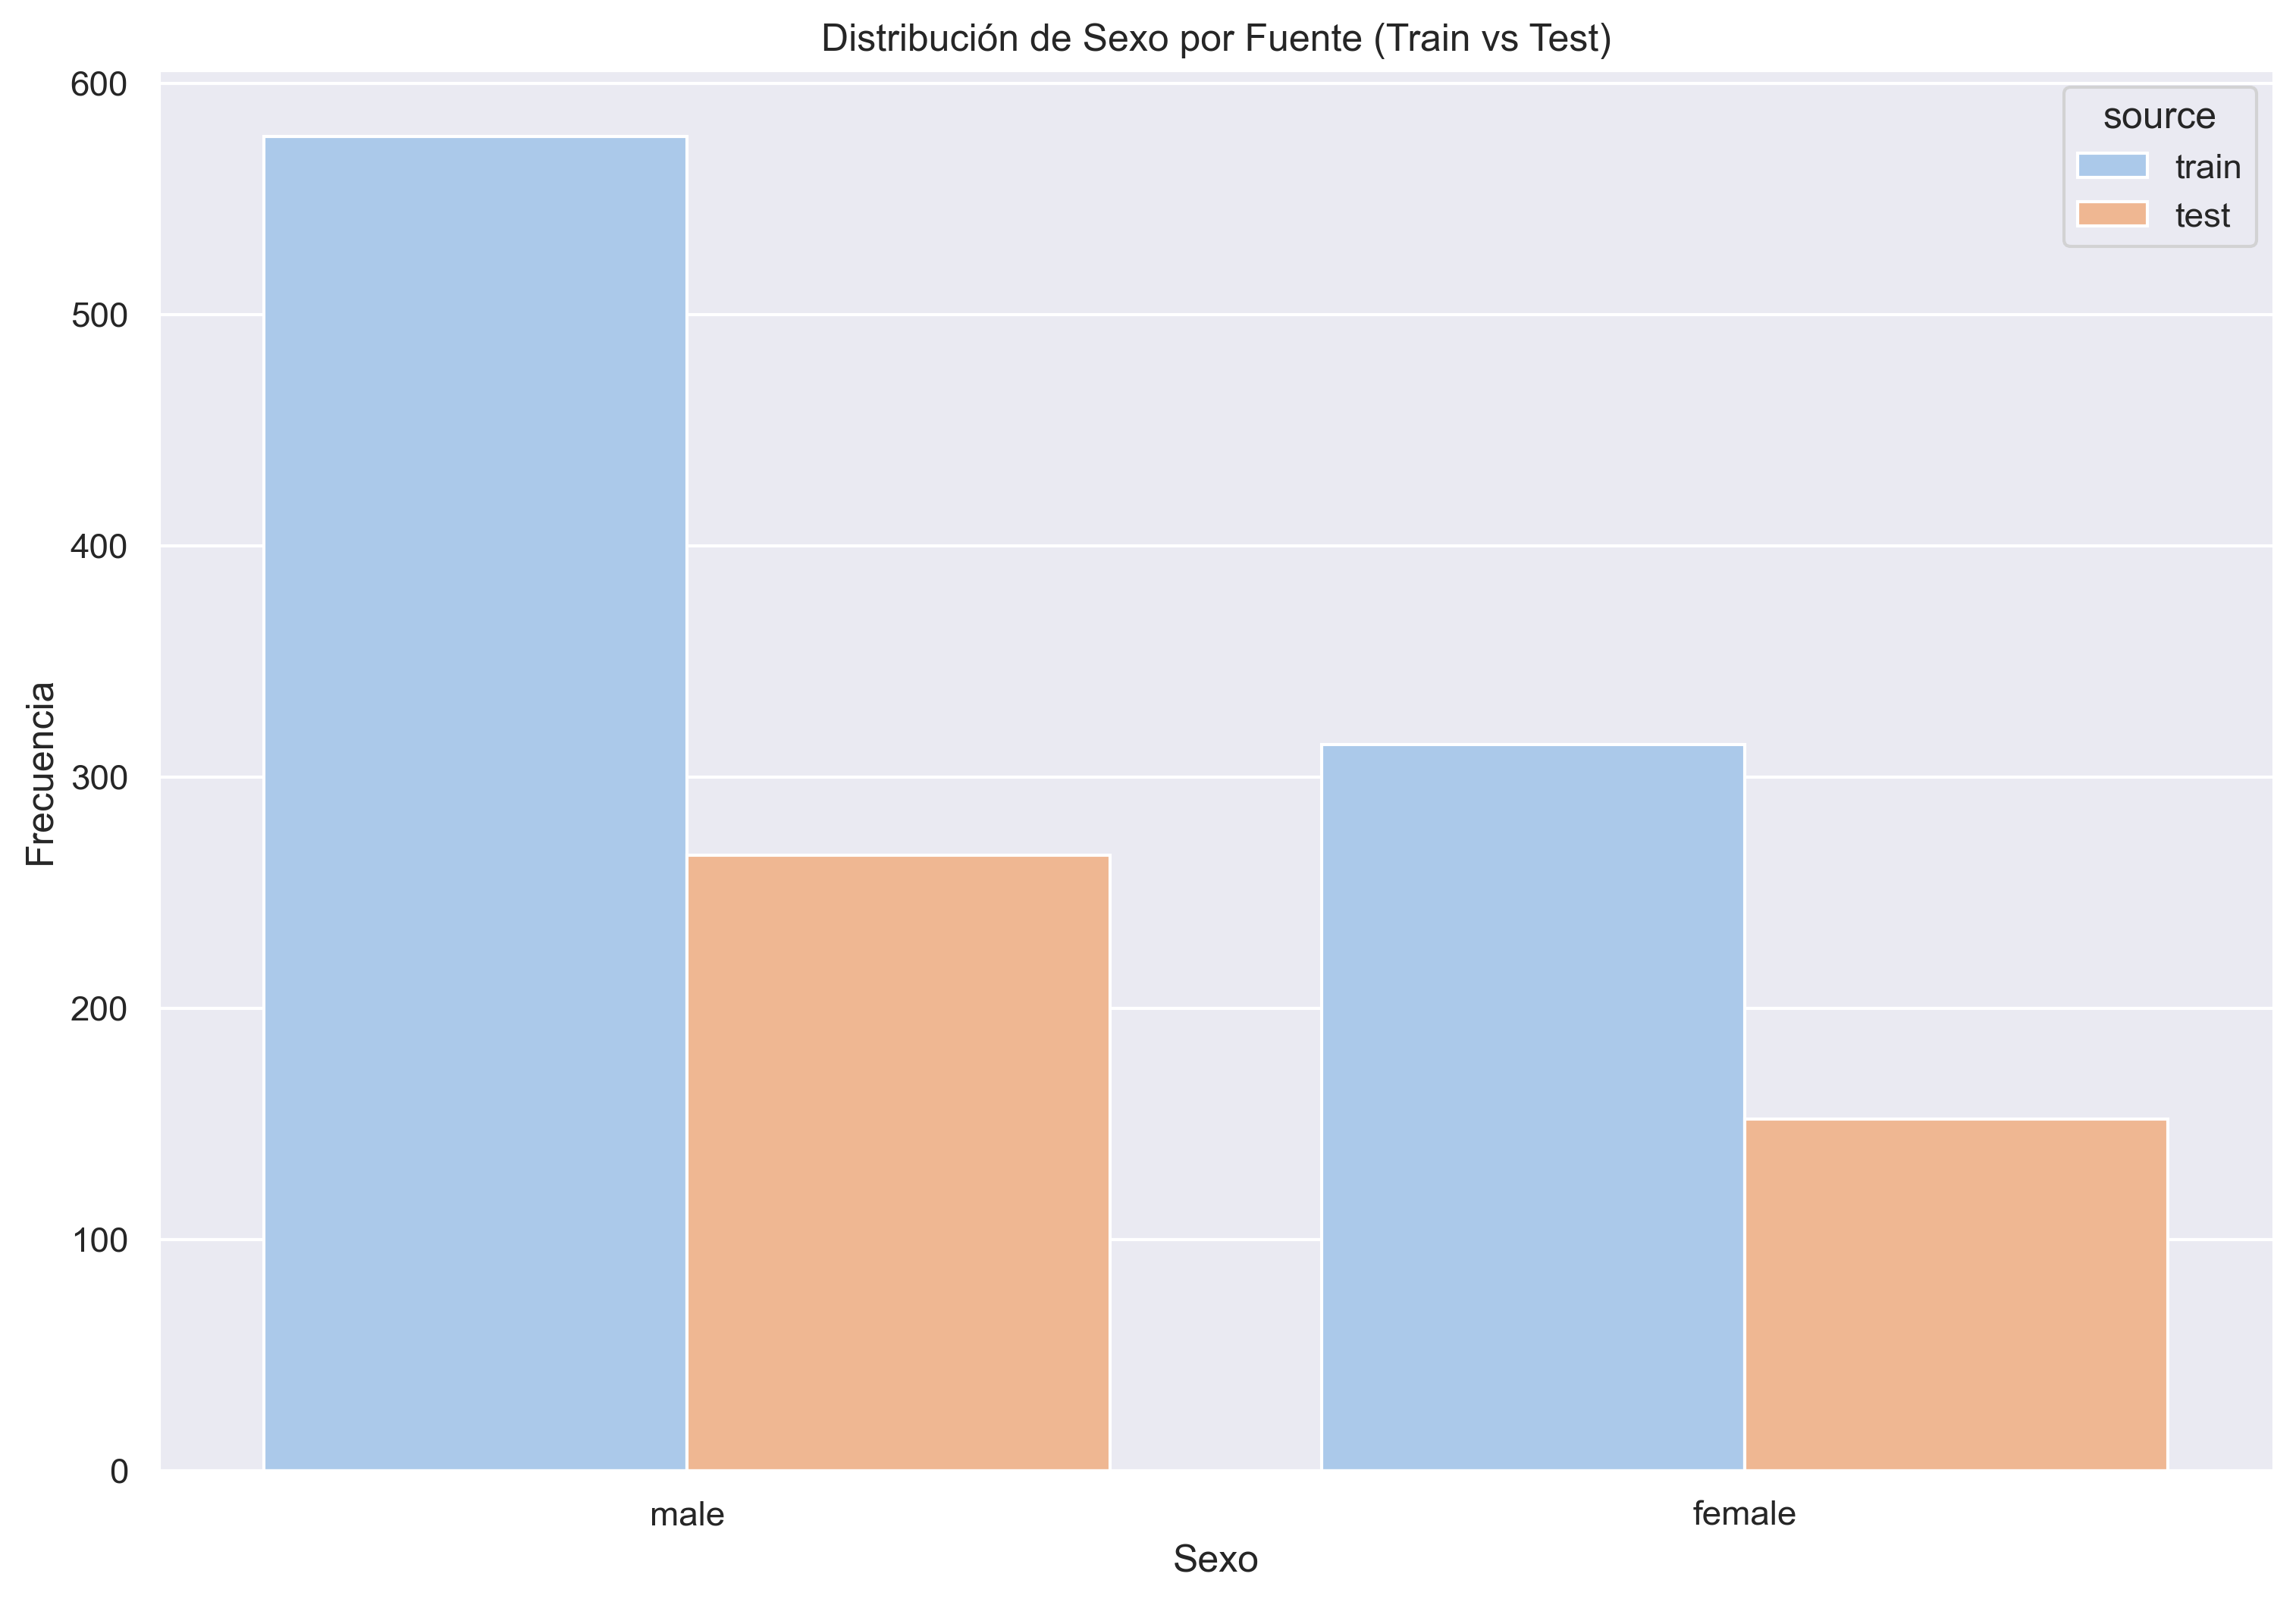

La comparación por sexo entre TRAIN y TEST muestra perfiles similares en ambas fuentes.


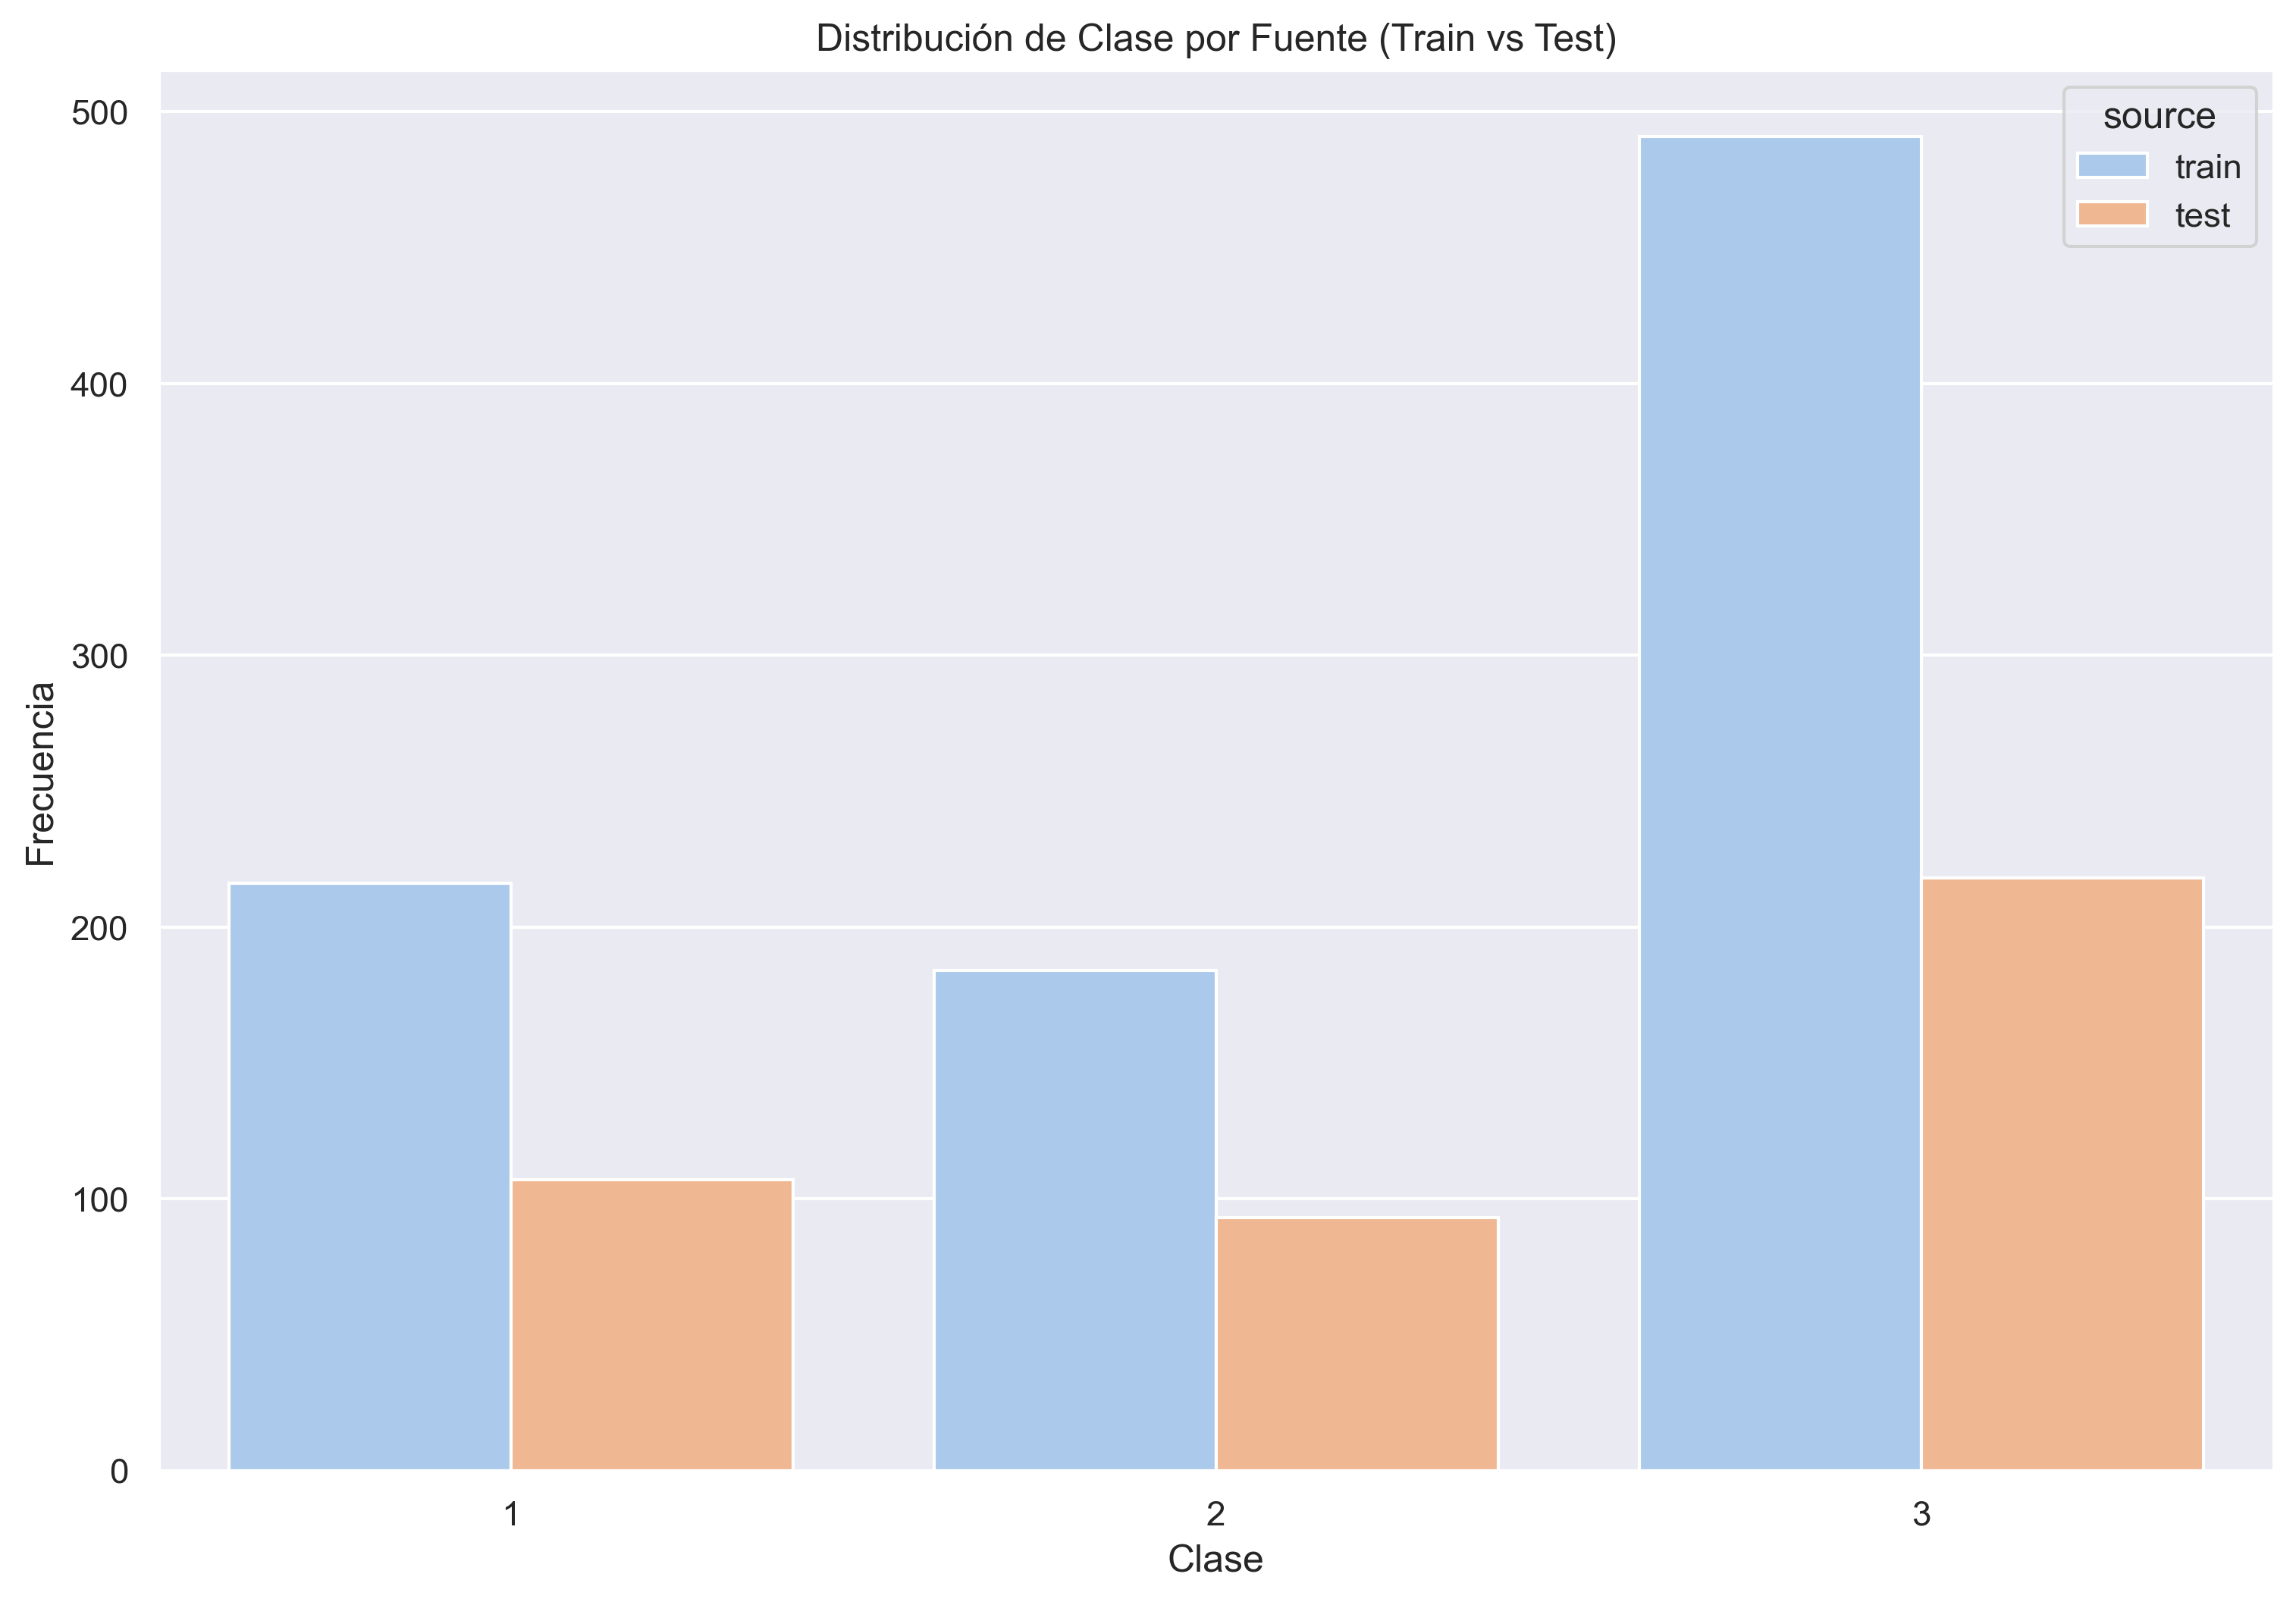

La distribución por clase es comparable entre TRAIN y TEST; la tercera clase es la más frecuente en ambos conjuntos.


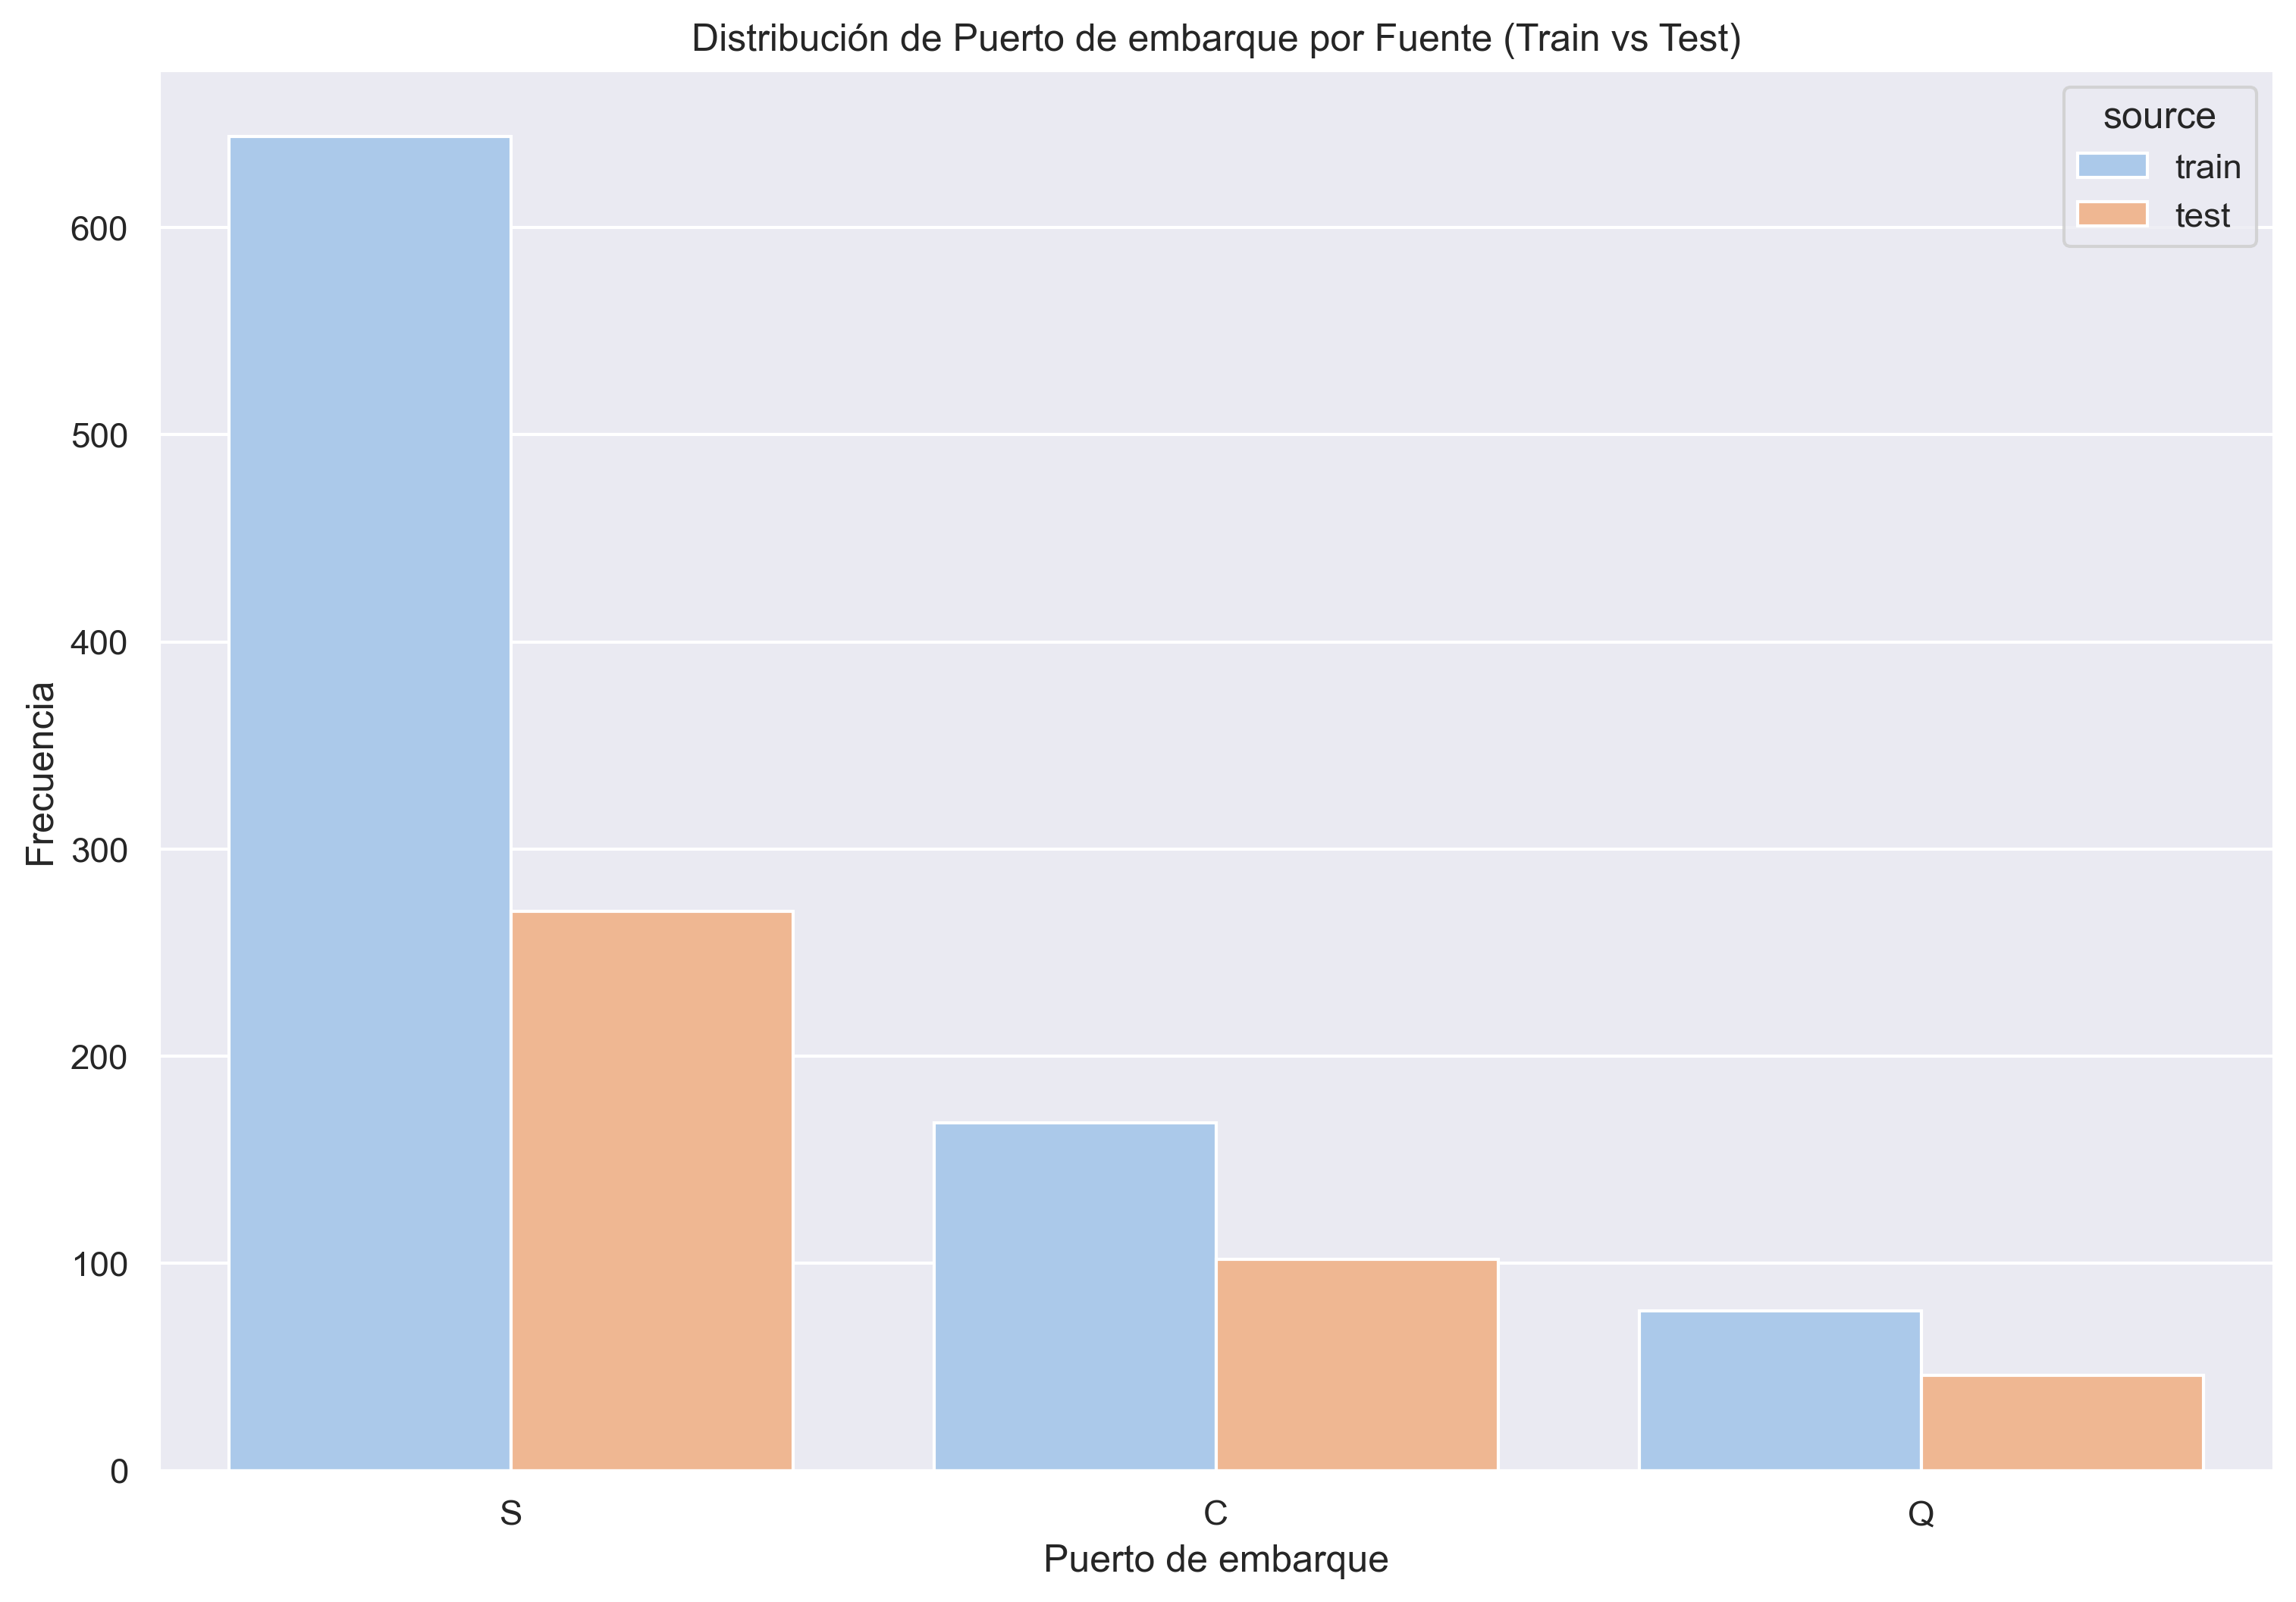

La distribución por puerto de embarque es consistente entre TRAIN y TEST, con Southampton como el puerto con mayor número de pasajeros.


In [8]:
train["source"] = "train"
test["source"] = "test"
if "Survived" not in test.columns:
    test["Survived"] = None

ambos = pd.concat([train, test], ignore_index=True)

sns.set_theme(style="darkgrid")
plt.rcParams["figure.dpi"] = 300

if {"Sex","Survived"}.issubset(train.columns):
    data = train.groupby(["Sex","Survived"]).size().unstack(fill_value=0)
    labels = data.index.tolist()
    bars1 = data[0].tolist()
    bars2 = data[1].tolist()
    barWidth = 0.35
    r1 = np.arange(len(labels))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, bars1, color=(0.3,0.1,0.4,0.6), width=barWidth, label="No sobrevivió (0)")
    plt.bar(r2, bars2, color=(0.3,0.9,0.4,0.6), width=barWidth, label="Sobrevivió (1)")
    plt.xticks([r + barWidth/2 for r in range(len(labels))], labels)
    plt.xlabel("Sexo"); plt.ylabel("Cantidad")
    plt.title("Supervivencia según Sexo (Train)")
    plt.legend()
    plt.show()
    print("En TRAIN, la supervivencia difiere por sexo: las mujeres concentran más casos de supervivencia, "
          "mientras que los hombres presentan más fallecidos.")

if {"Pclass","Survived"}.issubset(train.columns):
    data = train.groupby(["Pclass","Survived"]).size().unstack(fill_value=0)
    labels = [str(x) for x in data.index]
    bars1 = data[0].tolist()
    bars2 = data[1].tolist()
    barWidth = 0.35
    r1 = np.arange(len(labels))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, bars1, color=(0.3,0.1,0.4,0.6), width=barWidth, label="No sobrevivió (0)")
    plt.bar(r2, bars2, color=(0.3,0.9,0.4,0.6), width=barWidth, label="Sobrevivió (1)")
    plt.xticks([r + barWidth/2 for r in range(len(labels))], labels)
    plt.xlabel("Clase (Pclass)"); plt.ylabel("Cantidad")
    plt.title("Supervivencia según Clase (Train)")
    plt.legend()
    plt.show()
    print("En TRAIN, la primera clase muestra más sobrevivientes que fallecidos, "
          "mientras que en las clases 2 y 3 predominan los no sobrevivientes.")

if {"Embarked","Survived"}.issubset(train.columns):
    data = train.groupby(["Embarked","Survived"]).size().unstack(fill_value=0)
    labels = data.index.tolist()
    bars1 = data[0].tolist()
    bars2 = data[1].tolist()
    barWidth = 0.35
    r1 = np.arange(len(labels))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, bars1, color=(0.3,0.1,0.4,0.6), width=barWidth, label="No sobrevivió (0)")
    plt.bar(r2, bars2, color=(0.3,0.9,0.4,0.6), width=barWidth, label="Sobrevivió (1)")
    plt.xticks([r + barWidth/2 for r in range(len(labels))], labels)
    plt.xlabel("Puerto de embarque"); plt.ylabel("Cantidad")
    plt.title("Supervivencia según Puerto de embarque (Train)")
    plt.legend()
    plt.show()
    print("En TRAIN, Southampton concentra la mayor cantidad de pasajeros y fallecidos; "
          "en Cherbourg se observa una proporción mayor de sobrevivientes en comparación con otros puertos.")

# ==== BARPLOTS - TEST_MODELO ====
if "PassengerId" in test_modelo.columns and "PassengerId" in test.columns:
    test_modelo["PassengerId"] = test_modelo["PassengerId"].astype(str)
    test["PassengerId"] = test["PassengerId"].astype(str)
    test_modelo = test_modelo.merge(test[["PassengerId","Pclass","Sex","Embarked"]],
                                    on="PassengerId", how="left")

if "Pclass" in test_modelo.columns:
    sns.countplot(data=test_modelo, x="Pclass", palette="pastel")
    plt.title("Distribución de Pasajeros por Clase (Test_Modelo)")
    plt.xlabel("Clase"); plt.ylabel("Frecuencia")
    plt.show()
    print("En TEST_MODELO, la distribución por clase mantiene la tendencia del conjunto de entrenamiento, "
          "con predominio de pasajeros en tercera clase.")

if "Sex" in test_modelo.columns:
    sns.countplot(data=test_modelo, x="Sex", palette="pastel")
    plt.title("Distribución de Pasajeros por Sexo (Test_Modelo)")
    plt.xlabel("Sexo"); plt.ylabel("Frecuencia")
    plt.show()
    print("En TEST_MODELO, la distribución por sexo es consistente con TRAIN; "
          "hay más hombres que mujeres.")

# ==== BARPLOTS - AMBOS (train ∪ test) ====
if {"Sex","source"}.issubset(ambos.columns):
    sns.countplot(data=ambos, x="Sex", hue="source", palette="pastel")
    plt.title("Distribución de Sexo por Fuente (Train vs Test)")
    plt.xlabel("Sexo"); plt.ylabel("Frecuencia")
    plt.show()
    print("La comparación por sexo entre TRAIN y TEST muestra perfiles similares en ambas fuentes.")

if {"Pclass","source"}.issubset(ambos.columns):
    sns.countplot(data=ambos, x="Pclass", hue="source", palette="pastel")
    plt.title("Distribución de Clase por Fuente (Train vs Test)")
    plt.xlabel("Clase"); plt.ylabel("Frecuencia")
    plt.show()
    print("La distribución por clase es comparable entre TRAIN y TEST; "
          "la tercera clase es la más frecuente en ambos conjuntos.")

if {"Embarked","source"}.issubset(ambos.columns):
    sns.countplot(data=ambos, x="Embarked", hue="source", palette="pastel")
    plt.title("Distribución de Puerto de embarque por Fuente (Train vs Test)")
    plt.xlabel("Puerto de embarque"); plt.ylabel("Frecuencia")
    plt.show()
    print("La distribución por puerto de embarque es consistente entre TRAIN y TEST, "
          "con Southampton como el puerto con mayor número de pasajeros.")

**Punto 13**

Tablas generadas:


C:\Users\User\AppData\Local\Temp\ipykernel_14556\2614871983.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.dropna(subset=["Survived"]).groupby(by)["Survived"].agg(
C:\Users\User\AppData\Local\Temp\ipykernel_14556\2614871983.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.dropna(subset=["Survived"]).groupby(by)["Survived"].agg(
C:\Users\User\AppData\Local\Temp\ipykernel_14556\2614871983.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the 

Tablas
0            sex
1         pclass
2     sex_pclass
3          title
4          child
5         agebin
6        farebin
7       embarked
8      familybin
9     sex_agebin
10  sex_embarked

Tabla: SEX


Sex    n  survived      rate
0  female  314       233  0.742038
1    male  577       109  0.188908

Tabla: PCLASS


Pclass    n  survived      rate
0       1  216       136  0.629630
1       2  184        87  0.472826
2       3  491       119  0.242363

Tabla: SEX_PCLASS


Sex  Pclass    n  survived      rate
0  female       1   94        91  0.968085
1  female       2   76        70  0.921053
2  female       3  144        72  0.500000
3    male       1  122        45  0.368852
4    male       2  108        17  0.157407
5    male       3  347        47  0.135447

Tabla: TITLE


Title    n  survived      rate
0     Mrs  125        99  0.792000
1    Miss  182       127  0.697802
2  Master   40        23  0.575000
3      Mr  517        81  0.156673

Tabla: CHILD


Child    n  survived      rate
0    1.0   83        49  0.590361
1    0.0  631       241  0.381933

Tabla: AGEBIN


AgeBin    n  survived      rate
0  (-0.001, 12.0]   69        40  0.579710
1    (12.0, 18.0]   70        30  0.428571
2    (30.0, 45.0]  202        86  0.425743
3    (45.0, 60.0]   81        33  0.407407
4    (18.0, 30.0]  270        96  0.355556
5    (60.0, 80.0]   22         5  0.227273

Tabla: FAREBIN


FareBin    n  survived      rate
0  (31.0, 512.329]  222       129  0.581081
1   (14.454, 31.0]  222       101  0.454955
2   (7.91, 14.454]  224        68  0.303571
3   (-0.001, 7.91]  223        44  0.197309

Tabla: EMBARKED


Embarked    n  survived      rate
0        C  168        93  0.553571
1        Q   77        30  0.389610
2        S  644       217  0.336957

Tabla: FAMILYBIN


FamilyBin    n  survived      rate
0     (2.0, 4.0]  131        80  0.610687
1     (1.0, 2.0]  161        89  0.552795
2  (-0.001, 1.0]  537       163  0.303538
3     (4.0, 7.0]   49        10  0.204082
4    (7.0, 11.0]   13         0  0.000000

Tabla: SEX_AGEBIN


Sex          AgeBin    n  survived      rate
0  female    (45.0, 60.0]   27        23  0.851852
1  female    (30.0, 45.0]   73        57  0.780822
2  female    (18.0, 30.0]   90        68  0.755556
3  female    (12.0, 18.0]   36        27  0.750000
4  female  (-0.001, 12.0]   32        19  0.593750
5    male  (-0.001, 12.0]   37        21  0.567568
6    male    (30.0, 45.0]  129        29  0.224806
7    male    (45.0, 60.0]   54        10  0.185185
8    male    (18.0, 30.0]  180        28  0.155556
9    male    (60.0, 80.0]   19         2  0.105263

Tabla: SEX_EMBARKED


Sex Embarked    n  survived      rate
0  female        C   73        64  0.876712
1  female        Q   36        27  0.750000
2  female        S  203       140  0.689655
3    male        C   95        29  0.305263
4    male        S  441        77  0.174603
5    male        Q   41         3  0.073171

Resumen automático (grupos con mayores tasas de supervivencia):


grouping      n  survived      rate     Sex  Pclass          AgeBin  \
0  sex_pclass   94.0      91.0  0.968085  female     1.0             NaN   
1  sex_agebin   27.0      23.0  0.851852  female     NaN    (45.0, 60.0]   
2       title  125.0      99.0  0.792000     NaN     NaN             NaN   
3         sex  314.0     233.0  0.742038  female     NaN             NaN   
4      pclass  216.0     136.0  0.629630     NaN     1.0             NaN   
5   familybin  131.0      80.0  0.610687     NaN     NaN             NaN   
6     farebin  222.0     129.0  0.581081     NaN     NaN             NaN   
7      agebin   69.0      40.0  0.579710     NaN     NaN  (-0.001, 12.0]   
8    embarked  168.0      93.0  0.553571     NaN     NaN             NaN   

  Title   FamilyBin          FareBin Embarked  
0   NaN         NaN              NaN      NaN  
1   NaN         NaN              NaN      NaN  
2   Mrs         NaN              NaN      NaN  
3   NaN         NaN              NaN      NaN  
4   NaN         NaN              NaN      NaN  
5   NaN  (2.0, 4.0]              NaN      NaN  
6   NaN         NaN  (31.0, 512.329]      NaN  
7   NaN         NaN              NaN      NaN  
8   NaN         NaN              NaN        C

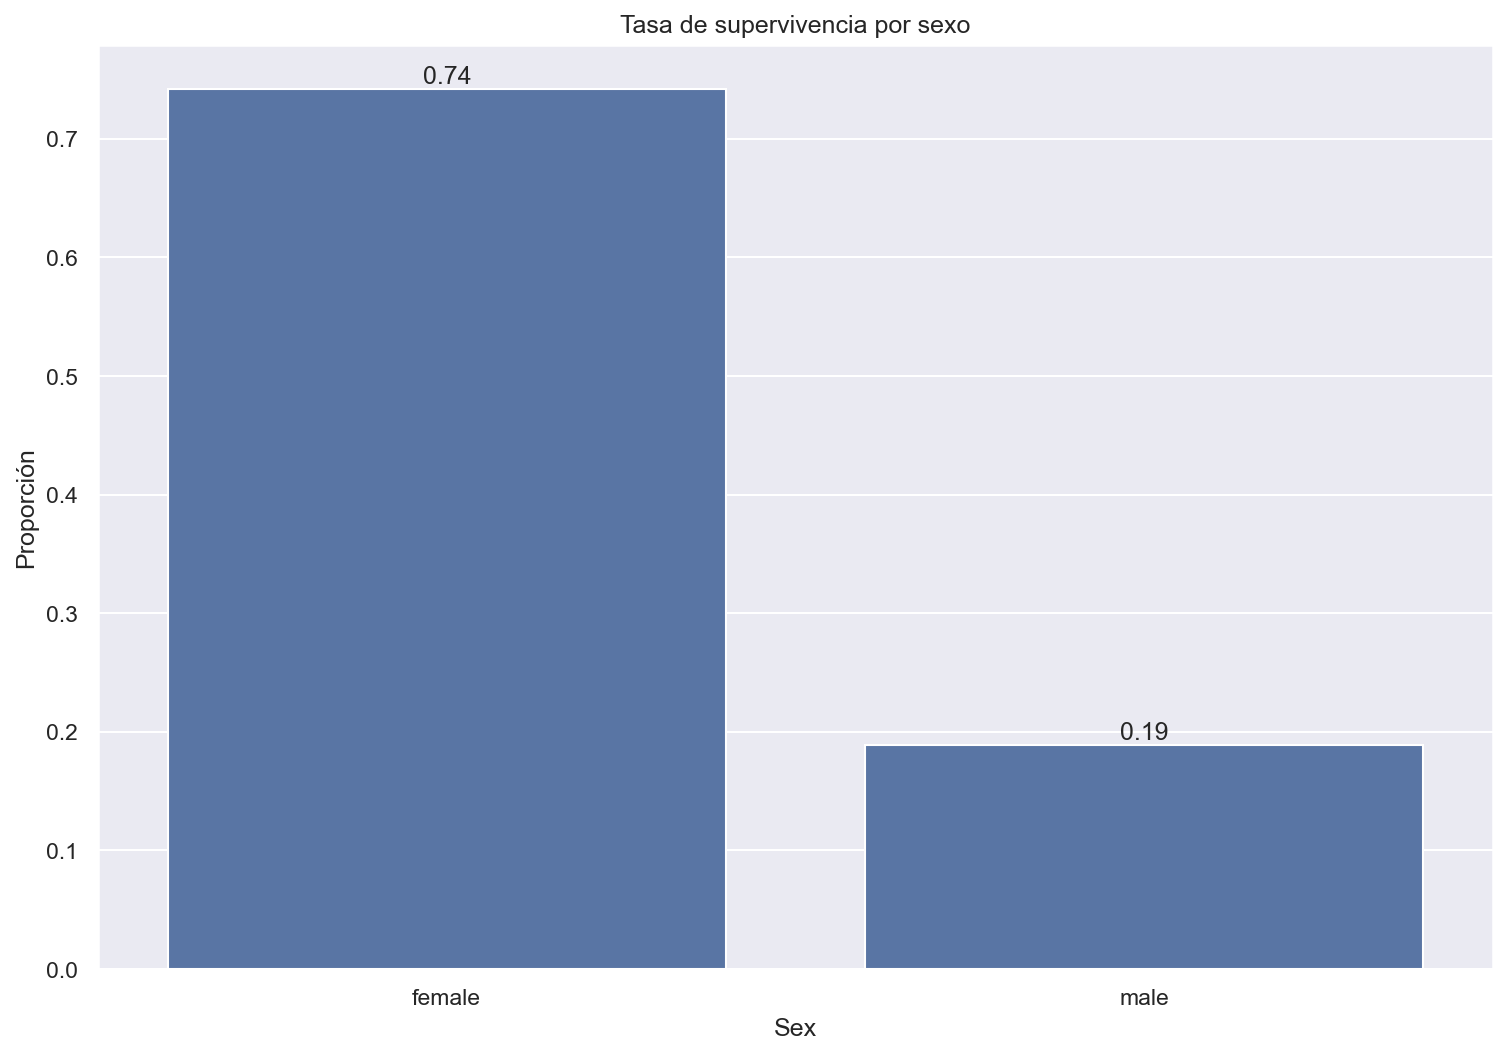

Las tasas por sexo muestran diferencias claras en la supervivencia.


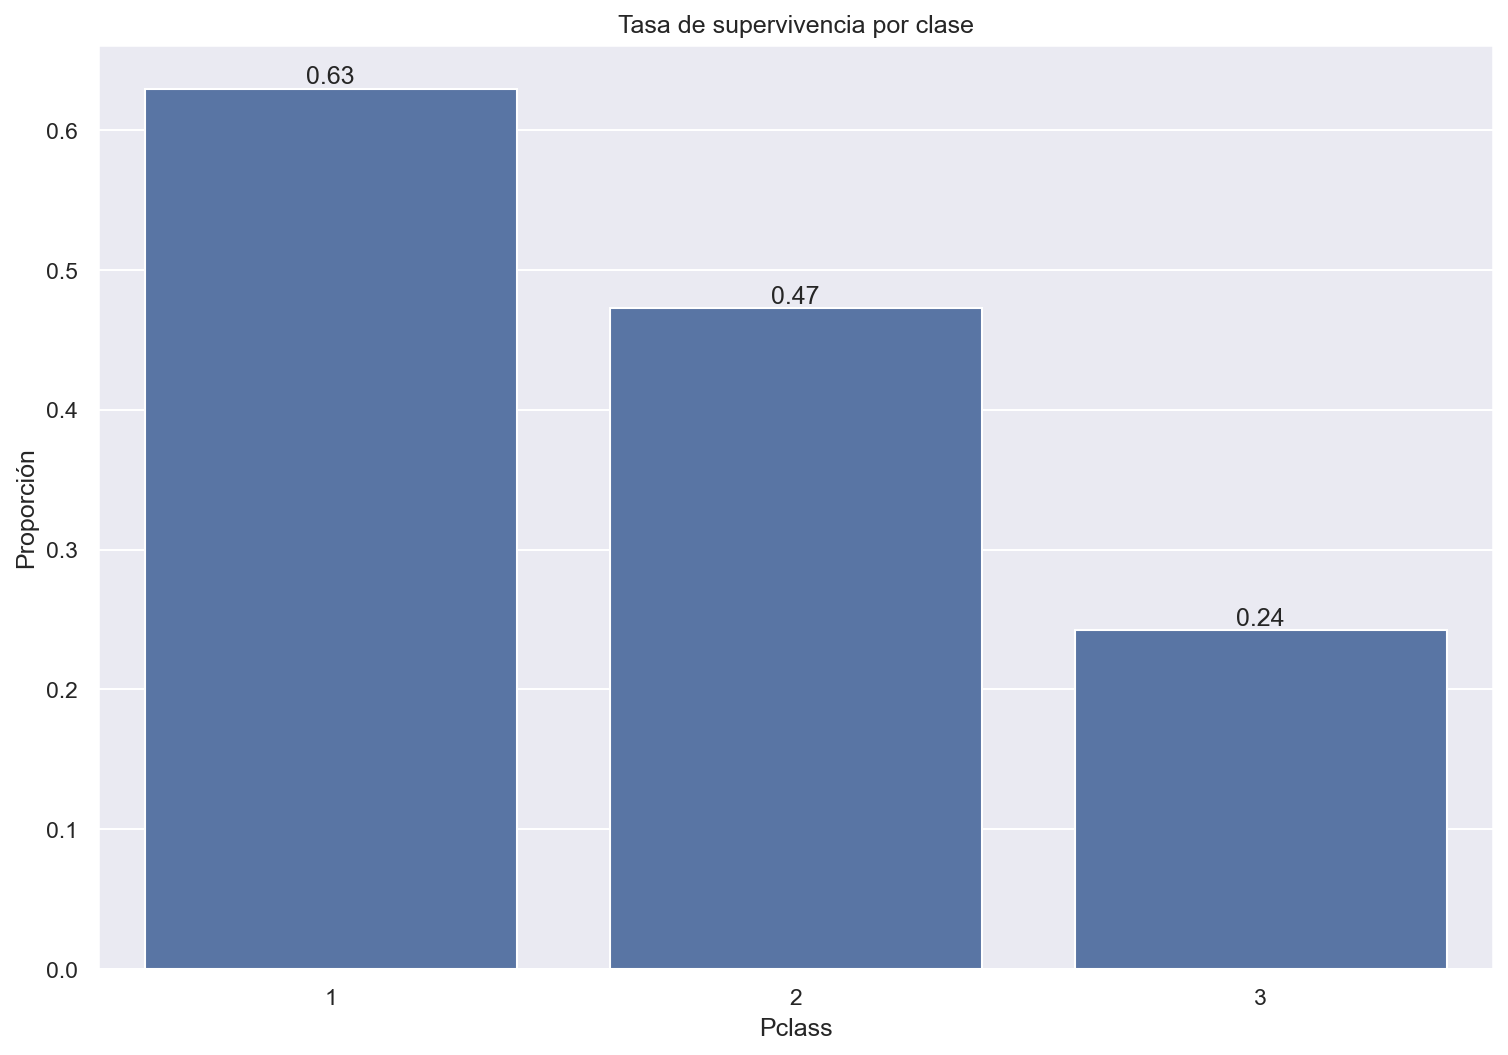

La supervivencia aumenta con la clase del pasajero: las clases altas presentan mayores tasas.


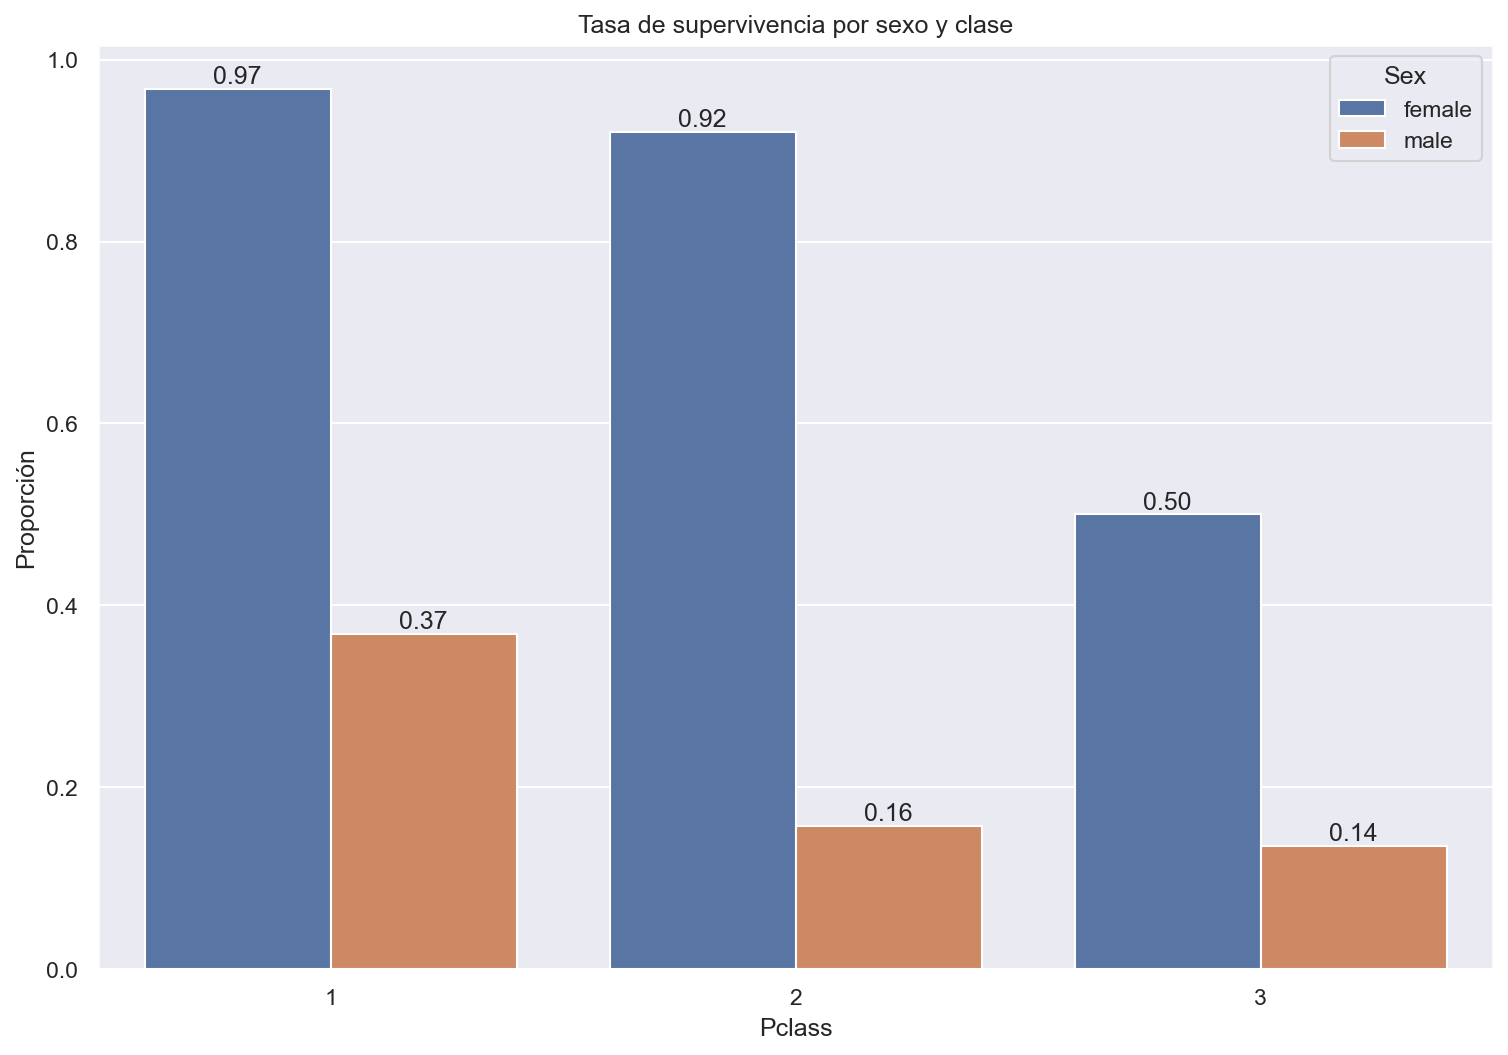

La combinación de sexo y clase refuerza el patrón: mujeres y pasajeros de mayor clase concentran las tasas más altas.
Conclusión automática:
Por sexo, 'female' presenta la mayor tasa de supervivencia: 74.20% (n=314).
Por sexo y clase, female en clase 1 alcanza 96.81% (n=94).
Por sexo y edad, female en el rango (45.0, 60.0] logra 85.19% (n=27).
Por título social, 'Mrs' muestra 79.20% (n=125).


In [12]:
for c in ["Age", "Fare", "SibSp", "Parch", "Pclass", "Survived"]:
    if c in train.columns:
        train[c] = pd.to_numeric(train[c], errors="coerce")

train["FamilySize"] = train["SibSp"].fillna(0) + train["Parch"].fillna(0) + 1
train["IsAlone"] = (train["FamilySize"] == 1).astype(int)
train["Child"] = (train["Age"] < 16).astype(float)
train.loc[train["Age"].isna(), "Child"] = np.nan

def extract_title(name):
    if pd.isna(name):
        return np.nan
    parts = name.split(',')
    if len(parts) < 2:
        return np.nan
    right = parts[1].strip()
    t = right.split('.')[0].strip()
    return t

train["Title"] = train["Name"].apply(extract_title) if "Name" in train.columns else np.nan
train["AgeBin"]  = pd.cut(train["Age"], bins=[0, 12, 18, 30, 45, 60, 80], right=True, include_lowest=True)
train["FareBin"] = pd.qcut(train["Fare"], q=4, duplicates='drop')

def survival_rate_table(df, by, min_n=10, sort_desc=True):
    g = df.dropna(subset=["Survived"]).groupby(by)["Survived"].agg(
        n="count", survived="sum", rate="mean"
    ).reset_index()
    g = g[g["n"] >= min_n].copy()
    g = g.sort_values("rate", ascending=not sort_desc).reset_index(drop=True)
    return g

tables = {}
if "Sex" in train.columns:
    tables["sex"] = survival_rate_table(train, "Sex")
if "Pclass" in train.columns:
    tables["pclass"] = survival_rate_table(train, "Pclass")
if {"Sex", "Pclass"}.issubset(train.columns):
    tables["sex_pclass"] = survival_rate_table(train, ["Sex", "Pclass"])
if "Title" in train.columns:
    tables["title"] = survival_rate_table(train, "Title")
if "Child" in train.columns:
    tables["child"] = survival_rate_table(train, "Child")
if "AgeBin" in train.columns:
    tables["agebin"] = survival_rate_table(train, "AgeBin")
if "FareBin" in train.columns:
    tables["farebin"] = survival_rate_table(train, "FareBin")
if "Embarked" in train.columns:
    tables["embarked"] = survival_rate_table(train, "Embarked")
if "FamilySize" in train.columns:
    train["FamilyBin"] = pd.cut(train["FamilySize"], bins=[0,1,2,4,7,11], include_lowest=True)
    tables["familybin"] = survival_rate_table(train, "FamilyBin")
if {"Sex", "AgeBin"}.issubset(train.columns):
    tables["sex_agebin"] = survival_rate_table(train, ["Sex", "AgeBin"])
if {"Sex", "Embarked"}.issubset(train.columns):
    tables["sex_embarked"] = survival_rate_table(train, ["Sex", "Embarked"])

summary_rows = []
def top_row(key):
    if key in tables and not tables[key].empty:
        row = tables[key].iloc[0].to_dict()
        row["grouping"] = key
        return row
    return None

for key in ["sex", "sex_pclass", "sex_agebin", "title", "pclass", "agebin", "familybin", "farebin", "embarked"]:
    r = top_row(key)
    if r:
        summary_rows.append(r)

summary_df = pd.DataFrame(summary_rows).sort_values("rate", ascending=False).reset_index(drop=True)

print("Tablas generadas:")
display(pd.DataFrame({"Tablas": list(tables.keys())}))

for name, tbl in tables.items():
    print(f"Tabla: {name.upper()}")
    display(tbl.head(10))

print("Resumen automático (grupos con mayores tasas de supervivencia):")
display(summary_df[["grouping","n","survived","rate"] + [c for c in summary_df.columns if c not in {"grouping","n","survived","rate"}]])

sns.set_theme(style="darkgrid")
plt.rcParams['figure.dpi'] = 150

if "sex" in tables and not tables["sex"].empty:
    ax = sns.barplot(data=tables["sex"], x="Sex", y="rate")
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.title("Tasa de supervivencia por sexo")
    plt.ylabel("Proporción")
    plt.show()
    print("Las tasas por sexo muestran diferencias claras en la supervivencia.")

if "pclass" in tables and not tables["pclass"].empty:
    ax = sns.barplot(data=tables["pclass"], x="Pclass", y="rate")
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.title("Tasa de supervivencia por clase")
    plt.ylabel("Proporción")
    plt.show()
    print("La supervivencia aumenta con la clase del pasajero: las clases altas presentan mayores tasas.")

if "sex_pclass" in tables and not tables["sex_pclass"].empty:
    ax = sns.barplot(data=tables["sex_pclass"], x="Pclass", y="rate", hue="Sex")
    for c in ax.containers:
        ax.bar_label(c, fmt="%.2f")
    plt.title("Tasa de supervivencia por sexo y clase")
    plt.ylabel("Proporción")
    plt.show()
    print("La combinación de sexo y clase refuerza el patrón: mujeres y pasajeros de mayor clase concentran las tasas más altas.")

conclusiones = []
if "sex" in tables and not tables["sex"].empty:
    top_sex = tables["sex"].iloc[0]
    conclusiones.append(f"Por sexo, '{top_sex['Sex']}' presenta la mayor tasa de supervivencia: {top_sex['rate']:.2%} (n={int(top_sex['n'])}).")
if "sex_pclass" in tables and not tables["sex_pclass"].empty:
    top_sp = tables["sex_pclass"].iloc[0]
    conclusiones.append(f"Por sexo y clase, {top_sp['Sex']} en clase {int(top_sp['Pclass'])} alcanza {top_sp['rate']:.2%} (n={int(top_sp['n'])}).")
if "sex_agebin" in tables and not tables["sex_agebin"].empty:
    top_sa = tables["sex_agebin"].iloc[0]
    conclusiones.append(f"Por sexo y edad, {top_sa['Sex']} en el rango {top_sa['AgeBin']} logra {top_sa['rate']:.2%} (n={int(top_sa['n'])}).")
if "title" in tables and not tables["title"].empty:
    top_t = tables["title"].iloc[0]
    conclusiones.append(f"Por título social, '{top_t['Title']}' muestra {top_t['rate']:.2%} (n={int(top_t['n'])}).")

print("Conclusión automática:")
for line in conclusiones:
    print(line)